In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "1"   #(xxxx is your specific GPU ID)

In [2]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.layers import Activation, Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from PIL import Image
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from MyEarlyStopping import MyEarlyStopping
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# from keras.optimizers import adam
import timeit

from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
from sklearn.preprocessing import LabelEncoder  

# load dataset 

## Test dataset (20%)

In [3]:
test_data = ImageDataGenerator(preprocessing_function=preprocess_input)
test_generator = test_data.flow_from_directory('/data/home/cou/yuli5/semg/Audio_MEL_Data/test',
                                                batch_size=1,
                                                target_size=(224,224),
                                                class_mode='categorical',
                                                shuffle=False)

Found 543 images belonging to 10 classes.


In [4]:
image_names = test_generator.filenames
participant_class = [i.split("/", 1)[1].split("_")[1] for i in image_names]
test_unit_participant_class = np.array(list(map(int, participant_class)))
test_unit_command_class = test_generator.classes
Test_participant_class = tf.keras.utils.to_categorical(test_unit_participant_class-1, num_classes=6)
Test_participant_uniform = Test_participant_class*0+1/6
Test_command_class = tf.keras.utils.to_categorical(test_unit_command_class, num_classes=10)
Test_command_uniform = Test_command_class*0+1/10

In [5]:
Test_Inputs = [next(test_generator)[0][0] for _ in range(len(test_generator))]
Test_Inputs = np.array(Test_Inputs)

In [6]:
Test_Inputs_1 = Test_Inputs[np.where(test_unit_participant_class == 1)]
Test_command_class_1 = Test_command_class[np.where(test_unit_participant_class == 1)]
Test_Inputs_2 = Test_Inputs[np.where(test_unit_participant_class == 2)]
Test_command_class_2 = Test_command_class[np.where(test_unit_participant_class == 2)]
Test_Inputs_3 = Test_Inputs[np.where(test_unit_participant_class == 3)]
Test_command_class_3 = Test_command_class[np.where(test_unit_participant_class == 3)]
Test_Inputs_4 = Test_Inputs[np.where(test_unit_participant_class == 4)]
Test_command_class_4 = Test_command_class[np.where(test_unit_participant_class == 4)]
Test_Inputs_5 = Test_Inputs[np.where(test_unit_participant_class == 5)]
Test_command_class_5 = Test_command_class[np.where(test_unit_participant_class == 5)]

## Speaker 6 Test dataset 

In [7]:
test_data_6 = ImageDataGenerator(preprocessing_function=preprocess_input)
test_generator_6 = test_data_6.flow_from_directory('/data/home/cou/yuli5/semg/Audio_MEL_subject/p_6_split/test',
                                                batch_size=1,
                                                target_size=(224,224),
                                                class_mode='categorical',
                                                shuffle=False)

Found 100 images belonging to 10 classes.


In [8]:
image_names = test_generator_6.filenames
command_class = [i.split("/", 1)[0]for i in image_names]
le = LabelEncoder()
test_unit_command_class_6 = le.fit_transform(command_class)
Test_command_class_6 = tf.keras.utils.to_categorical(test_unit_command_class_6, num_classes=10)

In [9]:
Test_Inputs_6 = [next(test_generator_6)[0][0] for _ in range(len(test_generator_6))]
Test_Inputs_6 = np.array(Test_Inputs_6)

## Speaker 7 Test dataset 

In [10]:
test_data_7 = ImageDataGenerator(preprocessing_function=preprocess_input)
test_generator_7 = test_data_6.flow_from_directory('/data/home/cou/yuli5/semg/Audio_MEL_subject/p_7_split/test',
                                                batch_size=1,
                                                target_size=(224,224),
                                                class_mode='categorical',
                                                shuffle=False)

Found 125 images belonging to 10 classes.


In [11]:
image_names = test_generator_7.filenames
command_class = [i.split("/", 1)[0]for i in image_names]
le = LabelEncoder()
test_unit_command_class_7 = le.fit_transform(command_class)
Test_command_class_7 = tf.keras.utils.to_categorical(test_unit_command_class_7, num_classes=10)

In [12]:
Test_Inputs_7 = [next(test_generator_7)[0][0] for _ in range(len(test_generator_7))]
Test_Inputs_7 = np.array(Test_Inputs_7)

## Speaker 8 Test dataset 

In [13]:
test_data_8 = ImageDataGenerator(preprocessing_function=preprocess_input)
test_generator_8 = test_data_6.flow_from_directory('/data/home/cou/yuli5/semg/Audio_MEL_subject/p_8_split/test',
                                                batch_size=1,
                                                target_size=(224,224),
                                                class_mode='categorical',
                                                shuffle=False)

Found 101 images belonging to 10 classes.


In [14]:
image_names = test_generator_8.filenames
command_class = [i.split("/", 1)[0]for i in image_names]
le = LabelEncoder()
test_unit_command_class_8 = le.fit_transform(command_class)
Test_command_class_8 = tf.keras.utils.to_categorical(test_unit_command_class_8, num_classes=10)

In [15]:
Test_Inputs_8 = [next(test_generator_8)[0][0] for _ in range(len(test_generator_8))]
Test_Inputs_8 = np.array(Test_Inputs_8)

# pd file store performance

In [16]:
# pd file store performance
Perfomance = pd.DataFrame(columns = ['Model','Time','Size','Partcp_Acc_p15','Command_Acc_p15','Partcp_Acc_p1','Command_Acc_p1','Partcp_Acc_p2',
                                      'Command_Acc_p2','Partcp_Acc_p3','Command_Acc_p3','Partcp_Acc_p4','Command_Acc_p4',
                                      'Partcp_Acc_p5','Command_Acc_p5','Partcp_Acc_p6','Command_Acc_p6',
                                     'Partcp_Acc_p7','Command_Acc_p7','Partcp_Acc_p8','Command_Acc_p8'])

# performance_speaker = pd.read_csv("performance_refine_model_0609.csv")
# Perfomance
Perfomance        

,Model,Time,Size,Partcp_Acc_p15,Command_Acc_p15,Partcp_Acc_p1,Command_Acc_p1,Partcp_Acc_p2,Command_Acc_p2,Partcp_Acc_p3,...,Partcp_Acc_p4,Command_Acc_p4,Partcp_Acc_p5,Command_Acc_p5,Partcp_Acc_p6,Command_Acc_p6,Partcp_Acc_p7,Command_Acc_p7,Partcp_Acc_p8,Command_Acc_p8


# model parameter

In [17]:
actv_fun_1_1 = "relu" 
actv_fun_1_2 = "sigmoid"
shape_1_1 = 128
shape_1_2 = 256
actv_fun_2_1 = "sigmoid" 
actv_fun_2_2 = "sigmoid"
shape_2_1 = 512
shape_2_2 = 512


# original model 

In [18]:
resnet_model_0 = tf.keras.models.load_model('Initial_group_model_mix_20&s2_30_0608.h5')

##################### test performance ############################
predictions = resnet_model_0.predict(Test_Inputs)[0]
predicted_classes = np.argmax(predictions, axis=1)+1
true_classes = test_unit_participant_class
acc_p15_s = metrics.accuracy_score(true_classes, predicted_classes).round(4)

predictions = resnet_model_0.predict(Test_Inputs)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_unit_command_class
acc_p15_c = metrics.accuracy_score(true_classes, predicted_classes).round(4)


# test on p1
## speaker classification
predictions = resnet_model_0.predict(Test_Inputs_1)[0]
predicted_classes = np.argmax(predictions, axis=1)+1
true_classes = np.array([1]*len(predicted_classes))
acc_p1_s = metrics.accuracy_score(true_classes, predicted_classes).round(4)   
## command classification
predictions = resnet_model_0.predict(Test_Inputs_1)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(Test_command_class_1, axis=-1)
acc_p1_c = metrics.accuracy_score(true_classes, predicted_classes).round(4)   

# test on p2
## speaker classification
predictions = resnet_model_0.predict(Test_Inputs_2)[0]
predicted_classes = np.argmax(predictions, axis=1)+1
true_classes = np.array([2]*len(predicted_classes))
acc_p2_s = metrics.accuracy_score(true_classes, predicted_classes).round(4)   
## command classification
predictions = resnet_model_0.predict(Test_Inputs_2)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(Test_command_class_2, axis=-1)
acc_p2_c = metrics.accuracy_score(true_classes, predicted_classes).round(4)   

# test on p3
## speaker classification
predictions = resnet_model_0.predict(Test_Inputs_3)[0]
predicted_classes = np.argmax(predictions, axis=1)+1
true_classes = np.array([3]*len(predicted_classes))
acc_p3_s = metrics.accuracy_score(true_classes, predicted_classes).round(4)   
## command classification
predictions = resnet_model_0.predict(Test_Inputs_3)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(Test_command_class_3, axis=-1)
acc_p3_c = metrics.accuracy_score(true_classes, predicted_classes).round(4)   

# test on p4
## speaker classification
predictions = resnet_model_0.predict(Test_Inputs_4)[0]
predicted_classes = np.argmax(predictions, axis=1)+1
true_classes = np.array([4]*len(predicted_classes))
acc_p4_s = metrics.accuracy_score(true_classes, predicted_classes).round(4)   
## command classification
predictions = resnet_model_0.predict(Test_Inputs_4)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(Test_command_class_4, axis=-1)
acc_p4_c = metrics.accuracy_score(true_classes, predicted_classes).round(4)   

# test on p5
## speaker classification
predictions = resnet_model_0.predict(Test_Inputs_5)[0]
predicted_classes = np.argmax(predictions, axis=1)+1
true_classes = np.array([5]*len(predicted_classes))
acc_p5_s = metrics.accuracy_score(true_classes, predicted_classes).round(4)   
# command classification
predictions = resnet_model_0.predict(Test_Inputs_5)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(Test_command_class_5, axis=-1)
acc_p5_c = metrics.accuracy_score(true_classes, predicted_classes).round(4)   

# test on p6 
## command classification
predictions = resnet_model_0.predict(Test_Inputs_6)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_unit_command_class_6
acc_p6 = metrics.accuracy_score(true_classes, predicted_classes).round(4)                

# test on p7 
## command classification
predictions = resnet_model_0.predict(Test_Inputs_7)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_unit_command_class_7
acc_p7 = metrics.accuracy_score(true_classes, predicted_classes).round(4)    

# test on p8 
## command classification
predictions = resnet_model_0.predict(Test_Inputs_8)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_unit_command_class_8
acc_p8 = metrics.accuracy_score(true_classes, predicted_classes).round(4)    

Perfomance = Perfomance.append({'Model': "original",'Size':'mix_20&s2_30',
                                'Partcp_Acc_p15':acc_p15_s,'Command_Acc_p15':acc_p15_c,'Partcp_Acc_p1':acc_p1_s,
                                'Command_Acc_p1':acc_p1_c,'Partcp_Acc_p2':acc_p2_s,'Command_Acc_p2':acc_p2_c,
                                'Partcp_Acc_p3':acc_p3_s,'Command_Acc_p3':acc_p3_c,'Partcp_Acc_p4':acc_p4_s,
                                'Command_Acc_p4':acc_p4_c, 'Partcp_Acc_p5':acc_p5_s,'Command_Acc_p5':acc_p5_c,'Command_Acc_p6':acc_p6,
                                'Command_Acc_p7':acc_p7,'Command_Acc_p8':acc_p8}, ignore_index=True)


In [19]:
Perfomance

,Model,Time,Size,Partcp_Acc_p15,Command_Acc_p15,Partcp_Acc_p1,Command_Acc_p1,Partcp_Acc_p2,Command_Acc_p2,Partcp_Acc_p3,...,Partcp_Acc_p4,Command_Acc_p4,Partcp_Acc_p5,Command_Acc_p5,Partcp_Acc_p6,Command_Acc_p6,Partcp_Acc_p7,Command_Acc_p7,Partcp_Acc_p8,Command_Acc_p8
0,original,NaN,mix_20&s2_30,0.9945,0.9816,1.0,0.973,1.0,0.963,0.9913,...,0.9817,0.9908,1.0,1.0,NaN,0.7,NaN,0.464,NaN,0.2673


# Refine group model by 5 images adding P6

## Training dataset (40%)

In [20]:
train_data = ImageDataGenerator(preprocessing_function=preprocess_input)
train_generator = train_data.flow_from_directory('/data/home/cou/yuli5/semg/Audio_MEL_Data/train',
                                                batch_size=1,
                                                target_size=(224,224),
                                                class_mode='categorical',
                                               shuffle=False)

Found 1714 images belonging to 10 classes.


In [21]:
image_names = train_generator.filenames
image_no = [i.split("/")[1].split("_")[2].split(".")[0] for i in image_names]
image_no = np.array(list(map(int, image_no)))
ALL_participant_class = [i.split("/")[1].split("_")[1] for i in image_names]
ALL_participant_class = np.array(list(map(int, ALL_participant_class)))
command_class = train_generator.classes
All_participant_class = tf.keras.utils.to_categorical(ALL_participant_class-1, num_classes=6)
All_command_class = tf.keras.utils.to_categorical(command_class, num_classes=10)
All_command_uniform = All_command_class*0+1/10

In [22]:
All_Inputs = [next(train_generator)[0][0] for _ in range(len(train_generator))]
All_Inputs = np.array(All_Inputs)

In [23]:
select_indexs_train = ((image_no<20)&(ALL_participant_class!=2))|((image_no<30)&(ALL_participant_class==2))
Train_Inputs = All_Inputs[select_indexs_train]
Train_participant_class = All_participant_class[select_indexs_train]
Train_participant_uniform = Train_participant_class*0+1/6
Train_command_class = All_command_class[select_indexs_train]
Train_command_uniform = Train_command_class*0+1/10
#sum(Train_command_class)

In [24]:
sum(Train_command_class)

array([110., 110., 110., 110., 110., 110., 110., 110., 110., 110.],
      dtype=float32)

In [25]:
sum(Train_participant_class)

array([200., 300., 200., 200., 200.,   0.], dtype=float32)

# p6 Training dataset 

In [26]:
train_data_6 = ImageDataGenerator(preprocessing_function=preprocess_input)
train_generator_6 = train_data_6.flow_from_directory('/data/home/cou/yuli5/semg/Audio_MEL_subject/p_6_split/train',
                                                batch_size=1,
                                                target_size=(224,224),
                                                class_mode='categorical',
                                                shuffle=False)

Found 300 images belonging to 10 classes.


In [27]:
image_names = train_generator_6.filenames
participant_class = [6]*len(image_names)
participant_class = np.array(list(map(int, participant_class)))
command_class = train_generator_6.classes
ALL_Train_participant_class_6 = tf.keras.utils.to_categorical(participant_class-1, num_classes=6)
ALL_Train_participant_uniform_6 = ALL_Train_participant_class_6*0+1/6
ALL_Train_command_class_6 = tf.keras.utils.to_categorical(command_class, num_classes=10)
ALL_Train_command_uniform_6 = ALL_Train_command_class_6*0+1/10

In [28]:
ALL_Train_Inputs_6 = [next(train_generator_6)[0][0] for _ in range(len(train_generator_6))]
ALL_Train_Inputs_6 = np.array(ALL_Train_Inputs_6)

In [29]:
sum(ALL_Train_command_class_6)

array([30., 30., 30., 30., 30., 30., 30., 30., 30., 30.], dtype=float32)

In [30]:
sum(ALL_Train_participant_class_6)

array([  0.,   0.,   0.,   0.,   0., 300.], dtype=float32)

# p6 Training dataset select 5 image

In [31]:
train_number_6 = 5 
select_images=[]
for keyword in list(set([i.split("/")[0] for i in image_names])):
    selc_num = [i.split("/")[1] for i in image_names if i.split("/")[0] ==keyword]
    select_count = 0
    while select_count < train_number_6:
        select_images.append( keyword+"/"+selc_num[select_count])
        select_count = select_count + 1
        


In [32]:
select_index = image_names.copy()
for i in range(len(select_index)):
    if image_names[i] in select_images:
        select_index[i] = True
    else:
        select_index[i] = False

In [33]:
Train_Inputs_6 = ALL_Train_Inputs_6[select_index]
Train_participant_class_6 = ALL_Train_participant_class_6[select_index]
Train_participant_uniform_6 = Train_participant_class_6*0+1/6
Train_command_class_6 = ALL_Train_command_class_6[select_index]
Train_command_uniform_6 = Train_command_class_6*0+1/10
#sum(Train_command_class)

In [34]:
sum(Train_command_class_6)

array([5., 5., 5., 5., 5., 5., 5., 5., 5., 5.], dtype=float32)

In [35]:
sum(Train_participant_class_6)

array([ 0.,  0.,  0.,  0.,  0., 50.], dtype=float32)

## combine

In [36]:
# Train_participant_class_15 = np.hstack((Train_participant_class,np.zeros((len(Train_participant_class),1))))
Train_participant_class_combine = np.vstack((Train_participant_class,Train_participant_class_6))
Train_participant_uniform_combine = Train_participant_class_combine*0+1/6

In [37]:
Train_command_class_combine = np.vstack((Train_command_class,Train_command_class_6))
Train_command_uniform_combine = Train_command_class_combine*0+1/10

In [38]:
Train_Inputs_combine = np.vstack((Train_Inputs,Train_Inputs_6))

In [39]:
sum(Train_participant_class)

array([200., 300., 200., 200., 200.,   0.], dtype=float32)

In [40]:
sum(Train_participant_class_combine)

array([200., 300., 200., 200., 200.,  50.], dtype=float32)

## model 

In [41]:
resnet_model_0 = tf.keras.models.load_model('Initial_group_model_mix_20&s2_30_0608.h5')

# feature extraction layers
resnet_model = Model(resnet_model_0.input, resnet_model_0.layers[174].output)
d = resnet_model.output.shape[-1] # dimension of last layer

    ###################### model 1 ###################### 
layer_1_0 = tf.keras.layers.Dense(d,name="weight_1")(resnet_model.output) #times weight before flatten
layer_1_1 = tf.keras.layers.Flatten(name='flatten_1')(layer_1_0)

Dense_1_1 = tf.keras.layers.Dense(shape_1_1, activation = actv_fun_1_1,name='fc1_1')
layer_1_2 = Dense_1_1(layer_1_1)
Dense_1_2 = tf.keras.layers.Dense(shape_1_2, activation = actv_fun_1_2,name='fc1_2')
layer_1_3 = Dense_1_2(layer_1_2)

Dense_1_3 = tf.keras.layers.Dense(6, activation='softmax' ,name='participant_output')
out_layer_1 = Dense_1_3(layer_1_3)

###################### model 2 ###################### 
w1 = tf.constant_initializer(resnet_model_0.get_layer(name = "weight_2").get_weights()[0])
w2 = tf.constant_initializer(resnet_model_0.get_layer(name = "weight_2").get_weights()[1])
layer_2_0 = tf.keras.layers.Dense(d,name="weight_2",kernel_initializer = w1 ,bias_initializer = w2)(resnet_model.output) #times weight before flatten

layer_2_1 = tf.keras.layers.Flatten(name='flatten_2')(layer_2_0)

w1 = tf.constant_initializer(resnet_model_0.get_layer(name = "fc2_1").get_weights()[0])
w2 = tf.constant_initializer(resnet_model_0.get_layer(name = "fc2_1").get_weights()[1])
Dense_2_1 = tf.keras.layers.Dense(shape_2_1, activation=actv_fun_2_1,kernel_initializer = w1 ,bias_initializer = w2,name='fc2_1')
layer_2_2  = Dense_2_1(layer_2_1)

w1 = tf.constant_initializer(resnet_model_0.get_layer(name = "fc2_2").get_weights()[0])
w2 = tf.constant_initializer(resnet_model_0.get_layer(name = "fc2_2").get_weights()[1])
Dense_2_2 = tf.keras.layers.Dense(shape_2_2, activation=actv_fun_2_2,kernel_initializer = w1 ,bias_initializer = w2, name='fc2_2')
layer_2_3  = Dense_2_2(layer_2_2)

w1 = tf.constant_initializer(resnet_model_0.get_layer(name = "command_output").get_weights()[0])
w2 = tf.constant_initializer(resnet_model_0.get_layer(name = "command_output").get_weights()[1])
Dense_2_3 = tf.keras.layers.Dense(10, activation='softmax',kernel_initializer = w1 ,bias_initializer = w2,name='command_output')
out_layer_2 = Dense_2_3(layer_2_3)

###################### model 1' ###################### 
layer_1_2_  = Dense_2_1(layer_1_1)
layer_1_3_  = Dense_2_2(layer_1_2_)
out_layer_1_ = Dense_2_3(layer_1_3_)

###################### model 1' ###################### 
layer_2_2_  = Dense_1_1(layer_2_1)
layer_2_3_  = Dense_1_2(layer_2_2_)
out_layer_2_ = Dense_1_3(layer_2_3_)

resnet_model = tf.keras.Model(resnet_model.input, [out_layer_1,out_layer_2,out_layer_1_,out_layer_2_])



In [42]:

w_1, w_2, w_1_, w_2_ = 1,1,1,1
##################### training ############################
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
callbacks = [MyEarlyStopping(monitor1 = resnet_model.layers[-1].name+'_accuracy',
                              monitor2 = resnet_model.layers[-2].name+'_accuracy',
                              patience=10,restore_best_weights=True)]
resnet_model.compile(optimizer=opt, loss=["categorical_crossentropy","categorical_crossentropy","mse","mse"],
                     loss_weights=[w_1, w_2, w_1_, w_2_], metrics=['accuracy'])

start = timeit.default_timer()

for layer in resnet_model.layers[0:175]:
    layer.trainable = False

history1 = resnet_model.fit(Train_Inputs_combine, 
                       {resnet_model.layers[-2].name:Train_participant_class_combine, 
                        resnet_model.layers[-1].name:Train_command_class_combine,
                        resnet_model.layers[-1].name+"_1":Train_command_uniform_combine, 
                        resnet_model.layers[-2].name+"_1":Train_participant_uniform_combine}, 
                       callbacks=callbacks,
                       batch_size=64,
                       epochs=10)

for layer in resnet_model.layers[0:175]:
    layer.trainable = True

history2 = resnet_model.fit(Train_Inputs_combine, 
                           {resnet_model.layers[-2].name:Train_participant_class_combine, 
                            resnet_model.layers[-1].name:Train_command_class_combine,
                            resnet_model.layers[-1].name+"_1":Train_command_uniform_combine, 
                            resnet_model.layers[-2].name+"_1":Train_participant_uniform_combine}, 
                           callbacks=callbacks,
                           batch_size=64,
                           epochs=10)

stop = timeit.default_timer()
run_time = stop - start


##################### test performance ############################
predictions = resnet_model.predict(Test_Inputs)[0]
predicted_classes = np.argmax(predictions, axis=1)+1
true_classes = test_unit_participant_class
acc_p15_s = metrics.accuracy_score(true_classes, predicted_classes).round(4)

predictions = resnet_model.predict(Test_Inputs)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_unit_command_class
acc_p15_c = metrics.accuracy_score(true_classes, predicted_classes).round(4)


# test on p1
## speaker classification
predictions = resnet_model.predict(Test_Inputs_1)[0]
predicted_classes = np.argmax(predictions, axis=1)+1
true_classes = np.array([1]*len(predicted_classes))
acc_p1_s = metrics.accuracy_score(true_classes, predicted_classes).round(4)   
## command classification
predictions = resnet_model.predict(Test_Inputs_1)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(Test_command_class_1, axis=-1)
acc_p1_c = metrics.accuracy_score(true_classes, predicted_classes).round(4)   

# test on p2
## speaker classification
predictions = resnet_model.predict(Test_Inputs_2)[0]
predicted_classes = np.argmax(predictions, axis=1)+1
true_classes = np.array([2]*len(predicted_classes))
acc_p2_s = metrics.accuracy_score(true_classes, predicted_classes).round(4)   
## command classification
predictions = resnet_model.predict(Test_Inputs_2)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(Test_command_class_2, axis=-1)
acc_p2_c = metrics.accuracy_score(true_classes, predicted_classes).round(4)   

# test on p3
## speaker classification
predictions = resnet_model.predict(Test_Inputs_3)[0]
predicted_classes = np.argmax(predictions, axis=1)+1
true_classes = np.array([3]*len(predicted_classes))
acc_p3_s = metrics.accuracy_score(true_classes, predicted_classes).round(4)   
## command classification
predictions = resnet_model.predict(Test_Inputs_3)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(Test_command_class_3, axis=-1)
acc_p3_c = metrics.accuracy_score(true_classes, predicted_classes).round(4)   

# test on p4
## speaker classification
predictions = resnet_model.predict(Test_Inputs_4)[0]
predicted_classes = np.argmax(predictions, axis=1)+1
true_classes = np.array([4]*len(predicted_classes))
acc_p4_s = metrics.accuracy_score(true_classes, predicted_classes).round(4)   
## command classification
predictions = resnet_model.predict(Test_Inputs_4)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(Test_command_class_4, axis=-1)
acc_p4_c = metrics.accuracy_score(true_classes, predicted_classes).round(4)   

# # test on p5
## speaker classification
predictions = resnet_model.predict(Test_Inputs_5)[0]
predicted_classes = np.argmax(predictions, axis=1)+1
true_classes = np.array([5]*len(predicted_classes))
acc_p5_s = metrics.accuracy_score(true_classes, predicted_classes).round(4)   
## command classification
predictions = resnet_model.predict(Test_Inputs_5)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(Test_command_class_5, axis=-1)
acc_p5_c = metrics.accuracy_score(true_classes, predicted_classes).round(4)   

# test on p6 
## speaker classification
predictions = resnet_model.predict(Test_Inputs_6)[0]
predicted_classes = np.argmax(predictions, axis=1)+1
true_classes = np.array([6]*len(predicted_classes))
acc_p6_s = metrics.accuracy_score(true_classes, predicted_classes).round(4)   
## command classification
predictions = resnet_model.predict(Test_Inputs_6)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_unit_command_class_6
acc_p6 = metrics.accuracy_score(true_classes, predicted_classes).round(4)                

# test on p7 
## command classification
predictions = resnet_model.predict(Test_Inputs_7)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_unit_command_class_7
acc_p7 = metrics.accuracy_score(true_classes, predicted_classes).round(4)    

# test on p8 
## command classification
predictions = resnet_model.predict(Test_Inputs_8)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_unit_command_class_8
acc_p8 = metrics.accuracy_score(true_classes, predicted_classes).round(4)    

Perfomance = Perfomance.append({'Model': "add_p6",'Size':train_number_6,'Time':run_time,
                                'Partcp_Acc_p15':acc_p15_s,'Command_Acc_p15':acc_p15_c,'Partcp_Acc_p1':acc_p1_s,
                                'Command_Acc_p1':acc_p1_c,'Partcp_Acc_p2':acc_p2_s,'Command_Acc_p2':acc_p2_c,
                                'Partcp_Acc_p3':acc_p3_s,'Command_Acc_p3':acc_p3_c,'Partcp_Acc_p4':acc_p4_s,
                                'Command_Acc_p4':acc_p4_c,'Partcp_Acc_p5':acc_p5_s,'Command_Acc_p5':acc_p5_c,
                                'Partcp_Acc_p6':acc_p6_s,'Command_Acc_p6':acc_p6, 
                                'Command_Acc_p7':acc_p7,'Command_Acc_p8':acc_p8}, ignore_index=True)


Epoch 1/10
18/18 [==============================] - 5s 295ms/step - loss: 1.8820 - participant_output_loss: 1.1105 - command_output_loss: 0.7579 - command_output_1_loss: 0.0029 - participant_output_1_loss: 0.0108 - participant_output_accuracy: 0.6522 - command_output_accuracy: 0.8043 - command_output_1_accuracy: 0.0357 - participant_output_1_accuracy: 0.2713
Epoch 2/10
18/18 [==============================] - 4s 240ms/step - loss: 0.3569 - participant_output_loss: 0.2442 - command_output_loss: 0.1097 - command_output_1_loss: 0.0016 - participant_output_1_loss: 0.0014 - participant_output_accuracy: 0.9809 - command_output_accuracy: 0.9939 - command_output_1_accuracy: 0.1183 - participant_output_1_accuracy: 0.1443
Epoch 3/10
18/18 [==============================] - 4s 245ms/step - loss: 0.1376 - participant_output_loss: 0.0783 - command_output_loss: 0.0575 - command_output_1_loss: 9.5923e-04 - participant_output_1_loss: 8.5909e-04 - participant_output_accuracy: 0.9991 - command_output_ac

In [43]:
Perfomance

,Model,Time,Size,Partcp_Acc_p15,Command_Acc_p15,Partcp_Acc_p1,Command_Acc_p1,Partcp_Acc_p2,Command_Acc_p2,Partcp_Acc_p3,...,Partcp_Acc_p4,Command_Acc_p4,Partcp_Acc_p5,Command_Acc_p5,Partcp_Acc_p6,Command_Acc_p6,Partcp_Acc_p7,Command_Acc_p7,Partcp_Acc_p8,Command_Acc_p8
0,original,NaN,mix_20&s2_30,0.9945,0.9816,1.000,0.973,1.0,0.9630,0.9913,...,0.9817,0.9908,1.0,1.0,NaN,0.70,NaN,0.464,NaN,0.2673
1,add_p6,97.149233,5,0.9963,0.9890,0.991,0.973,1.0,0.9815,1.0000,...,0.9908,1.0000,1.0,1.0,1.0,0.97,NaN,0.632,NaN,0.3366


# p6 Training dataset select 10 image

In [44]:
train_number_6 = 10 
select_images=[]
for keyword in list(set([i.split("/")[0] for i in image_names])):
    selc_num = [i.split("/")[1] for i in image_names if i.split("/")[0] ==keyword]
    select_count = 0
    while select_count < train_number_6:
        select_images.append( keyword+"/"+selc_num[select_count])
        select_count = select_count + 1
        


In [45]:
select_index = image_names.copy()
for i in range(len(select_index)):
    if image_names[i] in select_images:
        select_index[i] = True
    else:
        select_index[i] = False

In [46]:
Train_Inputs_6 = ALL_Train_Inputs_6[select_index]
Train_participant_class_6 = ALL_Train_participant_class_6[select_index]
Train_participant_uniform_6 = Train_participant_class_6*0+1/6
Train_command_class_6 = ALL_Train_command_class_6[select_index]
Train_command_uniform_6 = Train_command_class_6*0+1/10
#sum(Train_command_class)

In [47]:
sum(Train_command_class_6)

array([10., 10., 10., 10., 10., 10., 10., 10., 10., 10.], dtype=float32)

In [48]:
sum(Train_participant_class_6)

array([  0.,   0.,   0.,   0.,   0., 100.], dtype=float32)

## combine

In [49]:
# Train_participant_class_15 = np.hstack((Train_participant_class,np.zeros((len(Train_participant_class),1))))
Train_participant_class_combine = np.vstack((Train_participant_class,Train_participant_class_6))
Train_participant_uniform_combine = Train_participant_class_combine*0+1/6

In [50]:
Train_command_class_combine = np.vstack((Train_command_class,Train_command_class_6))
Train_command_uniform_combine = Train_command_class_combine*0+1/10

In [51]:
Train_Inputs_combine = np.vstack((Train_Inputs,Train_Inputs_6))

In [52]:
sum(Train_participant_class)

array([200., 300., 200., 200., 200.,   0.], dtype=float32)

In [53]:
sum(Train_participant_class_combine)

array([200., 300., 200., 200., 200., 100.], dtype=float32)

## model 

In [54]:
resnet_model_0 = tf.keras.models.load_model('Initial_group_model_mix_20&s2_30_0608.h5')

# feature extraction layers
resnet_model = Model(resnet_model_0.input, resnet_model_0.layers[174].output)
d = resnet_model.output.shape[-1] # dimension of last layer

    ###################### model 1 ###################### 
layer_1_0 = tf.keras.layers.Dense(d,name="weight_1")(resnet_model.output) #times weight before flatten
layer_1_1 = tf.keras.layers.Flatten(name='flatten_1')(layer_1_0)

Dense_1_1 = tf.keras.layers.Dense(shape_1_1, activation = actv_fun_1_1,name='fc1_1')
layer_1_2 = Dense_1_1(layer_1_1)
Dense_1_2 = tf.keras.layers.Dense(shape_1_2, activation = actv_fun_1_2,name='fc1_2')
layer_1_3 = Dense_1_2(layer_1_2)

Dense_1_3 = tf.keras.layers.Dense(6, activation='softmax' ,name='participant_output')
out_layer_1 = Dense_1_3(layer_1_3)

###################### model 2 ###################### 
w1 = tf.constant_initializer(resnet_model_0.get_layer(name = "weight_2").get_weights()[0])
w2 = tf.constant_initializer(resnet_model_0.get_layer(name = "weight_2").get_weights()[1])
layer_2_0 = tf.keras.layers.Dense(d,name="weight_2",kernel_initializer = w1 ,bias_initializer = w2)(resnet_model.output) #times weight before flatten

layer_2_1 = tf.keras.layers.Flatten(name='flatten_2')(layer_2_0)

w1 = tf.constant_initializer(resnet_model_0.get_layer(name = "fc2_1").get_weights()[0])
w2 = tf.constant_initializer(resnet_model_0.get_layer(name = "fc2_1").get_weights()[1])
Dense_2_1 = tf.keras.layers.Dense(shape_2_1, activation=actv_fun_2_1,kernel_initializer = w1 ,bias_initializer = w2,name='fc2_1')
layer_2_2  = Dense_2_1(layer_2_1)

w1 = tf.constant_initializer(resnet_model_0.get_layer(name = "fc2_2").get_weights()[0])
w2 = tf.constant_initializer(resnet_model_0.get_layer(name = "fc2_2").get_weights()[1])
Dense_2_2 = tf.keras.layers.Dense(shape_2_2, activation=actv_fun_2_2,kernel_initializer = w1 ,bias_initializer = w2, name='fc2_2')
layer_2_3  = Dense_2_2(layer_2_2)

w1 = tf.constant_initializer(resnet_model_0.get_layer(name = "command_output").get_weights()[0])
w2 = tf.constant_initializer(resnet_model_0.get_layer(name = "command_output").get_weights()[1])
Dense_2_3 = tf.keras.layers.Dense(10, activation='softmax',kernel_initializer = w1 ,bias_initializer = w2,name='command_output')
out_layer_2 = Dense_2_3(layer_2_3)

###################### model 1' ###################### 
layer_1_2_  = Dense_2_1(layer_1_1)
layer_1_3_  = Dense_2_2(layer_1_2_)
out_layer_1_ = Dense_2_3(layer_1_3_)

###################### model 1' ###################### 
layer_2_2_  = Dense_1_1(layer_2_1)
layer_2_3_  = Dense_1_2(layer_2_2_)
out_layer_2_ = Dense_1_3(layer_2_3_)

resnet_model = tf.keras.Model(resnet_model.input, [out_layer_1,out_layer_2,out_layer_1_,out_layer_2_])



In [55]:

w_1, w_2, w_1_, w_2_ = 1,1,1,1
##################### training ############################
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
callbacks = [MyEarlyStopping(monitor1 = resnet_model.layers[-1].name+'_accuracy',
                              monitor2 = resnet_model.layers[-2].name+'_accuracy',
                              patience=10,restore_best_weights=True)]
resnet_model.compile(optimizer=opt, loss=["categorical_crossentropy","categorical_crossentropy","mse","mse"],
                     loss_weights=[w_1, w_2, w_1_, w_2_], metrics=['accuracy'])

start = timeit.default_timer()

for layer in resnet_model.layers[0:175]:
    layer.trainable = False

history1 = resnet_model.fit(Train_Inputs_combine, 
                       {resnet_model.layers[-2].name:Train_participant_class_combine, 
                        resnet_model.layers[-1].name:Train_command_class_combine,
                        resnet_model.layers[-1].name+"_1":Train_command_uniform_combine, 
                        resnet_model.layers[-2].name+"_1":Train_participant_uniform_combine}, 
                       callbacks=callbacks,
                       batch_size=64,
                       epochs=10)

for layer in resnet_model.layers[0:175]:
    layer.trainable = True

history2 = resnet_model.fit(Train_Inputs_combine, 
                           {resnet_model.layers[-2].name:Train_participant_class_combine, 
                            resnet_model.layers[-1].name:Train_command_class_combine,
                            resnet_model.layers[-1].name+"_1":Train_command_uniform_combine, 
                            resnet_model.layers[-2].name+"_1":Train_participant_uniform_combine}, 
                           callbacks=callbacks,
                           batch_size=64,
                           epochs=10)

stop = timeit.default_timer()
run_time = stop - start


##################### test performance ############################
predictions = resnet_model.predict(Test_Inputs)[0]
predicted_classes = np.argmax(predictions, axis=1)+1
true_classes = test_unit_participant_class
acc_p15_s = metrics.accuracy_score(true_classes, predicted_classes).round(4)

predictions = resnet_model.predict(Test_Inputs)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_unit_command_class
acc_p15_c = metrics.accuracy_score(true_classes, predicted_classes).round(4)


# test on p1
## speaker classification
predictions = resnet_model.predict(Test_Inputs_1)[0]
predicted_classes = np.argmax(predictions, axis=1)+1
true_classes = np.array([1]*len(predicted_classes))
acc_p1_s = metrics.accuracy_score(true_classes, predicted_classes).round(4)   
## command classification
predictions = resnet_model.predict(Test_Inputs_1)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(Test_command_class_1, axis=-1)
acc_p1_c = metrics.accuracy_score(true_classes, predicted_classes).round(4)   

# test on p2
## speaker classification
predictions = resnet_model.predict(Test_Inputs_2)[0]
predicted_classes = np.argmax(predictions, axis=1)+1
true_classes = np.array([2]*len(predicted_classes))
acc_p2_s = metrics.accuracy_score(true_classes, predicted_classes).round(4)   
## command classification
predictions = resnet_model.predict(Test_Inputs_2)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(Test_command_class_2, axis=-1)
acc_p2_c = metrics.accuracy_score(true_classes, predicted_classes).round(4)   

# test on p3
## speaker classification
predictions = resnet_model.predict(Test_Inputs_3)[0]
predicted_classes = np.argmax(predictions, axis=1)+1
true_classes = np.array([3]*len(predicted_classes))
acc_p3_s = metrics.accuracy_score(true_classes, predicted_classes).round(4)   
## command classification
predictions = resnet_model.predict(Test_Inputs_3)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(Test_command_class_3, axis=-1)
acc_p3_c = metrics.accuracy_score(true_classes, predicted_classes).round(4)   

# test on p4
## speaker classification
predictions = resnet_model.predict(Test_Inputs_4)[0]
predicted_classes = np.argmax(predictions, axis=1)+1
true_classes = np.array([4]*len(predicted_classes))
acc_p4_s = metrics.accuracy_score(true_classes, predicted_classes).round(4)   
## command classification
predictions = resnet_model.predict(Test_Inputs_4)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(Test_command_class_4, axis=-1)
acc_p4_c = metrics.accuracy_score(true_classes, predicted_classes).round(4)   

# # test on p5
## speaker classification
predictions = resnet_model.predict(Test_Inputs_5)[0]
predicted_classes = np.argmax(predictions, axis=1)+1
true_classes = np.array([5]*len(predicted_classes))
acc_p5_s = metrics.accuracy_score(true_classes, predicted_classes).round(4)   
## command classification
predictions = resnet_model.predict(Test_Inputs_5)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(Test_command_class_5, axis=-1)
acc_p5_c = metrics.accuracy_score(true_classes, predicted_classes).round(4)   

# test on p6 
## speaker classification
predictions = resnet_model.predict(Test_Inputs_6)[0]
predicted_classes = np.argmax(predictions, axis=1)+1
true_classes = np.array([6]*len(predicted_classes))
acc_p6_s = metrics.accuracy_score(true_classes, predicted_classes).round(4)   
## command classification
predictions = resnet_model.predict(Test_Inputs_6)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_unit_command_class_6
acc_p6 = metrics.accuracy_score(true_classes, predicted_classes).round(4)                

# test on p7 
## command classification
predictions = resnet_model.predict(Test_Inputs_7)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_unit_command_class_7
acc_p7 = metrics.accuracy_score(true_classes, predicted_classes).round(4)    

# test on p8 
## command classification
predictions = resnet_model.predict(Test_Inputs_8)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_unit_command_class_8
acc_p8 = metrics.accuracy_score(true_classes, predicted_classes).round(4)    

Perfomance = Perfomance.append({'Model': "add_p6",'Size':train_number_6,'Time':run_time,
                                'Partcp_Acc_p15':acc_p15_s,'Command_Acc_p15':acc_p15_c,'Partcp_Acc_p1':acc_p1_s,
                                'Command_Acc_p1':acc_p1_c,'Partcp_Acc_p2':acc_p2_s,'Command_Acc_p2':acc_p2_c,
                                'Partcp_Acc_p3':acc_p3_s,'Command_Acc_p3':acc_p3_c,'Partcp_Acc_p4':acc_p4_s,
                                'Command_Acc_p4':acc_p4_c,'Partcp_Acc_p5':acc_p5_s,'Command_Acc_p5':acc_p5_c,
                                'Partcp_Acc_p6':acc_p6_s,'Command_Acc_p6':acc_p6, 
                                'Command_Acc_p7':acc_p7,'Command_Acc_p8':acc_p8}, ignore_index=True)


Epoch 1/10
19/19 [==============================] - 5s 284ms/step - loss: 1.6187 - participant_output_loss: 0.8173 - command_output_loss: 0.7959 - command_output_1_loss: 0.0025 - participant_output_1_loss: 0.0030 - participant_output_accuracy: 0.7425 - command_output_accuracy: 0.7908 - command_output_1_accuracy: 0.0758 - participant_output_1_accuracy: 0.1233
Epoch 2/10
19/19 [==============================] - 4s 237ms/step - loss: 0.2572 - participant_output_loss: 0.1341 - command_output_loss: 0.1204 - command_output_1_loss: 0.0016 - participant_output_1_loss: 0.0011 - participant_output_accuracy: 0.9900 - command_output_accuracy: 0.9875 - command_output_1_accuracy: 0.1150 - participant_output_1_accuracy: 0.1817
Epoch 3/10
19/19 [==============================] - 5s 241ms/step - loss: 0.1190 - participant_output_loss: 0.0468 - command_output_loss: 0.0704 - command_output_1_loss: 0.0010 - participant_output_1_loss: 7.3153e-04 - participant_output_accuracy: 0.9992 - command_output_accura

In [56]:
Perfomance

,Model,Time,Size,Partcp_Acc_p15,Command_Acc_p15,Partcp_Acc_p1,Command_Acc_p1,Partcp_Acc_p2,Command_Acc_p2,Partcp_Acc_p3,...,Partcp_Acc_p4,Command_Acc_p4,Partcp_Acc_p5,Command_Acc_p5,Partcp_Acc_p6,Command_Acc_p6,Partcp_Acc_p7,Command_Acc_p7,Partcp_Acc_p8,Command_Acc_p8
0,original,NaN,mix_20&s2_30,0.9945,0.9816,1.000,0.973,1.0,0.9630,0.9913,...,0.9817,0.9908,1.0,1.0,NaN,0.70,NaN,0.464,NaN,0.2673
1,add_p6,97.149233,5,0.9963,0.9890,0.991,0.973,1.0,0.9815,1.0000,...,0.9908,1.0000,1.0,1.0,1.0,0.97,NaN,0.632,NaN,0.3366
2,add_p6,102.181328,10,0.9963,0.9834,1.000,0.955,1.0,0.9722,1.0000,...,0.9817,1.0000,1.0,1.0,1.0,0.98,NaN,0.648,NaN,0.3168


# p6 Training dataset select 15 image

In [57]:
train_number_6 = 15 
select_images=[]
for keyword in list(set([i.split("/")[0] for i in image_names])):
    selc_num = [i.split("/")[1] for i in image_names if i.split("/")[0] ==keyword]
    select_count = 0
    while select_count < train_number_6:
        select_images.append( keyword+"/"+selc_num[select_count])
        select_count = select_count + 1
        


In [58]:
select_index = image_names.copy()
for i in range(len(select_index)):
    if image_names[i] in select_images:
        select_index[i] = True
    else:
        select_index[i] = False

In [59]:
Train_Inputs_6 = ALL_Train_Inputs_6[select_index]
Train_participant_class_6 = ALL_Train_participant_class_6[select_index]
Train_participant_uniform_6 = Train_participant_class_6*0+1/6
Train_command_class_6 = ALL_Train_command_class_6[select_index]
Train_command_uniform_6 = Train_command_class_6*0+1/10
#sum(Train_command_class)

In [60]:
sum(Train_command_class_6)

array([15., 15., 15., 15., 15., 15., 15., 15., 15., 15.], dtype=float32)

In [61]:
sum(Train_participant_class_6)

array([  0.,   0.,   0.,   0.,   0., 150.], dtype=float32)

## combine

In [62]:
# Train_participant_class_15 = np.hstack((Train_participant_class,np.zeros((len(Train_participant_class),1))))
Train_participant_class_combine = np.vstack((Train_participant_class,Train_participant_class_6))
Train_participant_uniform_combine = Train_participant_class_combine*0+1/6

In [63]:
Train_command_class_combine = np.vstack((Train_command_class,Train_command_class_6))
Train_command_uniform_combine = Train_command_class_combine*0+1/10

In [64]:
Train_Inputs_combine = np.vstack((Train_Inputs,Train_Inputs_6))

In [65]:
sum(Train_participant_class)

array([200., 300., 200., 200., 200.,   0.], dtype=float32)

In [66]:
sum(Train_participant_class_combine)

array([200., 300., 200., 200., 200., 150.], dtype=float32)

## model 

In [67]:
resnet_model_0 = tf.keras.models.load_model('Initial_group_model_mix_20&s2_30_0608.h5')

# feature extraction layers
resnet_model = Model(resnet_model_0.input, resnet_model_0.layers[174].output)
d = resnet_model.output.shape[-1] # dimension of last layer

    ###################### model 1 ###################### 
layer_1_0 = tf.keras.layers.Dense(d,name="weight_1")(resnet_model.output) #times weight before flatten
layer_1_1 = tf.keras.layers.Flatten(name='flatten_1')(layer_1_0)

Dense_1_1 = tf.keras.layers.Dense(shape_1_1, activation = actv_fun_1_1,name='fc1_1')
layer_1_2 = Dense_1_1(layer_1_1)
Dense_1_2 = tf.keras.layers.Dense(shape_1_2, activation = actv_fun_1_2,name='fc1_2')
layer_1_3 = Dense_1_2(layer_1_2)

Dense_1_3 = tf.keras.layers.Dense(6, activation='softmax' ,name='participant_output')
out_layer_1 = Dense_1_3(layer_1_3)

###################### model 2 ###################### 
w1 = tf.constant_initializer(resnet_model_0.get_layer(name = "weight_2").get_weights()[0])
w2 = tf.constant_initializer(resnet_model_0.get_layer(name = "weight_2").get_weights()[1])
layer_2_0 = tf.keras.layers.Dense(d,name="weight_2",kernel_initializer = w1 ,bias_initializer = w2)(resnet_model.output) #times weight before flatten

layer_2_1 = tf.keras.layers.Flatten(name='flatten_2')(layer_2_0)

w1 = tf.constant_initializer(resnet_model_0.get_layer(name = "fc2_1").get_weights()[0])
w2 = tf.constant_initializer(resnet_model_0.get_layer(name = "fc2_1").get_weights()[1])
Dense_2_1 = tf.keras.layers.Dense(shape_2_1, activation=actv_fun_2_1,kernel_initializer = w1 ,bias_initializer = w2,name='fc2_1')
layer_2_2  = Dense_2_1(layer_2_1)

w1 = tf.constant_initializer(resnet_model_0.get_layer(name = "fc2_2").get_weights()[0])
w2 = tf.constant_initializer(resnet_model_0.get_layer(name = "fc2_2").get_weights()[1])
Dense_2_2 = tf.keras.layers.Dense(shape_2_2, activation=actv_fun_2_2,kernel_initializer = w1 ,bias_initializer = w2, name='fc2_2')
layer_2_3  = Dense_2_2(layer_2_2)

w1 = tf.constant_initializer(resnet_model_0.get_layer(name = "command_output").get_weights()[0])
w2 = tf.constant_initializer(resnet_model_0.get_layer(name = "command_output").get_weights()[1])
Dense_2_3 = tf.keras.layers.Dense(10, activation='softmax',kernel_initializer = w1 ,bias_initializer = w2,name='command_output')
out_layer_2 = Dense_2_3(layer_2_3)

###################### model 1' ###################### 
layer_1_2_  = Dense_2_1(layer_1_1)
layer_1_3_  = Dense_2_2(layer_1_2_)
out_layer_1_ = Dense_2_3(layer_1_3_)

###################### model 1' ###################### 
layer_2_2_  = Dense_1_1(layer_2_1)
layer_2_3_  = Dense_1_2(layer_2_2_)
out_layer_2_ = Dense_1_3(layer_2_3_)

resnet_model = tf.keras.Model(resnet_model.input, [out_layer_1,out_layer_2,out_layer_1_,out_layer_2_])



In [68]:

w_1, w_2, w_1_, w_2_ = 1,1,1,1
##################### training ############################
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
callbacks = [MyEarlyStopping(monitor1 = resnet_model.layers[-1].name+'_accuracy',
                              monitor2 = resnet_model.layers[-2].name+'_accuracy',
                              patience=10,restore_best_weights=True)]
resnet_model.compile(optimizer=opt, loss=["categorical_crossentropy","categorical_crossentropy","mse","mse"],
                     loss_weights=[w_1, w_2, w_1_, w_2_], metrics=['accuracy'])

start = timeit.default_timer()

for layer in resnet_model.layers[0:175]:
    layer.trainable = False

history1 = resnet_model.fit(Train_Inputs_combine, 
                       {resnet_model.layers[-2].name:Train_participant_class_combine, 
                        resnet_model.layers[-1].name:Train_command_class_combine,
                        resnet_model.layers[-1].name+"_1":Train_command_uniform_combine, 
                        resnet_model.layers[-2].name+"_1":Train_participant_uniform_combine}, 
                       callbacks=callbacks,
                       batch_size=64,
                       epochs=10)

for layer in resnet_model.layers[0:175]:
    layer.trainable = True

history2 = resnet_model.fit(Train_Inputs_combine, 
                           {resnet_model.layers[-2].name:Train_participant_class_combine, 
                            resnet_model.layers[-1].name:Train_command_class_combine,
                            resnet_model.layers[-1].name+"_1":Train_command_uniform_combine, 
                            resnet_model.layers[-2].name+"_1":Train_participant_uniform_combine}, 
                           callbacks=callbacks,
                           batch_size=64,
                           epochs=10)

stop = timeit.default_timer()
run_time = stop - start


##################### test performance ############################
predictions = resnet_model.predict(Test_Inputs)[0]
predicted_classes = np.argmax(predictions, axis=1)+1
true_classes = test_unit_participant_class
acc_p15_s = metrics.accuracy_score(true_classes, predicted_classes).round(4)

predictions = resnet_model.predict(Test_Inputs)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_unit_command_class
acc_p15_c = metrics.accuracy_score(true_classes, predicted_classes).round(4)


# test on p1
## speaker classification
predictions = resnet_model.predict(Test_Inputs_1)[0]
predicted_classes = np.argmax(predictions, axis=1)+1
true_classes = np.array([1]*len(predicted_classes))
acc_p1_s = metrics.accuracy_score(true_classes, predicted_classes).round(4)   
## command classification
predictions = resnet_model.predict(Test_Inputs_1)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(Test_command_class_1, axis=-1)
acc_p1_c = metrics.accuracy_score(true_classes, predicted_classes).round(4)   

# test on p2
## speaker classification
predictions = resnet_model.predict(Test_Inputs_2)[0]
predicted_classes = np.argmax(predictions, axis=1)+1
true_classes = np.array([2]*len(predicted_classes))
acc_p2_s = metrics.accuracy_score(true_classes, predicted_classes).round(4)   
## command classification
predictions = resnet_model.predict(Test_Inputs_2)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(Test_command_class_2, axis=-1)
acc_p2_c = metrics.accuracy_score(true_classes, predicted_classes).round(4)   

# test on p3
## speaker classification
predictions = resnet_model.predict(Test_Inputs_3)[0]
predicted_classes = np.argmax(predictions, axis=1)+1
true_classes = np.array([3]*len(predicted_classes))
acc_p3_s = metrics.accuracy_score(true_classes, predicted_classes).round(4)   
## command classification
predictions = resnet_model.predict(Test_Inputs_3)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(Test_command_class_3, axis=-1)
acc_p3_c = metrics.accuracy_score(true_classes, predicted_classes).round(4)   

# test on p4
## speaker classification
predictions = resnet_model.predict(Test_Inputs_4)[0]
predicted_classes = np.argmax(predictions, axis=1)+1
true_classes = np.array([4]*len(predicted_classes))
acc_p4_s = metrics.accuracy_score(true_classes, predicted_classes).round(4)   
## command classification
predictions = resnet_model.predict(Test_Inputs_4)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(Test_command_class_4, axis=-1)
acc_p4_c = metrics.accuracy_score(true_classes, predicted_classes).round(4)   

# # test on p5
## speaker classification
predictions = resnet_model.predict(Test_Inputs_5)[0]
predicted_classes = np.argmax(predictions, axis=1)+1
true_classes = np.array([5]*len(predicted_classes))
acc_p5_s = metrics.accuracy_score(true_classes, predicted_classes).round(4)   
## command classification
predictions = resnet_model.predict(Test_Inputs_5)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(Test_command_class_5, axis=-1)
acc_p5_c = metrics.accuracy_score(true_classes, predicted_classes).round(4)   

# test on p6 
## speaker classification
predictions = resnet_model.predict(Test_Inputs_6)[0]
predicted_classes = np.argmax(predictions, axis=1)+1
true_classes = np.array([6]*len(predicted_classes))
acc_p6_s = metrics.accuracy_score(true_classes, predicted_classes).round(4)   
## command classification
predictions = resnet_model.predict(Test_Inputs_6)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_unit_command_class_6
acc_p6 = metrics.accuracy_score(true_classes, predicted_classes).round(4)                

# test on p7 
## command classification
predictions = resnet_model.predict(Test_Inputs_7)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_unit_command_class_7
acc_p7 = metrics.accuracy_score(true_classes, predicted_classes).round(4)    

# test on p8 
## command classification
predictions = resnet_model.predict(Test_Inputs_8)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_unit_command_class_8
acc_p8 = metrics.accuracy_score(true_classes, predicted_classes).round(4)    

Perfomance = Perfomance.append({'Model': "add_p6",'Size':train_number_6,'Time':run_time,
                                'Partcp_Acc_p15':acc_p15_s,'Command_Acc_p15':acc_p15_c,'Partcp_Acc_p1':acc_p1_s,
                                'Command_Acc_p1':acc_p1_c,'Partcp_Acc_p2':acc_p2_s,'Command_Acc_p2':acc_p2_c,
                                'Partcp_Acc_p3':acc_p3_s,'Command_Acc_p3':acc_p3_c,'Partcp_Acc_p4':acc_p4_s,
                                'Command_Acc_p4':acc_p4_c,'Partcp_Acc_p5':acc_p5_s,'Command_Acc_p5':acc_p5_c,
                                'Partcp_Acc_p6':acc_p6_s,'Command_Acc_p6':acc_p6, 
                                'Command_Acc_p7':acc_p7,'Command_Acc_p8':acc_p8}, ignore_index=True)


Epoch 1/10
20/20 [==============================] - 6s 277ms/step - loss: 1.6704 - participant_output_loss: 0.9674 - command_output_loss: 0.6987 - command_output_1_loss: 0.0025 - participant_output_1_loss: 0.0018 - participant_output_accuracy: 0.7016 - command_output_accuracy: 0.8216 - command_output_1_accuracy: 0.0912 - participant_output_1_accuracy: 0.2360
Epoch 2/10
20/20 [==============================] - 5s 237ms/step - loss: 0.3331 - participant_output_loss: 0.2194 - command_output_loss: 0.1110 - command_output_1_loss: 0.0016 - participant_output_1_loss: 0.0011 - participant_output_accuracy: 0.9792 - command_output_accuracy: 0.9872 - command_output_1_accuracy: 0.1072 - participant_output_1_accuracy: 0.1472
Epoch 3/10
20/20 [==============================] - 5s 262ms/step - loss: 0.1294 - participant_output_loss: 0.0665 - command_output_loss: 0.0611 - command_output_1_loss: 0.0010 - participant_output_1_loss: 7.4590e-04 - participant_output_accuracy: 1.0000 - command_output_accura

In [69]:
Perfomance

,Model,Time,Size,Partcp_Acc_p15,Command_Acc_p15,Partcp_Acc_p1,Command_Acc_p1,Partcp_Acc_p2,Command_Acc_p2,Partcp_Acc_p3,...,Partcp_Acc_p4,Command_Acc_p4,Partcp_Acc_p5,Command_Acc_p5,Partcp_Acc_p6,Command_Acc_p6,Partcp_Acc_p7,Command_Acc_p7,Partcp_Acc_p8,Command_Acc_p8
0,original,NaN,mix_20&s2_30,0.9945,0.9816,1.000,0.973,1.0,0.9630,0.9913,...,0.9817,0.9908,1.0,1.0,NaN,0.70,NaN,0.464,NaN,0.2673
1,add_p6,97.149233,5,0.9963,0.9890,0.991,0.973,1.0,0.9815,1.0000,...,0.9908,1.0000,1.0,1.0,1.0,0.97,NaN,0.632,NaN,0.3366
2,add_p6,102.181328,10,0.9963,0.9834,1.000,0.955,1.0,0.9722,1.0000,...,0.9817,1.0000,1.0,1.0,1.0,0.98,NaN,0.648,NaN,0.3168
3,add_p6,106.342110,15,0.9926,0.9908,0.973,0.982,1.0,0.9722,1.0000,...,0.9908,1.0000,1.0,1.0,1.0,0.98,NaN,0.608,NaN,0.3465


# p6 Training dataset select 20 image

In [70]:
train_number_6 = 20
select_images=[]
for keyword in list(set([i.split("/")[0] for i in image_names])):
    selc_num = [i.split("/")[1] for i in image_names if i.split("/")[0] ==keyword]
    select_count = 0
    while select_count < train_number_6:
        select_images.append( keyword+"/"+selc_num[select_count])
        select_count = select_count + 1
        


In [71]:
select_index = image_names.copy()
for i in range(len(select_index)):
    if image_names[i] in select_images:
        select_index[i] = True
    else:
        select_index[i] = False

In [72]:
Train_Inputs_6 = ALL_Train_Inputs_6[select_index]
Train_participant_class_6 = ALL_Train_participant_class_6[select_index]
Train_participant_uniform_6 = Train_participant_class_6*0+1/6
Train_command_class_6 = ALL_Train_command_class_6[select_index]
Train_command_uniform_6 = Train_command_class_6*0+1/10
#sum(Train_command_class)

In [73]:
sum(Train_command_class_6)

array([20., 20., 20., 20., 20., 20., 20., 20., 20., 20.], dtype=float32)

In [74]:
sum(Train_participant_class_6)

array([  0.,   0.,   0.,   0.,   0., 200.], dtype=float32)

## combine

In [75]:
# Train_participant_class_15 = np.hstack((Train_participant_class,np.zeros((len(Train_participant_class),1))))
Train_participant_class_combine = np.vstack((Train_participant_class,Train_participant_class_6))
Train_participant_uniform_combine = Train_participant_class_combine*0+1/6

In [76]:
Train_command_class_combine = np.vstack((Train_command_class,Train_command_class_6))
Train_command_uniform_combine = Train_command_class_combine*0+1/10

In [77]:
Train_Inputs_combine = np.vstack((Train_Inputs,Train_Inputs_6))

In [78]:
sum(Train_participant_class)

array([200., 300., 200., 200., 200.,   0.], dtype=float32)

In [79]:
sum(Train_participant_class_combine)

array([200., 300., 200., 200., 200., 200.], dtype=float32)

## model 

In [80]:
resnet_model_0 = tf.keras.models.load_model('Initial_group_model_mix_20&s2_30_0608.h5')

# feature extraction layers
resnet_model = Model(resnet_model_0.input, resnet_model_0.layers[174].output)
d = resnet_model.output.shape[-1] # dimension of last layer

    ###################### model 1 ###################### 
layer_1_0 = tf.keras.layers.Dense(d,name="weight_1")(resnet_model.output) #times weight before flatten
layer_1_1 = tf.keras.layers.Flatten(name='flatten_1')(layer_1_0)

Dense_1_1 = tf.keras.layers.Dense(shape_1_1, activation = actv_fun_1_1,name='fc1_1')
layer_1_2 = Dense_1_1(layer_1_1)
Dense_1_2 = tf.keras.layers.Dense(shape_1_2, activation = actv_fun_1_2,name='fc1_2')
layer_1_3 = Dense_1_2(layer_1_2)

Dense_1_3 = tf.keras.layers.Dense(6, activation='softmax' ,name='participant_output')
out_layer_1 = Dense_1_3(layer_1_3)

###################### model 2 ###################### 
w1 = tf.constant_initializer(resnet_model_0.get_layer(name = "weight_2").get_weights()[0])
w2 = tf.constant_initializer(resnet_model_0.get_layer(name = "weight_2").get_weights()[1])
layer_2_0 = tf.keras.layers.Dense(d,name="weight_2",kernel_initializer = w1 ,bias_initializer = w2)(resnet_model.output) #times weight before flatten

layer_2_1 = tf.keras.layers.Flatten(name='flatten_2')(layer_2_0)

w1 = tf.constant_initializer(resnet_model_0.get_layer(name = "fc2_1").get_weights()[0])
w2 = tf.constant_initializer(resnet_model_0.get_layer(name = "fc2_1").get_weights()[1])
Dense_2_1 = tf.keras.layers.Dense(shape_2_1, activation=actv_fun_2_1,kernel_initializer = w1 ,bias_initializer = w2,name='fc2_1')
layer_2_2  = Dense_2_1(layer_2_1)

w1 = tf.constant_initializer(resnet_model_0.get_layer(name = "fc2_2").get_weights()[0])
w2 = tf.constant_initializer(resnet_model_0.get_layer(name = "fc2_2").get_weights()[1])
Dense_2_2 = tf.keras.layers.Dense(shape_2_2, activation=actv_fun_2_2,kernel_initializer = w1 ,bias_initializer = w2, name='fc2_2')
layer_2_3  = Dense_2_2(layer_2_2)

w1 = tf.constant_initializer(resnet_model_0.get_layer(name = "command_output").get_weights()[0])
w2 = tf.constant_initializer(resnet_model_0.get_layer(name = "command_output").get_weights()[1])
Dense_2_3 = tf.keras.layers.Dense(10, activation='softmax',kernel_initializer = w1 ,bias_initializer = w2,name='command_output')
out_layer_2 = Dense_2_3(layer_2_3)

###################### model 1' ###################### 
layer_1_2_  = Dense_2_1(layer_1_1)
layer_1_3_  = Dense_2_2(layer_1_2_)
out_layer_1_ = Dense_2_3(layer_1_3_)

###################### model 1' ###################### 
layer_2_2_  = Dense_1_1(layer_2_1)
layer_2_3_  = Dense_1_2(layer_2_2_)
out_layer_2_ = Dense_1_3(layer_2_3_)

resnet_model = tf.keras.Model(resnet_model.input, [out_layer_1,out_layer_2,out_layer_1_,out_layer_2_])



In [81]:

w_1, w_2, w_1_, w_2_ = 1,1,1,1
##################### training ############################
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
callbacks = [MyEarlyStopping(monitor1 = resnet_model.layers[-1].name+'_accuracy',
                              monitor2 = resnet_model.layers[-2].name+'_accuracy',
                              patience=10,restore_best_weights=True)]
resnet_model.compile(optimizer=opt, loss=["categorical_crossentropy","categorical_crossentropy","mse","mse"],
                     loss_weights=[w_1, w_2, w_1_, w_2_], metrics=['accuracy'])

start = timeit.default_timer()

for layer in resnet_model.layers[0:175]:
    layer.trainable = False

history1 = resnet_model.fit(Train_Inputs_combine, 
                       {resnet_model.layers[-2].name:Train_participant_class_combine, 
                        resnet_model.layers[-1].name:Train_command_class_combine,
                        resnet_model.layers[-1].name+"_1":Train_command_uniform_combine, 
                        resnet_model.layers[-2].name+"_1":Train_participant_uniform_combine}, 
                       callbacks=callbacks,
                       batch_size=64,
                       epochs=10)

for layer in resnet_model.layers[0:175]:
    layer.trainable = True

history2 = resnet_model.fit(Train_Inputs_combine, 
                           {resnet_model.layers[-2].name:Train_participant_class_combine, 
                            resnet_model.layers[-1].name:Train_command_class_combine,
                            resnet_model.layers[-1].name+"_1":Train_command_uniform_combine, 
                            resnet_model.layers[-2].name+"_1":Train_participant_uniform_combine}, 
                           callbacks=callbacks,
                           batch_size=64,
                           epochs=10)

stop = timeit.default_timer()
run_time = stop - start


##################### test performance ############################
predictions = resnet_model.predict(Test_Inputs)[0]
predicted_classes = np.argmax(predictions, axis=1)+1
true_classes = test_unit_participant_class
acc_p15_s = metrics.accuracy_score(true_classes, predicted_classes).round(4)

predictions = resnet_model.predict(Test_Inputs)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_unit_command_class
acc_p15_c = metrics.accuracy_score(true_classes, predicted_classes).round(4)


# test on p1
## speaker classification
predictions = resnet_model.predict(Test_Inputs_1)[0]
predicted_classes = np.argmax(predictions, axis=1)+1
true_classes = np.array([1]*len(predicted_classes))
acc_p1_s = metrics.accuracy_score(true_classes, predicted_classes).round(4)   
## command classification
predictions = resnet_model.predict(Test_Inputs_1)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(Test_command_class_1, axis=-1)
acc_p1_c = metrics.accuracy_score(true_classes, predicted_classes).round(4)   

# test on p2
## speaker classification
predictions = resnet_model.predict(Test_Inputs_2)[0]
predicted_classes = np.argmax(predictions, axis=1)+1
true_classes = np.array([2]*len(predicted_classes))
acc_p2_s = metrics.accuracy_score(true_classes, predicted_classes).round(4)   
## command classification
predictions = resnet_model.predict(Test_Inputs_2)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(Test_command_class_2, axis=-1)
acc_p2_c = metrics.accuracy_score(true_classes, predicted_classes).round(4)   

# test on p3
## speaker classification
predictions = resnet_model.predict(Test_Inputs_3)[0]
predicted_classes = np.argmax(predictions, axis=1)+1
true_classes = np.array([3]*len(predicted_classes))
acc_p3_s = metrics.accuracy_score(true_classes, predicted_classes).round(4)   
## command classification
predictions = resnet_model.predict(Test_Inputs_3)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(Test_command_class_3, axis=-1)
acc_p3_c = metrics.accuracy_score(true_classes, predicted_classes).round(4)   

# test on p4
## speaker classification
predictions = resnet_model.predict(Test_Inputs_4)[0]
predicted_classes = np.argmax(predictions, axis=1)+1
true_classes = np.array([4]*len(predicted_classes))
acc_p4_s = metrics.accuracy_score(true_classes, predicted_classes).round(4)   
## command classification
predictions = resnet_model.predict(Test_Inputs_4)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(Test_command_class_4, axis=-1)
acc_p4_c = metrics.accuracy_score(true_classes, predicted_classes).round(4)   

# # test on p5
## speaker classification
predictions = resnet_model.predict(Test_Inputs_5)[0]
predicted_classes = np.argmax(predictions, axis=1)+1
true_classes = np.array([5]*len(predicted_classes))
acc_p5_s = metrics.accuracy_score(true_classes, predicted_classes).round(4)   
## command classification
predictions = resnet_model.predict(Test_Inputs_5)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(Test_command_class_5, axis=-1)
acc_p5_c = metrics.accuracy_score(true_classes, predicted_classes).round(4)   

# test on p6 
## speaker classification
predictions = resnet_model.predict(Test_Inputs_6)[0]
predicted_classes = np.argmax(predictions, axis=1)+1
true_classes = np.array([6]*len(predicted_classes))
acc_p6_s = metrics.accuracy_score(true_classes, predicted_classes).round(4)   
## command classification
predictions = resnet_model.predict(Test_Inputs_6)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_unit_command_class_6
acc_p6 = metrics.accuracy_score(true_classes, predicted_classes).round(4)                

# test on p7 
## command classification
predictions = resnet_model.predict(Test_Inputs_7)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_unit_command_class_7
acc_p7 = metrics.accuracy_score(true_classes, predicted_classes).round(4)    

# test on p8 
## command classification
predictions = resnet_model.predict(Test_Inputs_8)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_unit_command_class_8
acc_p8 = metrics.accuracy_score(true_classes, predicted_classes).round(4)    

Perfomance = Perfomance.append({'Model': "add_p6",'Size':train_number_6,'Time':run_time,
                                'Partcp_Acc_p15':acc_p15_s,'Command_Acc_p15':acc_p15_c,'Partcp_Acc_p1':acc_p1_s,
                                'Command_Acc_p1':acc_p1_c,'Partcp_Acc_p2':acc_p2_s,'Command_Acc_p2':acc_p2_c,
                                'Partcp_Acc_p3':acc_p3_s,'Command_Acc_p3':acc_p3_c,'Partcp_Acc_p4':acc_p4_s,
                                'Command_Acc_p4':acc_p4_c,'Partcp_Acc_p5':acc_p5_s,'Command_Acc_p5':acc_p5_c,
                                'Partcp_Acc_p6':acc_p6_s,'Command_Acc_p6':acc_p6, 
                                'Command_Acc_p7':acc_p7,'Command_Acc_p8':acc_p8}, ignore_index=True)


Epoch 1/10
21/21 [==============================] - 6s 270ms/step - loss: 1.5237 - participant_output_loss: 0.8122 - command_output_loss: 0.7064 - command_output_1_loss: 0.0023 - participant_output_1_loss: 0.0027 - participant_output_accuracy: 0.7569 - command_output_accuracy: 0.8123 - command_output_1_accuracy: 0.0262 - participant_output_1_accuracy: 0.1792
Epoch 2/10
21/21 [==============================] - 5s 231ms/step - loss: 0.2471 - participant_output_loss: 0.1284 - command_output_loss: 0.1158 - command_output_1_loss: 0.0015 - participant_output_1_loss: 0.0013 - participant_output_accuracy: 0.9877 - command_output_accuracy: 0.9938 - command_output_1_accuracy: 0.1146 - participant_output_1_accuracy: 0.1746
Epoch 3/10
21/21 [==============================] - 5s 247ms/step - loss: 0.0993 - participant_output_loss: 0.0394 - command_output_loss: 0.0581 - command_output_1_loss: 0.0010 - participant_output_1_loss: 8.3615e-04 - participant_output_accuracy: 0.9985 - command_output_accura

In [82]:
Perfomance

,Model,Time,Size,Partcp_Acc_p15,Command_Acc_p15,Partcp_Acc_p1,Command_Acc_p1,Partcp_Acc_p2,Command_Acc_p2,Partcp_Acc_p3,...,Partcp_Acc_p4,Command_Acc_p4,Partcp_Acc_p5,Command_Acc_p5,Partcp_Acc_p6,Command_Acc_p6,Partcp_Acc_p7,Command_Acc_p7,Partcp_Acc_p8,Command_Acc_p8
0,original,NaN,mix_20&s2_30,0.9945,0.9816,1.000,0.973,1.0,0.9630,0.9913,...,0.9817,0.9908,1.0,1.0,NaN,0.70,NaN,0.464,NaN,0.2673
1,add_p6,97.149233,5,0.9963,0.9890,0.991,0.973,1.0,0.9815,1.0000,...,0.9908,1.0000,1.0,1.0,1.0,0.97,NaN,0.632,NaN,0.3366
2,add_p6,102.181328,10,0.9963,0.9834,1.000,0.955,1.0,0.9722,1.0000,...,0.9817,1.0000,1.0,1.0,1.0,0.98,NaN,0.648,NaN,0.3168
3,add_p6,106.342110,15,0.9926,0.9908,0.973,0.982,1.0,0.9722,1.0000,...,0.9908,1.0000,1.0,1.0,1.0,0.98,NaN,0.608,NaN,0.3465
4,add_p6,107.581507,20,0.9945,0.9890,0.991,0.982,1.0,0.9815,1.0000,...,0.9817,1.0000,1.0,1.0,1.0,0.99,NaN,0.648,NaN,0.3366


# p7 Training dataset 

In [83]:
train_data_7 = ImageDataGenerator(preprocessing_function=preprocess_input)
train_generator_7 = train_data_6.flow_from_directory('/data/home/cou/yuli5/semg/Audio_MEL_subject/p_7_split/train',
                                                batch_size=1,
                                                target_size=(224,224),
                                                class_mode='categorical',
                                                shuffle=False)

Found 454 images belonging to 10 classes.


In [84]:
image_names = train_generator_7.filenames
participant_class = [6]*len(image_names)
participant_class = np.array(list(map(int, participant_class)))
command_class = train_generator_7.classes
ALL_Train_participant_class_7 = tf.keras.utils.to_categorical(participant_class-1, num_classes=6)
ALL_Train_participant_uniform_7 = ALL_Train_participant_class_7*0+1/6
ALL_Train_command_class_7 = tf.keras.utils.to_categorical(command_class, num_classes=10)
ALL_Train_command_uniform_7 = ALL_Train_command_class_7*0+1/10

In [85]:
ALL_Train_Inputs_7 = [next(train_generator_7)[0][0] for _ in range(len(train_generator_7))]
ALL_Train_Inputs_7 = np.array(ALL_Train_Inputs_7)

In [86]:
sum(ALL_Train_command_class_7)

array([41., 41., 41., 40., 41., 45., 41., 66., 49., 49.], dtype=float32)

In [87]:
sum(ALL_Train_participant_class_7)

array([  0.,   0.,   0.,   0.,   0., 454.], dtype=float32)

# p7 Training dataset select 5 image

In [88]:
train_number_7 = 5
select_images=[]
for keyword in list(set([i.split("/")[0] for i in image_names])):
    selc_num = [i.split("/")[1] for i in image_names if i.split("/")[0] ==keyword]
    select_count = 0
    while select_count < train_number_7:
        select_images.append( keyword+"/"+selc_num[select_count])
        select_count = select_count + 1
        


In [89]:
select_index = image_names.copy()
for i in range(len(select_index)):
    if image_names[i] in select_images:
        select_index[i] = True
    else:
        select_index[i] = False

In [90]:
Train_Inputs_7 = ALL_Train_Inputs_7[select_index]
Train_participant_class_7 = ALL_Train_participant_class_7[select_index]
Train_participant_uniform_7 = Train_participant_class_7*0+1/6
Train_command_class_7 = ALL_Train_command_class_7[select_index]
Train_command_uniform_7 = Train_command_class_7*0+1/10
#sum(Train_command_class)

In [91]:
sum(Train_command_class_7)

array([5., 5., 5., 5., 5., 5., 5., 5., 5., 5.], dtype=float32)

In [92]:
sum(Train_participant_class_7)

array([ 0.,  0.,  0.,  0.,  0., 50.], dtype=float32)

## combine

In [93]:
# Train_participant_class_15 = np.hstack((Train_participant_class,np.zeros((len(Train_participant_class),1))))
Train_participant_class_combine = np.vstack((Train_participant_class,Train_participant_class_7))
Train_participant_uniform_combine = Train_participant_class_combine*0+1/6

In [94]:
Train_command_class_combine = np.vstack((Train_command_class,Train_command_class_7))
Train_command_uniform_combine = Train_command_class_combine*0+1/10

In [95]:
Train_Inputs_combine = np.vstack((Train_Inputs,Train_Inputs_7))

In [96]:
sum(Train_participant_class)

array([200., 300., 200., 200., 200.,   0.], dtype=float32)

In [97]:
sum(Train_participant_class_combine)

array([200., 300., 200., 200., 200.,  50.], dtype=float32)

## model 

In [98]:
resnet_model_0 = tf.keras.models.load_model('Initial_group_model_mix_20&s2_30_0608.h5')

# feature extraction layers
resnet_model = Model(resnet_model_0.input, resnet_model_0.layers[174].output)
d = resnet_model.output.shape[-1] # dimension of last layer

    ###################### model 1 ###################### 
layer_1_0 = tf.keras.layers.Dense(d,name="weight_1")(resnet_model.output) #times weight before flatten
layer_1_1 = tf.keras.layers.Flatten(name='flatten_1')(layer_1_0)

Dense_1_1 = tf.keras.layers.Dense(shape_1_1, activation = actv_fun_1_1,name='fc1_1')
layer_1_2 = Dense_1_1(layer_1_1)
Dense_1_2 = tf.keras.layers.Dense(shape_1_2, activation = actv_fun_1_2,name='fc1_2')
layer_1_3 = Dense_1_2(layer_1_2)

Dense_1_3 = tf.keras.layers.Dense(6, activation='softmax' ,name='participant_output')
out_layer_1 = Dense_1_3(layer_1_3)

###################### model 2 ###################### 
w1 = tf.constant_initializer(resnet_model_0.get_layer(name = "weight_2").get_weights()[0])
w2 = tf.constant_initializer(resnet_model_0.get_layer(name = "weight_2").get_weights()[1])
layer_2_0 = tf.keras.layers.Dense(d,name="weight_2",kernel_initializer = w1 ,bias_initializer = w2)(resnet_model.output) #times weight before flatten

layer_2_1 = tf.keras.layers.Flatten(name='flatten_2')(layer_2_0)

w1 = tf.constant_initializer(resnet_model_0.get_layer(name = "fc2_1").get_weights()[0])
w2 = tf.constant_initializer(resnet_model_0.get_layer(name = "fc2_1").get_weights()[1])
Dense_2_1 = tf.keras.layers.Dense(shape_2_1, activation=actv_fun_2_1,kernel_initializer = w1 ,bias_initializer = w2,name='fc2_1')
layer_2_2  = Dense_2_1(layer_2_1)

w1 = tf.constant_initializer(resnet_model_0.get_layer(name = "fc2_2").get_weights()[0])
w2 = tf.constant_initializer(resnet_model_0.get_layer(name = "fc2_2").get_weights()[1])
Dense_2_2 = tf.keras.layers.Dense(shape_2_2, activation=actv_fun_2_2,kernel_initializer = w1 ,bias_initializer = w2, name='fc2_2')
layer_2_3  = Dense_2_2(layer_2_2)

w1 = tf.constant_initializer(resnet_model_0.get_layer(name = "command_output").get_weights()[0])
w2 = tf.constant_initializer(resnet_model_0.get_layer(name = "command_output").get_weights()[1])
Dense_2_3 = tf.keras.layers.Dense(10, activation='softmax',kernel_initializer = w1 ,bias_initializer = w2,name='command_output')
out_layer_2 = Dense_2_3(layer_2_3)

###################### model 1' ###################### 
layer_1_2_  = Dense_2_1(layer_1_1)
layer_1_3_  = Dense_2_2(layer_1_2_)
out_layer_1_ = Dense_2_3(layer_1_3_)

###################### model 1' ###################### 
layer_2_2_  = Dense_1_1(layer_2_1)
layer_2_3_  = Dense_1_2(layer_2_2_)
out_layer_2_ = Dense_1_3(layer_2_3_)

resnet_model = tf.keras.Model(resnet_model.input, [out_layer_1,out_layer_2,out_layer_1_,out_layer_2_])



In [99]:

w_1, w_2, w_1_, w_2_ = 1,1,1,1
##################### training ############################
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
callbacks = [MyEarlyStopping(monitor1 = resnet_model.layers[-1].name+'_accuracy',
                              monitor2 = resnet_model.layers[-2].name+'_accuracy',
                              patience=10,restore_best_weights=True)]
resnet_model.compile(optimizer=opt, loss=["categorical_crossentropy","categorical_crossentropy","mse","mse"],
                     loss_weights=[w_1, w_2, w_1_, w_2_], metrics=['accuracy'])

start = timeit.default_timer()

for layer in resnet_model.layers[0:175]:
    layer.trainable = False

history1 = resnet_model.fit(Train_Inputs_combine, 
                       {resnet_model.layers[-2].name:Train_participant_class_combine, 
                        resnet_model.layers[-1].name:Train_command_class_combine,
                        resnet_model.layers[-1].name+"_1":Train_command_uniform_combine, 
                        resnet_model.layers[-2].name+"_1":Train_participant_uniform_combine}, 
                       callbacks=callbacks,
                       batch_size=64,
                       epochs=10)

for layer in resnet_model.layers[0:175]:
    layer.trainable = True

history2 = resnet_model.fit(Train_Inputs_combine, 
                           {resnet_model.layers[-2].name:Train_participant_class_combine, 
                            resnet_model.layers[-1].name:Train_command_class_combine,
                            resnet_model.layers[-1].name+"_1":Train_command_uniform_combine, 
                            resnet_model.layers[-2].name+"_1":Train_participant_uniform_combine}, 
                           callbacks=callbacks,
                           batch_size=64,
                           epochs=10)

stop = timeit.default_timer()
run_time = stop - start


##################### test performance ############################
predictions = resnet_model.predict(Test_Inputs)[0]
predicted_classes = np.argmax(predictions, axis=1)+1
true_classes = test_unit_participant_class
acc_p15_s = metrics.accuracy_score(true_classes, predicted_classes).round(4)

predictions = resnet_model.predict(Test_Inputs)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_unit_command_class
acc_p15_c = metrics.accuracy_score(true_classes, predicted_classes).round(4)


# test on p1
## speaker classification
predictions = resnet_model.predict(Test_Inputs_1)[0]
predicted_classes = np.argmax(predictions, axis=1)+1
true_classes = np.array([1]*len(predicted_classes))
acc_p1_s = metrics.accuracy_score(true_classes, predicted_classes).round(4)   
## command classification
predictions = resnet_model.predict(Test_Inputs_1)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(Test_command_class_1, axis=-1)
acc_p1_c = metrics.accuracy_score(true_classes, predicted_classes).round(4)   

# test on p2
## speaker classification
predictions = resnet_model.predict(Test_Inputs_2)[0]
predicted_classes = np.argmax(predictions, axis=1)+1
true_classes = np.array([2]*len(predicted_classes))
acc_p2_s = metrics.accuracy_score(true_classes, predicted_classes).round(4)   
## command classification
predictions = resnet_model.predict(Test_Inputs_2)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(Test_command_class_2, axis=-1)
acc_p2_c = metrics.accuracy_score(true_classes, predicted_classes).round(4)   

# test on p3
## speaker classification
predictions = resnet_model.predict(Test_Inputs_3)[0]
predicted_classes = np.argmax(predictions, axis=1)+1
true_classes = np.array([3]*len(predicted_classes))
acc_p3_s = metrics.accuracy_score(true_classes, predicted_classes).round(4)   
## command classification
predictions = resnet_model.predict(Test_Inputs_3)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(Test_command_class_3, axis=-1)
acc_p3_c = metrics.accuracy_score(true_classes, predicted_classes).round(4)   

# test on p4
## speaker classification
predictions = resnet_model.predict(Test_Inputs_4)[0]
predicted_classes = np.argmax(predictions, axis=1)+1
true_classes = np.array([4]*len(predicted_classes))
acc_p4_s = metrics.accuracy_score(true_classes, predicted_classes).round(4)   
## command classification
predictions = resnet_model.predict(Test_Inputs_4)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(Test_command_class_4, axis=-1)
acc_p4_c = metrics.accuracy_score(true_classes, predicted_classes).round(4)   

# # test on p5
## speaker classification
predictions = resnet_model.predict(Test_Inputs_5)[0]
predicted_classes = np.argmax(predictions, axis=1)+1
true_classes = np.array([5]*len(predicted_classes))
acc_p5_s = metrics.accuracy_score(true_classes, predicted_classes).round(4)   
## command classification
predictions = resnet_model.predict(Test_Inputs_5)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(Test_command_class_5, axis=-1)
acc_p5_c = metrics.accuracy_score(true_classes, predicted_classes).round(4)   

# test on p6 
## command classification
predictions = resnet_model.predict(Test_Inputs_6)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_unit_command_class_6
acc_p6 = metrics.accuracy_score(true_classes, predicted_classes).round(4)                

# test on p7 
## speaker classification
predictions = resnet_model.predict(Test_Inputs_7)[0]
predicted_classes = np.argmax(predictions, axis=1)+1
true_classes = np.array([6]*len(predicted_classes))
acc_p7_s = metrics.accuracy_score(true_classes, predicted_classes).round(4)   
## command classification
predictions = resnet_model.predict(Test_Inputs_7)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_unit_command_class_7
acc_p7 = metrics.accuracy_score(true_classes, predicted_classes).round(4)    

# test on p8 
## command classification
predictions = resnet_model.predict(Test_Inputs_8)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_unit_command_class_8
acc_p8 = metrics.accuracy_score(true_classes, predicted_classes).round(4)    

Perfomance = Perfomance.append({'Model': "add_p7",'Size':train_number_7,'Time':run_time,
                                'Partcp_Acc_p15':acc_p15_s,'Command_Acc_p15':acc_p15_c,'Partcp_Acc_p1':acc_p1_s,
                                'Command_Acc_p1':acc_p1_c,'Partcp_Acc_p2':acc_p2_s,'Command_Acc_p2':acc_p2_c,
                                'Partcp_Acc_p3':acc_p3_s,'Command_Acc_p3':acc_p3_c,'Partcp_Acc_p4':acc_p4_s,
                                'Command_Acc_p4':acc_p4_c,'Partcp_Acc_p5':acc_p5_s,'Command_Acc_p5':acc_p5_c,
                                'Partcp_Acc_p7':acc_p7_s,'Command_Acc_p6':acc_p6, 
                                'Command_Acc_p7':acc_p7,'Command_Acc_p8':acc_p8}, ignore_index=True)


Epoch 1/10
18/18 [==============================] - 5s 267ms/step - loss: 1.5042 - participant_output_loss: 0.7617 - command_output_loss: 0.7367 - command_output_1_loss: 0.0034 - participant_output_1_loss: 0.0024 - participant_output_accuracy: 0.7487 - command_output_accuracy: 0.8191 - command_output_1_accuracy: 0.0896 - participant_output_1_accuracy: 0.1374
Epoch 2/10
18/18 [==============================] - 5s 263ms/step - loss: 0.2366 - participant_output_loss: 0.1085 - command_output_loss: 0.1253 - command_output_1_loss: 0.0017 - participant_output_1_loss: 0.0011 - participant_output_accuracy: 0.9913 - command_output_accuracy: 0.9896 - command_output_1_accuracy: 0.1270 - participant_output_1_accuracy: 0.1391
Epoch 3/10
18/18 [==============================] - 5s 264ms/step - loss: 0.0975 - participant_output_loss: 0.0328 - command_output_loss: 0.0630 - command_output_1_loss: 0.0010 - participant_output_1_loss: 7.5275e-04 - participant_output_accuracy: 1.0000 - command_output_accura

In [100]:
Perfomance

,Model,Time,Size,Partcp_Acc_p15,Command_Acc_p15,Partcp_Acc_p1,Command_Acc_p1,Partcp_Acc_p2,Command_Acc_p2,Partcp_Acc_p3,...,Partcp_Acc_p4,Command_Acc_p4,Partcp_Acc_p5,Command_Acc_p5,Partcp_Acc_p6,Command_Acc_p6,Partcp_Acc_p7,Command_Acc_p7,Partcp_Acc_p8,Command_Acc_p8
0,original,NaN,mix_20&s2_30,0.9945,0.9816,1.000,0.973,1.0,0.9630,0.9913,...,0.9817,0.9908,1.0,1.0,NaN,0.70,NaN,0.464,NaN,0.2673
1,add_p6,97.149233,5,0.9963,0.9890,0.991,0.973,1.0,0.9815,1.0000,...,0.9908,1.0000,1.0,1.0,1.0,0.97,NaN,0.632,NaN,0.3366
2,add_p6,102.181328,10,0.9963,0.9834,1.000,0.955,1.0,0.9722,1.0000,...,0.9817,1.0000,1.0,1.0,1.0,0.98,NaN,0.648,NaN,0.3168
3,add_p6,106.342110,15,0.9926,0.9908,0.973,0.982,1.0,0.9722,1.0000,...,0.9908,1.0000,1.0,1.0,1.0,0.98,NaN,0.608,NaN,0.3465
4,add_p6,107.581507,20,0.9945,0.9890,0.991,0.982,1.0,0.9815,1.0000,...,0.9817,1.0000,1.0,1.0,1.0,0.99,NaN,0.648,NaN,0.3366
5,add_p7,97.125309,5,0.9945,0.9890,0.991,0.973,1.0,0.9815,1.0000,...,0.9817,1.0000,1.0,1.0,NaN,0.76,1.0,0.936,NaN,0.2871


# p7 Training dataset select 10 image

In [101]:
train_number_7 = 10
select_images=[]
for keyword in list(set([i.split("/")[0] for i in image_names])):
    selc_num = [i.split("/")[1] for i in image_names if i.split("/")[0] ==keyword]
    select_count = 0
    while select_count < train_number_7:
        select_images.append( keyword+"/"+selc_num[select_count])
        select_count = select_count + 1
        


In [102]:
select_index = image_names.copy()
for i in range(len(select_index)):
    if image_names[i] in select_images:
        select_index[i] = True
    else:
        select_index[i] = False

In [103]:
Train_Inputs_7 = ALL_Train_Inputs_7[select_index]
Train_participant_class_7 = ALL_Train_participant_class_7[select_index]
Train_participant_uniform_7 = Train_participant_class_7*0+1/6
Train_command_class_7 = ALL_Train_command_class_7[select_index]
Train_command_uniform_7 = Train_command_class_7*0+1/10
#sum(Train_command_class)

In [104]:
sum(Train_command_class_7)

array([10., 10., 10., 10., 10., 10., 10., 10., 10., 10.], dtype=float32)

In [105]:
sum(Train_participant_class_7)

array([  0.,   0.,   0.,   0.,   0., 100.], dtype=float32)

## combine

In [106]:
# Train_participant_class_15 = np.hstack((Train_participant_class,np.zeros((len(Train_participant_class),1))))
Train_participant_class_combine = np.vstack((Train_participant_class,Train_participant_class_7))
Train_participant_uniform_combine = Train_participant_class_combine*0+1/6

In [107]:
Train_command_class_combine = np.vstack((Train_command_class,Train_command_class_7))
Train_command_uniform_combine = Train_command_class_combine*0+1/10

In [108]:
Train_Inputs_combine = np.vstack((Train_Inputs,Train_Inputs_7))

In [109]:
sum(Train_participant_class)

array([200., 300., 200., 200., 200.,   0.], dtype=float32)

In [110]:
sum(Train_participant_class_combine)

array([200., 300., 200., 200., 200., 100.], dtype=float32)

## model 

In [111]:
resnet_model_0 = tf.keras.models.load_model('Initial_group_model_mix_20&s2_30_0608.h5')

# feature extraction layers
resnet_model = Model(resnet_model_0.input, resnet_model_0.layers[174].output)
d = resnet_model.output.shape[-1] # dimension of last layer

    ###################### model 1 ###################### 
layer_1_0 = tf.keras.layers.Dense(d,name="weight_1")(resnet_model.output) #times weight before flatten
layer_1_1 = tf.keras.layers.Flatten(name='flatten_1')(layer_1_0)

Dense_1_1 = tf.keras.layers.Dense(shape_1_1, activation = actv_fun_1_1,name='fc1_1')
layer_1_2 = Dense_1_1(layer_1_1)
Dense_1_2 = tf.keras.layers.Dense(shape_1_2, activation = actv_fun_1_2,name='fc1_2')
layer_1_3 = Dense_1_2(layer_1_2)

Dense_1_3 = tf.keras.layers.Dense(6, activation='softmax' ,name='participant_output')
out_layer_1 = Dense_1_3(layer_1_3)

###################### model 2 ###################### 
w1 = tf.constant_initializer(resnet_model_0.get_layer(name = "weight_2").get_weights()[0])
w2 = tf.constant_initializer(resnet_model_0.get_layer(name = "weight_2").get_weights()[1])
layer_2_0 = tf.keras.layers.Dense(d,name="weight_2",kernel_initializer = w1 ,bias_initializer = w2)(resnet_model.output) #times weight before flatten

layer_2_1 = tf.keras.layers.Flatten(name='flatten_2')(layer_2_0)

w1 = tf.constant_initializer(resnet_model_0.get_layer(name = "fc2_1").get_weights()[0])
w2 = tf.constant_initializer(resnet_model_0.get_layer(name = "fc2_1").get_weights()[1])
Dense_2_1 = tf.keras.layers.Dense(shape_2_1, activation=actv_fun_2_1,kernel_initializer = w1 ,bias_initializer = w2,name='fc2_1')
layer_2_2  = Dense_2_1(layer_2_1)

w1 = tf.constant_initializer(resnet_model_0.get_layer(name = "fc2_2").get_weights()[0])
w2 = tf.constant_initializer(resnet_model_0.get_layer(name = "fc2_2").get_weights()[1])
Dense_2_2 = tf.keras.layers.Dense(shape_2_2, activation=actv_fun_2_2,kernel_initializer = w1 ,bias_initializer = w2, name='fc2_2')
layer_2_3  = Dense_2_2(layer_2_2)

w1 = tf.constant_initializer(resnet_model_0.get_layer(name = "command_output").get_weights()[0])
w2 = tf.constant_initializer(resnet_model_0.get_layer(name = "command_output").get_weights()[1])
Dense_2_3 = tf.keras.layers.Dense(10, activation='softmax',kernel_initializer = w1 ,bias_initializer = w2,name='command_output')
out_layer_2 = Dense_2_3(layer_2_3)

###################### model 1' ###################### 
layer_1_2_  = Dense_2_1(layer_1_1)
layer_1_3_  = Dense_2_2(layer_1_2_)
out_layer_1_ = Dense_2_3(layer_1_3_)

###################### model 1' ###################### 
layer_2_2_  = Dense_1_1(layer_2_1)
layer_2_3_  = Dense_1_2(layer_2_2_)
out_layer_2_ = Dense_1_3(layer_2_3_)

resnet_model = tf.keras.Model(resnet_model.input, [out_layer_1,out_layer_2,out_layer_1_,out_layer_2_])



In [112]:

w_1, w_2, w_1_, w_2_ = 1,1,1,1
##################### training ############################
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
callbacks = [MyEarlyStopping(monitor1 = resnet_model.layers[-1].name+'_accuracy',
                              monitor2 = resnet_model.layers[-2].name+'_accuracy',
                              patience=10,restore_best_weights=True)]
resnet_model.compile(optimizer=opt, loss=["categorical_crossentropy","categorical_crossentropy","mse","mse"],
                     loss_weights=[w_1, w_2, w_1_, w_2_], metrics=['accuracy'])

start = timeit.default_timer()

for layer in resnet_model.layers[0:175]:
    layer.trainable = False

history1 = resnet_model.fit(Train_Inputs_combine, 
                       {resnet_model.layers[-2].name:Train_participant_class_combine, 
                        resnet_model.layers[-1].name:Train_command_class_combine,
                        resnet_model.layers[-1].name+"_1":Train_command_uniform_combine, 
                        resnet_model.layers[-2].name+"_1":Train_participant_uniform_combine}, 
                       callbacks=callbacks,
                       batch_size=64,
                       epochs=10)

for layer in resnet_model.layers[0:175]:
    layer.trainable = True

history2 = resnet_model.fit(Train_Inputs_combine, 
                           {resnet_model.layers[-2].name:Train_participant_class_combine, 
                            resnet_model.layers[-1].name:Train_command_class_combine,
                            resnet_model.layers[-1].name+"_1":Train_command_uniform_combine, 
                            resnet_model.layers[-2].name+"_1":Train_participant_uniform_combine}, 
                           callbacks=callbacks,
                           batch_size=64,
                           epochs=10)

stop = timeit.default_timer()
run_time = stop - start


##################### test performance ############################
predictions = resnet_model.predict(Test_Inputs)[0]
predicted_classes = np.argmax(predictions, axis=1)+1
true_classes = test_unit_participant_class
acc_p15_s = metrics.accuracy_score(true_classes, predicted_classes).round(4)

predictions = resnet_model.predict(Test_Inputs)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_unit_command_class
acc_p15_c = metrics.accuracy_score(true_classes, predicted_classes).round(4)


# test on p1
## speaker classification
predictions = resnet_model.predict(Test_Inputs_1)[0]
predicted_classes = np.argmax(predictions, axis=1)+1
true_classes = np.array([1]*len(predicted_classes))
acc_p1_s = metrics.accuracy_score(true_classes, predicted_classes).round(4)   
## command classification
predictions = resnet_model.predict(Test_Inputs_1)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(Test_command_class_1, axis=-1)
acc_p1_c = metrics.accuracy_score(true_classes, predicted_classes).round(4)   

# test on p2
## speaker classification
predictions = resnet_model.predict(Test_Inputs_2)[0]
predicted_classes = np.argmax(predictions, axis=1)+1
true_classes = np.array([2]*len(predicted_classes))
acc_p2_s = metrics.accuracy_score(true_classes, predicted_classes).round(4)   
## command classification
predictions = resnet_model.predict(Test_Inputs_2)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(Test_command_class_2, axis=-1)
acc_p2_c = metrics.accuracy_score(true_classes, predicted_classes).round(4)   

# test on p3
## speaker classification
predictions = resnet_model.predict(Test_Inputs_3)[0]
predicted_classes = np.argmax(predictions, axis=1)+1
true_classes = np.array([3]*len(predicted_classes))
acc_p3_s = metrics.accuracy_score(true_classes, predicted_classes).round(4)   
## command classification
predictions = resnet_model.predict(Test_Inputs_3)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(Test_command_class_3, axis=-1)
acc_p3_c = metrics.accuracy_score(true_classes, predicted_classes).round(4)   

# test on p4
## speaker classification
predictions = resnet_model.predict(Test_Inputs_4)[0]
predicted_classes = np.argmax(predictions, axis=1)+1
true_classes = np.array([4]*len(predicted_classes))
acc_p4_s = metrics.accuracy_score(true_classes, predicted_classes).round(4)   
## command classification
predictions = resnet_model.predict(Test_Inputs_4)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(Test_command_class_4, axis=-1)
acc_p4_c = metrics.accuracy_score(true_classes, predicted_classes).round(4)   

# # test on p5
## speaker classification
predictions = resnet_model.predict(Test_Inputs_5)[0]
predicted_classes = np.argmax(predictions, axis=1)+1
true_classes = np.array([5]*len(predicted_classes))
acc_p5_s = metrics.accuracy_score(true_classes, predicted_classes).round(4)   
## command classification
predictions = resnet_model.predict(Test_Inputs_5)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(Test_command_class_5, axis=-1)
acc_p5_c = metrics.accuracy_score(true_classes, predicted_classes).round(4)   

# test on p6 
## command classification
predictions = resnet_model.predict(Test_Inputs_6)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_unit_command_class_6
acc_p6 = metrics.accuracy_score(true_classes, predicted_classes).round(4)                

# test on p7 
## speaker classification
predictions = resnet_model.predict(Test_Inputs_7)[0]
predicted_classes = np.argmax(predictions, axis=1)+1
true_classes = np.array([6]*len(predicted_classes))
acc_p7_s = metrics.accuracy_score(true_classes, predicted_classes).round(4)   
## command classification
predictions = resnet_model.predict(Test_Inputs_7)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_unit_command_class_7
acc_p7 = metrics.accuracy_score(true_classes, predicted_classes).round(4)    

# test on p8 
## command classification
predictions = resnet_model.predict(Test_Inputs_8)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_unit_command_class_8
acc_p8 = metrics.accuracy_score(true_classes, predicted_classes).round(4)    

Perfomance = Perfomance.append({'Model': "add_p7",'Size':train_number_7,'Time':run_time,
                                'Partcp_Acc_p15':acc_p15_s,'Command_Acc_p15':acc_p15_c,'Partcp_Acc_p1':acc_p1_s,
                                'Command_Acc_p1':acc_p1_c,'Partcp_Acc_p2':acc_p2_s,'Command_Acc_p2':acc_p2_c,
                                'Partcp_Acc_p3':acc_p3_s,'Command_Acc_p3':acc_p3_c,'Partcp_Acc_p4':acc_p4_s,
                                'Command_Acc_p4':acc_p4_c,'Partcp_Acc_p5':acc_p5_s,'Command_Acc_p5':acc_p5_c,
                                'Partcp_Acc_p7':acc_p7_s,'Command_Acc_p6':acc_p6, 
                                'Command_Acc_p7':acc_p7,'Command_Acc_p8':acc_p8}, ignore_index=True)


Epoch 1/10
19/19 [==============================] - 5s 277ms/step - loss: 1.5083 - participant_output_loss: 0.8224 - command_output_loss: 0.6800 - command_output_1_loss: 0.0027 - participant_output_1_loss: 0.0033 - participant_output_accuracy: 0.7433 - command_output_accuracy: 0.8208 - command_output_1_accuracy: 0.1350 - participant_output_1_accuracy: 0.1800
Epoch 2/10
19/19 [==============================] - 5s 240ms/step - loss: 0.2369 - participant_output_loss: 0.1260 - command_output_loss: 0.1084 - command_output_1_loss: 0.0016 - participant_output_1_loss: 9.8326e-04 - participant_output_accuracy: 0.9908 - command_output_accuracy: 0.9925 - command_output_1_accuracy: 0.0850 - participant_output_1_accuracy: 0.1608
Epoch 3/10
19/19 [==============================] - 5s 241ms/step - loss: 0.1005 - participant_output_loss: 0.0437 - command_output_loss: 0.0553 - command_output_1_loss: 9.7708e-04 - participant_output_1_loss: 5.8688e-04 - participant_output_accuracy: 1.0000 - command_outpu

In [113]:
Perfomance

,Model,Time,Size,Partcp_Acc_p15,Command_Acc_p15,Partcp_Acc_p1,Command_Acc_p1,Partcp_Acc_p2,Command_Acc_p2,Partcp_Acc_p3,...,Partcp_Acc_p4,Command_Acc_p4,Partcp_Acc_p5,Command_Acc_p5,Partcp_Acc_p6,Command_Acc_p6,Partcp_Acc_p7,Command_Acc_p7,Partcp_Acc_p8,Command_Acc_p8
0,original,NaN,mix_20&s2_30,0.9945,0.9816,1.000,0.973,1.0000,0.9630,0.9913,...,0.9817,0.9908,1.0,1.0,NaN,0.70,NaN,0.464,NaN,0.2673
1,add_p6,97.149233,5,0.9963,0.9890,0.991,0.973,1.0000,0.9815,1.0000,...,0.9908,1.0000,1.0,1.0,1.0,0.97,NaN,0.632,NaN,0.3366
2,add_p6,102.181328,10,0.9963,0.9834,1.000,0.955,1.0000,0.9722,1.0000,...,0.9817,1.0000,1.0,1.0,1.0,0.98,NaN,0.648,NaN,0.3168
3,add_p6,106.342110,15,0.9926,0.9908,0.973,0.982,1.0000,0.9722,1.0000,...,0.9908,1.0000,1.0,1.0,1.0,0.98,NaN,0.608,NaN,0.3465
4,add_p6,107.581507,20,0.9945,0.9890,0.991,0.982,1.0000,0.9815,1.0000,...,0.9817,1.0000,1.0,1.0,1.0,0.99,NaN,0.648,NaN,0.3366
5,add_p7,97.125309,5,0.9945,0.9890,0.991,0.973,1.0000,0.9815,1.0000,...,0.9817,1.0000,1.0,1.0,NaN,0.76,1.0,0.936,NaN,0.2871
6,add_p7,98.531033,10,0.9963,0.9871,1.000,0.973,0.9907,0.9815,1.0000,...,0.9908,1.0000,1.0,1.0,NaN,0.76,1.0,0.968,NaN,0.2970


# p7 Training dataset select 15 image

In [114]:
train_number_7 = 15
select_images=[]
for keyword in list(set([i.split("/")[0] for i in image_names])):
    selc_num = [i.split("/")[1] for i in image_names if i.split("/")[0] ==keyword]
    select_count = 0
    while select_count < train_number_7:
        select_images.append( keyword+"/"+selc_num[select_count])
        select_count = select_count + 1
        


In [115]:
select_index = image_names.copy()
for i in range(len(select_index)):
    if image_names[i] in select_images:
        select_index[i] = True
    else:
        select_index[i] = False

In [116]:
Train_Inputs_7 = ALL_Train_Inputs_7[select_index]
Train_participant_class_7 = ALL_Train_participant_class_7[select_index]
Train_participant_uniform_7 = Train_participant_class_7*0+1/6
Train_command_class_7 = ALL_Train_command_class_7[select_index]
Train_command_uniform_7 = Train_command_class_7*0+1/10
#sum(Train_command_class)

In [117]:
sum(Train_command_class_7)

array([15., 15., 15., 15., 15., 15., 15., 15., 15., 15.], dtype=float32)

In [118]:
sum(Train_participant_class_7)

array([  0.,   0.,   0.,   0.,   0., 150.], dtype=float32)

## combine

In [119]:
# Train_participant_class_15 = np.hstack((Train_participant_class,np.zeros((len(Train_participant_class),1))))
Train_participant_class_combine = np.vstack((Train_participant_class,Train_participant_class_7))
Train_participant_uniform_combine = Train_participant_class_combine*0+1/6

In [120]:
Train_command_class_combine = np.vstack((Train_command_class,Train_command_class_7))
Train_command_uniform_combine = Train_command_class_combine*0+1/10

In [121]:
Train_Inputs_combine = np.vstack((Train_Inputs,Train_Inputs_7))

In [122]:
sum(Train_participant_class)

array([200., 300., 200., 200., 200.,   0.], dtype=float32)

In [123]:
sum(Train_participant_class_combine)

array([200., 300., 200., 200., 200., 150.], dtype=float32)

## model 

In [124]:
resnet_model_0 = tf.keras.models.load_model('Initial_group_model_mix_20&s2_30_0608.h5')

# feature extraction layers
resnet_model = Model(resnet_model_0.input, resnet_model_0.layers[174].output)
d = resnet_model.output.shape[-1] # dimension of last layer

    ###################### model 1 ###################### 
layer_1_0 = tf.keras.layers.Dense(d,name="weight_1")(resnet_model.output) #times weight before flatten
layer_1_1 = tf.keras.layers.Flatten(name='flatten_1')(layer_1_0)

Dense_1_1 = tf.keras.layers.Dense(shape_1_1, activation = actv_fun_1_1,name='fc1_1')
layer_1_2 = Dense_1_1(layer_1_1)
Dense_1_2 = tf.keras.layers.Dense(shape_1_2, activation = actv_fun_1_2,name='fc1_2')
layer_1_3 = Dense_1_2(layer_1_2)

Dense_1_3 = tf.keras.layers.Dense(6, activation='softmax' ,name='participant_output')
out_layer_1 = Dense_1_3(layer_1_3)

###################### model 2 ###################### 
w1 = tf.constant_initializer(resnet_model_0.get_layer(name = "weight_2").get_weights()[0])
w2 = tf.constant_initializer(resnet_model_0.get_layer(name = "weight_2").get_weights()[1])
layer_2_0 = tf.keras.layers.Dense(d,name="weight_2",kernel_initializer = w1 ,bias_initializer = w2)(resnet_model.output) #times weight before flatten

layer_2_1 = tf.keras.layers.Flatten(name='flatten_2')(layer_2_0)

w1 = tf.constant_initializer(resnet_model_0.get_layer(name = "fc2_1").get_weights()[0])
w2 = tf.constant_initializer(resnet_model_0.get_layer(name = "fc2_1").get_weights()[1])
Dense_2_1 = tf.keras.layers.Dense(shape_2_1, activation=actv_fun_2_1,kernel_initializer = w1 ,bias_initializer = w2,name='fc2_1')
layer_2_2  = Dense_2_1(layer_2_1)

w1 = tf.constant_initializer(resnet_model_0.get_layer(name = "fc2_2").get_weights()[0])
w2 = tf.constant_initializer(resnet_model_0.get_layer(name = "fc2_2").get_weights()[1])
Dense_2_2 = tf.keras.layers.Dense(shape_2_2, activation=actv_fun_2_2,kernel_initializer = w1 ,bias_initializer = w2, name='fc2_2')
layer_2_3  = Dense_2_2(layer_2_2)

w1 = tf.constant_initializer(resnet_model_0.get_layer(name = "command_output").get_weights()[0])
w2 = tf.constant_initializer(resnet_model_0.get_layer(name = "command_output").get_weights()[1])
Dense_2_3 = tf.keras.layers.Dense(10, activation='softmax',kernel_initializer = w1 ,bias_initializer = w2,name='command_output')
out_layer_2 = Dense_2_3(layer_2_3)

###################### model 1' ###################### 
layer_1_2_  = Dense_2_1(layer_1_1)
layer_1_3_  = Dense_2_2(layer_1_2_)
out_layer_1_ = Dense_2_3(layer_1_3_)

###################### model 1' ###################### 
layer_2_2_  = Dense_1_1(layer_2_1)
layer_2_3_  = Dense_1_2(layer_2_2_)
out_layer_2_ = Dense_1_3(layer_2_3_)

resnet_model = tf.keras.Model(resnet_model.input, [out_layer_1,out_layer_2,out_layer_1_,out_layer_2_])



In [125]:

w_1, w_2, w_1_, w_2_ = 1,1,1,1
##################### training ############################
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
callbacks = [MyEarlyStopping(monitor1 = resnet_model.layers[-1].name+'_accuracy',
                              monitor2 = resnet_model.layers[-2].name+'_accuracy',
                              patience=10,restore_best_weights=True)]
resnet_model.compile(optimizer=opt, loss=["categorical_crossentropy","categorical_crossentropy","mse","mse"],
                     loss_weights=[w_1, w_2, w_1_, w_2_], metrics=['accuracy'])

start = timeit.default_timer()

for layer in resnet_model.layers[0:175]:
    layer.trainable = False

history1 = resnet_model.fit(Train_Inputs_combine, 
                       {resnet_model.layers[-2].name:Train_participant_class_combine, 
                        resnet_model.layers[-1].name:Train_command_class_combine,
                        resnet_model.layers[-1].name+"_1":Train_command_uniform_combine, 
                        resnet_model.layers[-2].name+"_1":Train_participant_uniform_combine}, 
                       callbacks=callbacks,
                       batch_size=64,
                       epochs=10)

for layer in resnet_model.layers[0:175]:
    layer.trainable = True

history2 = resnet_model.fit(Train_Inputs_combine, 
                           {resnet_model.layers[-2].name:Train_participant_class_combine, 
                            resnet_model.layers[-1].name:Train_command_class_combine,
                            resnet_model.layers[-1].name+"_1":Train_command_uniform_combine, 
                            resnet_model.layers[-2].name+"_1":Train_participant_uniform_combine}, 
                           callbacks=callbacks,
                           batch_size=64,
                           epochs=10)

stop = timeit.default_timer()
run_time = stop - start


##################### test performance ############################
predictions = resnet_model.predict(Test_Inputs)[0]
predicted_classes = np.argmax(predictions, axis=1)+1
true_classes = test_unit_participant_class
acc_p15_s = metrics.accuracy_score(true_classes, predicted_classes).round(4)

predictions = resnet_model.predict(Test_Inputs)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_unit_command_class
acc_p15_c = metrics.accuracy_score(true_classes, predicted_classes).round(4)


# test on p1
## speaker classification
predictions = resnet_model.predict(Test_Inputs_1)[0]
predicted_classes = np.argmax(predictions, axis=1)+1
true_classes = np.array([1]*len(predicted_classes))
acc_p1_s = metrics.accuracy_score(true_classes, predicted_classes).round(4)   
## command classification
predictions = resnet_model.predict(Test_Inputs_1)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(Test_command_class_1, axis=-1)
acc_p1_c = metrics.accuracy_score(true_classes, predicted_classes).round(4)   

# test on p2
## speaker classification
predictions = resnet_model.predict(Test_Inputs_2)[0]
predicted_classes = np.argmax(predictions, axis=1)+1
true_classes = np.array([2]*len(predicted_classes))
acc_p2_s = metrics.accuracy_score(true_classes, predicted_classes).round(4)   
## command classification
predictions = resnet_model.predict(Test_Inputs_2)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(Test_command_class_2, axis=-1)
acc_p2_c = metrics.accuracy_score(true_classes, predicted_classes).round(4)   

# test on p3
## speaker classification
predictions = resnet_model.predict(Test_Inputs_3)[0]
predicted_classes = np.argmax(predictions, axis=1)+1
true_classes = np.array([3]*len(predicted_classes))
acc_p3_s = metrics.accuracy_score(true_classes, predicted_classes).round(4)   
## command classification
predictions = resnet_model.predict(Test_Inputs_3)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(Test_command_class_3, axis=-1)
acc_p3_c = metrics.accuracy_score(true_classes, predicted_classes).round(4)   

# test on p4
## speaker classification
predictions = resnet_model.predict(Test_Inputs_4)[0]
predicted_classes = np.argmax(predictions, axis=1)+1
true_classes = np.array([4]*len(predicted_classes))
acc_p4_s = metrics.accuracy_score(true_classes, predicted_classes).round(4)   
## command classification
predictions = resnet_model.predict(Test_Inputs_4)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(Test_command_class_4, axis=-1)
acc_p4_c = metrics.accuracy_score(true_classes, predicted_classes).round(4)   

# # test on p5
## speaker classification
predictions = resnet_model.predict(Test_Inputs_5)[0]
predicted_classes = np.argmax(predictions, axis=1)+1
true_classes = np.array([5]*len(predicted_classes))
acc_p5_s = metrics.accuracy_score(true_classes, predicted_classes).round(4)   
## command classification
predictions = resnet_model.predict(Test_Inputs_5)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(Test_command_class_5, axis=-1)
acc_p5_c = metrics.accuracy_score(true_classes, predicted_classes).round(4)   

# test on p6 
## command classification
predictions = resnet_model.predict(Test_Inputs_6)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_unit_command_class_6
acc_p6 = metrics.accuracy_score(true_classes, predicted_classes).round(4)                

# test on p7 
## speaker classification
predictions = resnet_model.predict(Test_Inputs_7)[0]
predicted_classes = np.argmax(predictions, axis=1)+1
true_classes = np.array([6]*len(predicted_classes))
acc_p7_s = metrics.accuracy_score(true_classes, predicted_classes).round(4)   
## command classification
predictions = resnet_model.predict(Test_Inputs_7)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_unit_command_class_7
acc_p7 = metrics.accuracy_score(true_classes, predicted_classes).round(4)    

# test on p8 
## command classification
predictions = resnet_model.predict(Test_Inputs_8)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_unit_command_class_8
acc_p8 = metrics.accuracy_score(true_classes, predicted_classes).round(4)    

Perfomance = Perfomance.append({'Model': "add_p7",'Size':train_number_7,'Time':run_time,
                                'Partcp_Acc_p15':acc_p15_s,'Command_Acc_p15':acc_p15_c,'Partcp_Acc_p1':acc_p1_s,
                                'Command_Acc_p1':acc_p1_c,'Partcp_Acc_p2':acc_p2_s,'Command_Acc_p2':acc_p2_c,
                                'Partcp_Acc_p3':acc_p3_s,'Command_Acc_p3':acc_p3_c,'Partcp_Acc_p4':acc_p4_s,
                                'Command_Acc_p4':acc_p4_c,'Partcp_Acc_p5':acc_p5_s,'Command_Acc_p5':acc_p5_c,
                                'Partcp_Acc_p7':acc_p7_s,'Command_Acc_p6':acc_p6, 
                                'Command_Acc_p7':acc_p7,'Command_Acc_p8':acc_p8}, ignore_index=True)


Epoch 1/10
20/20 [==============================] - 5s 264ms/step - loss: 1.4154 - participant_output_loss: 0.6896 - command_output_loss: 0.7212 - command_output_1_loss: 0.0028 - participant_output_1_loss: 0.0018 - participant_output_accuracy: 0.8040 - command_output_accuracy: 0.8160 - command_output_1_accuracy: 0.0552 - participant_output_1_accuracy: 0.1608
Epoch 2/10
20/20 [==============================] - 5s 253ms/step - loss: 0.2006 - participant_output_loss: 0.0949 - command_output_loss: 0.1032 - command_output_1_loss: 0.0016 - participant_output_1_loss: 8.6179e-04 - participant_output_accuracy: 0.9912 - command_output_accuracy: 0.9944 - command_output_1_accuracy: 0.1176 - participant_output_1_accuracy: 0.1880
Epoch 3/10
20/20 [==============================] - 5s 264ms/step - loss: 0.0913 - participant_output_loss: 0.0321 - command_output_loss: 0.0577 - command_output_1_loss: 0.0011 - participant_output_1_loss: 4.4073e-04 - participant_output_accuracy: 0.9992 - command_output_ac

In [126]:
Perfomance

,Model,Time,Size,Partcp_Acc_p15,Command_Acc_p15,Partcp_Acc_p1,Command_Acc_p1,Partcp_Acc_p2,Command_Acc_p2,Partcp_Acc_p3,...,Partcp_Acc_p4,Command_Acc_p4,Partcp_Acc_p5,Command_Acc_p5,Partcp_Acc_p6,Command_Acc_p6,Partcp_Acc_p7,Command_Acc_p7,Partcp_Acc_p8,Command_Acc_p8
0,original,NaN,mix_20&s2_30,0.9945,0.9816,1.000,0.973,1.0000,0.9630,0.9913,...,0.9817,0.9908,1.0,1.0,NaN,0.70,NaN,0.464,NaN,0.2673
1,add_p6,97.149233,5,0.9963,0.9890,0.991,0.973,1.0000,0.9815,1.0000,...,0.9908,1.0000,1.0,1.0,1.0,0.97,NaN,0.632,NaN,0.3366
2,add_p6,102.181328,10,0.9963,0.9834,1.000,0.955,1.0000,0.9722,1.0000,...,0.9817,1.0000,1.0,1.0,1.0,0.98,NaN,0.648,NaN,0.3168
3,add_p6,106.342110,15,0.9926,0.9908,0.973,0.982,1.0000,0.9722,1.0000,...,0.9908,1.0000,1.0,1.0,1.0,0.98,NaN,0.608,NaN,0.3465
4,add_p6,107.581507,20,0.9945,0.9890,0.991,0.982,1.0000,0.9815,1.0000,...,0.9817,1.0000,1.0,1.0,1.0,0.99,NaN,0.648,NaN,0.3366
5,add_p7,97.125309,5,0.9945,0.9890,0.991,0.973,1.0000,0.9815,1.0000,...,0.9817,1.0000,1.0,1.0,NaN,0.76,1.0,0.936,NaN,0.2871
6,add_p7,98.531033,10,0.9963,0.9871,1.000,0.973,0.9907,0.9815,1.0000,...,0.9908,1.0000,1.0,1.0,NaN,0.76,1.0,0.968,NaN,0.2970
7,add_p7,103.363480,15,0.9982,0.9890,1.000,0.973,1.0000,0.9815,1.0000,...,0.9908,1.0000,1.0,1.0,NaN,0.72,1.0,0.976,NaN,0.2871


# p7 Training dataset select 20 image

In [127]:
train_number_7 = 20
select_images=[]
for keyword in list(set([i.split("/")[0] for i in image_names])):
    selc_num = [i.split("/")[1] for i in image_names if i.split("/")[0] ==keyword]
    select_count = 0
    while select_count < train_number_7:
        select_images.append( keyword+"/"+selc_num[select_count])
        select_count = select_count + 1
        


In [128]:
select_index = image_names.copy()
for i in range(len(select_index)):
    if image_names[i] in select_images:
        select_index[i] = True
    else:
        select_index[i] = False

In [129]:
Train_Inputs_7 = ALL_Train_Inputs_7[select_index]
Train_participant_class_7 = ALL_Train_participant_class_7[select_index]
Train_participant_uniform_7 = Train_participant_class_7*0+1/6
Train_command_class_7 = ALL_Train_command_class_7[select_index]
Train_command_uniform_7 = Train_command_class_7*0+1/10
#sum(Train_command_class)

In [130]:
sum(Train_command_class_7)

array([20., 20., 20., 20., 20., 20., 20., 20., 20., 20.], dtype=float32)

In [131]:
sum(Train_participant_class_7)

array([  0.,   0.,   0.,   0.,   0., 200.], dtype=float32)

## combine

In [132]:
# Train_participant_class_15 = np.hstack((Train_participant_class,np.zeros((len(Train_participant_class),1))))
Train_participant_class_combine = np.vstack((Train_participant_class,Train_participant_class_7))
Train_participant_uniform_combine = Train_participant_class_combine*0+1/6

In [133]:
Train_command_class_combine = np.vstack((Train_command_class,Train_command_class_7))
Train_command_uniform_combine = Train_command_class_combine*0+1/10

In [134]:
Train_Inputs_combine = np.vstack((Train_Inputs,Train_Inputs_7))

In [135]:
sum(Train_participant_class)

array([200., 300., 200., 200., 200.,   0.], dtype=float32)

In [136]:
sum(Train_participant_class_combine)

array([200., 300., 200., 200., 200., 200.], dtype=float32)

## model 

In [137]:
resnet_model_0 = tf.keras.models.load_model('Initial_group_model_mix_20&s2_30_0608.h5')

# feature extraction layers
resnet_model = Model(resnet_model_0.input, resnet_model_0.layers[174].output)
d = resnet_model.output.shape[-1] # dimension of last layer

    ###################### model 1 ###################### 
layer_1_0 = tf.keras.layers.Dense(d,name="weight_1")(resnet_model.output) #times weight before flatten
layer_1_1 = tf.keras.layers.Flatten(name='flatten_1')(layer_1_0)

Dense_1_1 = tf.keras.layers.Dense(shape_1_1, activation = actv_fun_1_1,name='fc1_1')
layer_1_2 = Dense_1_1(layer_1_1)
Dense_1_2 = tf.keras.layers.Dense(shape_1_2, activation = actv_fun_1_2,name='fc1_2')
layer_1_3 = Dense_1_2(layer_1_2)

Dense_1_3 = tf.keras.layers.Dense(6, activation='softmax' ,name='participant_output')
out_layer_1 = Dense_1_3(layer_1_3)

###################### model 2 ###################### 
w1 = tf.constant_initializer(resnet_model_0.get_layer(name = "weight_2").get_weights()[0])
w2 = tf.constant_initializer(resnet_model_0.get_layer(name = "weight_2").get_weights()[1])
layer_2_0 = tf.keras.layers.Dense(d,name="weight_2",kernel_initializer = w1 ,bias_initializer = w2)(resnet_model.output) #times weight before flatten

layer_2_1 = tf.keras.layers.Flatten(name='flatten_2')(layer_2_0)

w1 = tf.constant_initializer(resnet_model_0.get_layer(name = "fc2_1").get_weights()[0])
w2 = tf.constant_initializer(resnet_model_0.get_layer(name = "fc2_1").get_weights()[1])
Dense_2_1 = tf.keras.layers.Dense(shape_2_1, activation=actv_fun_2_1,kernel_initializer = w1 ,bias_initializer = w2,name='fc2_1')
layer_2_2  = Dense_2_1(layer_2_1)

w1 = tf.constant_initializer(resnet_model_0.get_layer(name = "fc2_2").get_weights()[0])
w2 = tf.constant_initializer(resnet_model_0.get_layer(name = "fc2_2").get_weights()[1])
Dense_2_2 = tf.keras.layers.Dense(shape_2_2, activation=actv_fun_2_2,kernel_initializer = w1 ,bias_initializer = w2, name='fc2_2')
layer_2_3  = Dense_2_2(layer_2_2)

w1 = tf.constant_initializer(resnet_model_0.get_layer(name = "command_output").get_weights()[0])
w2 = tf.constant_initializer(resnet_model_0.get_layer(name = "command_output").get_weights()[1])
Dense_2_3 = tf.keras.layers.Dense(10, activation='softmax',kernel_initializer = w1 ,bias_initializer = w2,name='command_output')
out_layer_2 = Dense_2_3(layer_2_3)

###################### model 1' ###################### 
layer_1_2_  = Dense_2_1(layer_1_1)
layer_1_3_  = Dense_2_2(layer_1_2_)
out_layer_1_ = Dense_2_3(layer_1_3_)

###################### model 1' ###################### 
layer_2_2_  = Dense_1_1(layer_2_1)
layer_2_3_  = Dense_1_2(layer_2_2_)
out_layer_2_ = Dense_1_3(layer_2_3_)

resnet_model = tf.keras.Model(resnet_model.input, [out_layer_1,out_layer_2,out_layer_1_,out_layer_2_])



In [138]:

w_1, w_2, w_1_, w_2_ = 1,1,1,1
##################### training ############################
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
callbacks = [MyEarlyStopping(monitor1 = resnet_model.layers[-1].name+'_accuracy',
                              monitor2 = resnet_model.layers[-2].name+'_accuracy',
                              patience=10,restore_best_weights=True)]
resnet_model.compile(optimizer=opt, loss=["categorical_crossentropy","categorical_crossentropy","mse","mse"],
                     loss_weights=[w_1, w_2, w_1_, w_2_], metrics=['accuracy'])

start = timeit.default_timer()

for layer in resnet_model.layers[0:175]:
    layer.trainable = False

history1 = resnet_model.fit(Train_Inputs_combine, 
                       {resnet_model.layers[-2].name:Train_participant_class_combine, 
                        resnet_model.layers[-1].name:Train_command_class_combine,
                        resnet_model.layers[-1].name+"_1":Train_command_uniform_combine, 
                        resnet_model.layers[-2].name+"_1":Train_participant_uniform_combine}, 
                       callbacks=callbacks,
                       batch_size=64,
                       epochs=10)

for layer in resnet_model.layers[0:175]:
    layer.trainable = True

history2 = resnet_model.fit(Train_Inputs_combine, 
                           {resnet_model.layers[-2].name:Train_participant_class_combine, 
                            resnet_model.layers[-1].name:Train_command_class_combine,
                            resnet_model.layers[-1].name+"_1":Train_command_uniform_combine, 
                            resnet_model.layers[-2].name+"_1":Train_participant_uniform_combine}, 
                           callbacks=callbacks,
                           batch_size=64,
                           epochs=10)

stop = timeit.default_timer()
run_time = stop - start


##################### test performance ############################
predictions = resnet_model.predict(Test_Inputs)[0]
predicted_classes = np.argmax(predictions, axis=1)+1
true_classes = test_unit_participant_class
acc_p15_s = metrics.accuracy_score(true_classes, predicted_classes).round(4)

predictions = resnet_model.predict(Test_Inputs)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_unit_command_class
acc_p15_c = metrics.accuracy_score(true_classes, predicted_classes).round(4)


# test on p1
## speaker classification
predictions = resnet_model.predict(Test_Inputs_1)[0]
predicted_classes = np.argmax(predictions, axis=1)+1
true_classes = np.array([1]*len(predicted_classes))
acc_p1_s = metrics.accuracy_score(true_classes, predicted_classes).round(4)   
## command classification
predictions = resnet_model.predict(Test_Inputs_1)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(Test_command_class_1, axis=-1)
acc_p1_c = metrics.accuracy_score(true_classes, predicted_classes).round(4)   

# test on p2
## speaker classification
predictions = resnet_model.predict(Test_Inputs_2)[0]
predicted_classes = np.argmax(predictions, axis=1)+1
true_classes = np.array([2]*len(predicted_classes))
acc_p2_s = metrics.accuracy_score(true_classes, predicted_classes).round(4)   
## command classification
predictions = resnet_model.predict(Test_Inputs_2)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(Test_command_class_2, axis=-1)
acc_p2_c = metrics.accuracy_score(true_classes, predicted_classes).round(4)   

# test on p3
## speaker classification
predictions = resnet_model.predict(Test_Inputs_3)[0]
predicted_classes = np.argmax(predictions, axis=1)+1
true_classes = np.array([3]*len(predicted_classes))
acc_p3_s = metrics.accuracy_score(true_classes, predicted_classes).round(4)   
## command classification
predictions = resnet_model.predict(Test_Inputs_3)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(Test_command_class_3, axis=-1)
acc_p3_c = metrics.accuracy_score(true_classes, predicted_classes).round(4)   

# test on p4
## speaker classification
predictions = resnet_model.predict(Test_Inputs_4)[0]
predicted_classes = np.argmax(predictions, axis=1)+1
true_classes = np.array([4]*len(predicted_classes))
acc_p4_s = metrics.accuracy_score(true_classes, predicted_classes).round(4)   
## command classification
predictions = resnet_model.predict(Test_Inputs_4)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(Test_command_class_4, axis=-1)
acc_p4_c = metrics.accuracy_score(true_classes, predicted_classes).round(4)   

# # test on p5
## speaker classification
predictions = resnet_model.predict(Test_Inputs_5)[0]
predicted_classes = np.argmax(predictions, axis=1)+1
true_classes = np.array([5]*len(predicted_classes))
acc_p5_s = metrics.accuracy_score(true_classes, predicted_classes).round(4)   
## command classification
predictions = resnet_model.predict(Test_Inputs_5)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(Test_command_class_5, axis=-1)
acc_p5_c = metrics.accuracy_score(true_classes, predicted_classes).round(4)   

# test on p6 
## command classification
predictions = resnet_model.predict(Test_Inputs_6)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_unit_command_class_6
acc_p6 = metrics.accuracy_score(true_classes, predicted_classes).round(4)                

# test on p7 
## speaker classification
predictions = resnet_model.predict(Test_Inputs_7)[0]
predicted_classes = np.argmax(predictions, axis=1)+1
true_classes = np.array([6]*len(predicted_classes))
acc_p7_s = metrics.accuracy_score(true_classes, predicted_classes).round(4)   
## command classification
predictions = resnet_model.predict(Test_Inputs_7)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_unit_command_class_7
acc_p7 = metrics.accuracy_score(true_classes, predicted_classes).round(4)    

# test on p8 
## command classification
predictions = resnet_model.predict(Test_Inputs_8)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_unit_command_class_8
acc_p8 = metrics.accuracy_score(true_classes, predicted_classes).round(4)    

Perfomance = Perfomance.append({'Model': "add_p7",'Size':train_number_7,'Time':run_time,
                                'Partcp_Acc_p15':acc_p15_s,'Command_Acc_p15':acc_p15_c,'Partcp_Acc_p1':acc_p1_s,
                                'Command_Acc_p1':acc_p1_c,'Partcp_Acc_p2':acc_p2_s,'Command_Acc_p2':acc_p2_c,
                                'Partcp_Acc_p3':acc_p3_s,'Command_Acc_p3':acc_p3_c,'Partcp_Acc_p4':acc_p4_s,
                                'Command_Acc_p4':acc_p4_c,'Partcp_Acc_p5':acc_p5_s,'Command_Acc_p5':acc_p5_c,
                                'Partcp_Acc_p7':acc_p7_s,'Command_Acc_p6':acc_p6, 
                                'Command_Acc_p7':acc_p7,'Command_Acc_p8':acc_p8}, ignore_index=True)


Epoch 1/10
21/21 [==============================] - 5s 253ms/step - loss: 1.4693 - participant_output_loss: 0.7752 - command_output_loss: 0.6895 - command_output_1_loss: 0.0023 - participant_output_1_loss: 0.0023 - participant_output_accuracy: 0.7708 - command_output_accuracy: 0.8269 - command_output_1_accuracy: 0.0923 - participant_output_1_accuracy: 0.2185
Epoch 2/10
21/21 [==============================] - 5s 232ms/step - loss: 0.2409 - participant_output_loss: 0.1209 - command_output_loss: 0.1177 - command_output_1_loss: 0.0015 - participant_output_1_loss: 8.3088e-04 - participant_output_accuracy: 0.9915 - command_output_accuracy: 0.9908 - command_output_1_accuracy: 0.1277 - participant_output_1_accuracy: 0.1800
Epoch 3/10
21/21 [==============================] - 5s 239ms/step - loss: 0.1056 - participant_output_loss: 0.0425 - command_output_loss: 0.0617 - command_output_1_loss: 9.0212e-04 - participant_output_1_loss: 4.5319e-04 - participant_output_accuracy: 0.9992 - command_outpu

In [139]:
Perfomance

,Model,Time,Size,Partcp_Acc_p15,Command_Acc_p15,Partcp_Acc_p1,Command_Acc_p1,Partcp_Acc_p2,Command_Acc_p2,Partcp_Acc_p3,...,Partcp_Acc_p4,Command_Acc_p4,Partcp_Acc_p5,Command_Acc_p5,Partcp_Acc_p6,Command_Acc_p6,Partcp_Acc_p7,Command_Acc_p7,Partcp_Acc_p8,Command_Acc_p8
0,original,NaN,mix_20&s2_30,0.9945,0.9816,1.000,0.973,1.0000,0.9630,0.9913,...,0.9817,0.9908,1.0,1.0,NaN,0.70,NaN,0.464,NaN,0.2673
1,add_p6,97.149233,5,0.9963,0.9890,0.991,0.973,1.0000,0.9815,1.0000,...,0.9908,1.0000,1.0,1.0,1.0,0.97,NaN,0.632,NaN,0.3366
2,add_p6,102.181328,10,0.9963,0.9834,1.000,0.955,1.0000,0.9722,1.0000,...,0.9817,1.0000,1.0,1.0,1.0,0.98,NaN,0.648,NaN,0.3168
3,add_p6,106.342110,15,0.9926,0.9908,0.973,0.982,1.0000,0.9722,1.0000,...,0.9908,1.0000,1.0,1.0,1.0,0.98,NaN,0.608,NaN,0.3465
4,add_p6,107.581507,20,0.9945,0.9890,0.991,0.982,1.0000,0.9815,1.0000,...,0.9817,1.0000,1.0,1.0,1.0,0.99,NaN,0.648,NaN,0.3366
5,add_p7,97.125309,5,0.9945,0.9890,0.991,0.973,1.0000,0.9815,1.0000,...,0.9817,1.0000,1.0,1.0,NaN,0.76,1.0,0.936,NaN,0.2871
6,add_p7,98.531033,10,0.9963,0.9871,1.000,0.973,0.9907,0.9815,1.0000,...,0.9908,1.0000,1.0,1.0,NaN,0.76,1.0,0.968,NaN,0.2970
7,add_p7,103.363480,15,0.9982,0.9890,1.000,0.973,1.0000,0.9815,1.0000,...,0.9908,1.0000,1.0,1.0,NaN,0.72,1.0,0.976,NaN,0.2871
8,add_p7,105.776620,20,0.9945,0.9871,0.991,0.973,1.0000,0.9815,1.0000,...,0.9817,0.9908,1.0,1.0,NaN,0.71,1.0,0.976,NaN,0.3069


# p8 Training dataset 

In [140]:
train_data_8 = ImageDataGenerator(preprocessing_function=preprocess_input)
train_generator_8 = train_data_6.flow_from_directory('/data/home/cou/yuli5/semg/Audio_MEL_subject/p_8_split/train',
                                                batch_size=1,
                                                target_size=(224,224),
                                                class_mode='categorical',
                                                shuffle=False)

Found 398 images belonging to 10 classes.


In [141]:
image_names = train_generator_8.filenames
participant_class = [6]*len(image_names)
participant_class = np.array(list(map(int, participant_class)))
command_class = train_generator_8.classes
ALL_Train_participant_class_8 = tf.keras.utils.to_categorical(participant_class-1, num_classes=6)
ALL_Train_participant_uniform_8 = ALL_Train_participant_class_8*0+1/6
ALL_Train_command_class_8 = tf.keras.utils.to_categorical(command_class, num_classes=10)
ALL_Train_command_uniform_8 = ALL_Train_command_class_8*0+1/10

In [142]:
ALL_Train_Inputs_8 = [next(train_generator_8)[0][0] for _ in range(len(train_generator_8))]
ALL_Train_Inputs_8 = np.array(ALL_Train_Inputs_8)

In [143]:
sum(ALL_Train_command_class_8)

array([40., 38., 40., 40., 40., 40., 40., 40., 40., 40.], dtype=float32)

In [144]:
sum(ALL_Train_participant_class_8)

array([  0.,   0.,   0.,   0.,   0., 398.], dtype=float32)

# p8 Training dataset select 5 image

In [145]:
train_number_8 = 5
select_images=[]
for keyword in list(set([i.split("/")[0] for i in image_names])):
    selc_num = [i.split("/")[1] for i in image_names if i.split("/")[0] ==keyword]
    select_count = 0
    while select_count < train_number_8:
        select_images.append( keyword+"/"+selc_num[select_count])
        select_count = select_count + 1
        


In [146]:
select_index = image_names.copy()
for i in range(len(select_index)):
    if image_names[i] in select_images:
        select_index[i] = True
    else:
        select_index[i] = False

In [147]:
Train_Inputs_8 = ALL_Train_Inputs_8[select_index]
Train_participant_class_8 = ALL_Train_participant_class_8[select_index]
Train_participant_uniform_8 = Train_participant_class_8*0+1/6
Train_command_class_8 = ALL_Train_command_class_8[select_index]
Train_command_uniform_8 = Train_command_class_8*0+1/10
#sum(Train_command_class)

In [148]:
sum(Train_command_class_8)

array([5., 5., 5., 5., 5., 5., 5., 5., 5., 5.], dtype=float32)

In [149]:
sum(Train_participant_class_8)

array([ 0.,  0.,  0.,  0.,  0., 50.], dtype=float32)

## combine

In [150]:
# Train_participant_class_15 = np.hstack((Train_participant_class,np.zeros((len(Train_participant_class),1))))
Train_participant_class_combine = np.vstack((Train_participant_class,Train_participant_class_8))
Train_participant_uniform_combine = Train_participant_class_combine*0+1/6

In [151]:
Train_command_class_combine = np.vstack((Train_command_class,Train_command_class_8))
Train_command_uniform_combine = Train_command_class_combine*0+1/10

In [152]:
Train_Inputs_combine = np.vstack((Train_Inputs,Train_Inputs_8))

In [153]:
sum(Train_participant_class)

array([200., 300., 200., 200., 200.,   0.], dtype=float32)

In [154]:
sum(Train_participant_class_combine)

array([200., 300., 200., 200., 200.,  50.], dtype=float32)

## model 

In [155]:
resnet_model_0 = tf.keras.models.load_model('Initial_group_model_mix_20&s2_30_0608.h5')

# feature extraction layers
resnet_model = Model(resnet_model_0.input, resnet_model_0.layers[174].output)
d = resnet_model.output.shape[-1] # dimension of last layer

    ###################### model 1 ###################### 
layer_1_0 = tf.keras.layers.Dense(d,name="weight_1")(resnet_model.output) #times weight before flatten
layer_1_1 = tf.keras.layers.Flatten(name='flatten_1')(layer_1_0)

Dense_1_1 = tf.keras.layers.Dense(shape_1_1, activation = actv_fun_1_1,name='fc1_1')
layer_1_2 = Dense_1_1(layer_1_1)
Dense_1_2 = tf.keras.layers.Dense(shape_1_2, activation = actv_fun_1_2,name='fc1_2')
layer_1_3 = Dense_1_2(layer_1_2)

Dense_1_3 = tf.keras.layers.Dense(6, activation='softmax' ,name='participant_output')
out_layer_1 = Dense_1_3(layer_1_3)

###################### model 2 ###################### 
w1 = tf.constant_initializer(resnet_model_0.get_layer(name = "weight_2").get_weights()[0])
w2 = tf.constant_initializer(resnet_model_0.get_layer(name = "weight_2").get_weights()[1])
layer_2_0 = tf.keras.layers.Dense(d,name="weight_2",kernel_initializer = w1 ,bias_initializer = w2)(resnet_model.output) #times weight before flatten

layer_2_1 = tf.keras.layers.Flatten(name='flatten_2')(layer_2_0)

w1 = tf.constant_initializer(resnet_model_0.get_layer(name = "fc2_1").get_weights()[0])
w2 = tf.constant_initializer(resnet_model_0.get_layer(name = "fc2_1").get_weights()[1])
Dense_2_1 = tf.keras.layers.Dense(shape_2_1, activation=actv_fun_2_1,kernel_initializer = w1 ,bias_initializer = w2,name='fc2_1')
layer_2_2  = Dense_2_1(layer_2_1)

w1 = tf.constant_initializer(resnet_model_0.get_layer(name = "fc2_2").get_weights()[0])
w2 = tf.constant_initializer(resnet_model_0.get_layer(name = "fc2_2").get_weights()[1])
Dense_2_2 = tf.keras.layers.Dense(shape_2_2, activation=actv_fun_2_2,kernel_initializer = w1 ,bias_initializer = w2, name='fc2_2')
layer_2_3  = Dense_2_2(layer_2_2)

w1 = tf.constant_initializer(resnet_model_0.get_layer(name = "command_output").get_weights()[0])
w2 = tf.constant_initializer(resnet_model_0.get_layer(name = "command_output").get_weights()[1])
Dense_2_3 = tf.keras.layers.Dense(10, activation='softmax',kernel_initializer = w1 ,bias_initializer = w2,name='command_output')
out_layer_2 = Dense_2_3(layer_2_3)

###################### model 1' ###################### 
layer_1_2_  = Dense_2_1(layer_1_1)
layer_1_3_  = Dense_2_2(layer_1_2_)
out_layer_1_ = Dense_2_3(layer_1_3_)

###################### model 1' ###################### 
layer_2_2_  = Dense_1_1(layer_2_1)
layer_2_3_  = Dense_1_2(layer_2_2_)
out_layer_2_ = Dense_1_3(layer_2_3_)

resnet_model = tf.keras.Model(resnet_model.input, [out_layer_1,out_layer_2,out_layer_1_,out_layer_2_])



In [156]:

w_1, w_2, w_1_, w_2_ = 1,1,1,1
##################### training ############################
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
callbacks = [MyEarlyStopping(monitor1 = resnet_model.layers[-1].name+'_accuracy',
                              monitor2 = resnet_model.layers[-2].name+'_accuracy',
                              patience=10,restore_best_weights=True)]
resnet_model.compile(optimizer=opt, loss=["categorical_crossentropy","categorical_crossentropy","mse","mse"],
                     loss_weights=[w_1, w_2, w_1_, w_2_], metrics=['accuracy'])

start = timeit.default_timer()

for layer in resnet_model.layers[0:175]:
    layer.trainable = False

history1 = resnet_model.fit(Train_Inputs_combine, 
                       {resnet_model.layers[-2].name:Train_participant_class_combine, 
                        resnet_model.layers[-1].name:Train_command_class_combine,
                        resnet_model.layers[-1].name+"_1":Train_command_uniform_combine, 
                        resnet_model.layers[-2].name+"_1":Train_participant_uniform_combine}, 
                       callbacks=callbacks,
                       batch_size=64,
                       epochs=10)

for layer in resnet_model.layers[0:175]:
    layer.trainable = True

history2 = resnet_model.fit(Train_Inputs_combine, 
                           {resnet_model.layers[-2].name:Train_participant_class_combine, 
                            resnet_model.layers[-1].name:Train_command_class_combine,
                            resnet_model.layers[-1].name+"_1":Train_command_uniform_combine, 
                            resnet_model.layers[-2].name+"_1":Train_participant_uniform_combine}, 
                           callbacks=callbacks,
                           batch_size=64,
                           epochs=10)

stop = timeit.default_timer()
run_time = stop - start


##################### test performance ############################
predictions = resnet_model.predict(Test_Inputs)[0]
predicted_classes = np.argmax(predictions, axis=1)+1
true_classes = test_unit_participant_class
acc_p15_s = metrics.accuracy_score(true_classes, predicted_classes).round(4)

predictions = resnet_model.predict(Test_Inputs)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_unit_command_class
acc_p15_c = metrics.accuracy_score(true_classes, predicted_classes).round(4)


# test on p1
## speaker classification
predictions = resnet_model.predict(Test_Inputs_1)[0]
predicted_classes = np.argmax(predictions, axis=1)+1
true_classes = np.array([1]*len(predicted_classes))
acc_p1_s = metrics.accuracy_score(true_classes, predicted_classes).round(4)   
## command classification
predictions = resnet_model.predict(Test_Inputs_1)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(Test_command_class_1, axis=-1)
acc_p1_c = metrics.accuracy_score(true_classes, predicted_classes).round(4)   

# test on p2
## speaker classification
predictions = resnet_model.predict(Test_Inputs_2)[0]
predicted_classes = np.argmax(predictions, axis=1)+1
true_classes = np.array([2]*len(predicted_classes))
acc_p2_s = metrics.accuracy_score(true_classes, predicted_classes).round(4)   
## command classification
predictions = resnet_model.predict(Test_Inputs_2)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(Test_command_class_2, axis=-1)
acc_p2_c = metrics.accuracy_score(true_classes, predicted_classes).round(4)   

# test on p3
## speaker classification
predictions = resnet_model.predict(Test_Inputs_3)[0]
predicted_classes = np.argmax(predictions, axis=1)+1
true_classes = np.array([3]*len(predicted_classes))
acc_p3_s = metrics.accuracy_score(true_classes, predicted_classes).round(4)   
## command classification
predictions = resnet_model.predict(Test_Inputs_3)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(Test_command_class_3, axis=-1)
acc_p3_c = metrics.accuracy_score(true_classes, predicted_classes).round(4)   

# test on p4
## speaker classification
predictions = resnet_model.predict(Test_Inputs_4)[0]
predicted_classes = np.argmax(predictions, axis=1)+1
true_classes = np.array([4]*len(predicted_classes))
acc_p4_s = metrics.accuracy_score(true_classes, predicted_classes).round(4)   
## command classification
predictions = resnet_model.predict(Test_Inputs_4)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(Test_command_class_4, axis=-1)
acc_p4_c = metrics.accuracy_score(true_classes, predicted_classes).round(4)   

# # test on p5
## speaker classification
predictions = resnet_model.predict(Test_Inputs_5)[0]
predicted_classes = np.argmax(predictions, axis=1)+1
true_classes = np.array([5]*len(predicted_classes))
acc_p5_s = metrics.accuracy_score(true_classes, predicted_classes).round(4)   
## command classification
predictions = resnet_model.predict(Test_Inputs_5)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(Test_command_class_5, axis=-1)
acc_p5_c = metrics.accuracy_score(true_classes, predicted_classes).round(4)   

# test on p6 
## command classification
predictions = resnet_model.predict(Test_Inputs_6)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_unit_command_class_6
acc_p6 = metrics.accuracy_score(true_classes, predicted_classes).round(4)                

# test on p7 
## command classification
predictions = resnet_model.predict(Test_Inputs_7)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_unit_command_class_7
acc_p7 = metrics.accuracy_score(true_classes, predicted_classes).round(4)    

# test on p8 
## speaker classification
predictions = resnet_model.predict(Test_Inputs_8)[0]
predicted_classes = np.argmax(predictions, axis=1)+1
true_classes = np.array([6]*len(predicted_classes))
acc_p8_s = metrics.accuracy_score(true_classes, predicted_classes).round(4)   
## command classification
predictions = resnet_model.predict(Test_Inputs_8)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_unit_command_class_8
acc_p8 = metrics.accuracy_score(true_classes, predicted_classes).round(4)    

Perfomance = Perfomance.append({'Model': "add_p8",'Size':train_number_8,'Time':run_time,
                                'Partcp_Acc_p15':acc_p15_s,'Command_Acc_p15':acc_p15_c,'Partcp_Acc_p1':acc_p1_s,
                                'Command_Acc_p1':acc_p1_c,'Partcp_Acc_p2':acc_p2_s,'Command_Acc_p2':acc_p2_c,
                                'Partcp_Acc_p3':acc_p3_s,'Command_Acc_p3':acc_p3_c,'Partcp_Acc_p4':acc_p4_s,
                                'Command_Acc_p4':acc_p4_c,'Partcp_Acc_p5':acc_p5_s,'Command_Acc_p5':acc_p5_c,
                                'Partcp_Acc_p8':acc_p8_s,'Command_Acc_p6':acc_p6, 
                                'Command_Acc_p7':acc_p7,'Command_Acc_p8':acc_p8}, ignore_index=True)


Epoch 1/10
18/18 [==============================] - 5s 265ms/step - loss: 1.7018 - participant_output_loss: 0.8835 - command_output_loss: 0.8132 - command_output_1_loss: 0.0024 - participant_output_1_loss: 0.0027 - participant_output_accuracy: 0.7400 - command_output_accuracy: 0.7739 - command_output_1_accuracy: 0.0826 - participant_output_1_accuracy: 0.1835
Epoch 2/10
18/18 [==============================] - 4s 241ms/step - loss: 0.2884 - participant_output_loss: 0.1466 - command_output_loss: 0.1395 - command_output_1_loss: 0.0015 - participant_output_1_loss: 7.7663e-04 - participant_output_accuracy: 0.9887 - command_output_accuracy: 0.9878 - command_output_1_accuracy: 0.0783 - participant_output_1_accuracy: 0.1748
Epoch 3/10
18/18 [==============================] - 4s 240ms/step - loss: 0.1142 - participant_output_loss: 0.0477 - command_output_loss: 0.0652 - command_output_1_loss: 8.5211e-04 - participant_output_1_loss: 4.5823e-04 - participant_output_accuracy: 1.0000 - command_outpu

In [157]:
Perfomance

,Model,Time,Size,Partcp_Acc_p15,Command_Acc_p15,Partcp_Acc_p1,Command_Acc_p1,Partcp_Acc_p2,Command_Acc_p2,Partcp_Acc_p3,...,Partcp_Acc_p4,Command_Acc_p4,Partcp_Acc_p5,Command_Acc_p5,Partcp_Acc_p6,Command_Acc_p6,Partcp_Acc_p7,Command_Acc_p7,Partcp_Acc_p8,Command_Acc_p8
0,original,NaN,mix_20&s2_30,0.9945,0.9816,1.000,0.973,1.0000,0.9630,0.9913,...,0.9817,0.9908,1.0,1.0,NaN,0.70,NaN,0.464,NaN,0.2673
1,add_p6,97.149233,5,0.9963,0.9890,0.991,0.973,1.0000,0.9815,1.0000,...,0.9908,1.0000,1.0,1.0,1.0,0.97,NaN,0.632,NaN,0.3366
2,add_p6,102.181328,10,0.9963,0.9834,1.000,0.955,1.0000,0.9722,1.0000,...,0.9817,1.0000,1.0,1.0,1.0,0.98,NaN,0.648,NaN,0.3168
3,add_p6,106.342110,15,0.9926,0.9908,0.973,0.982,1.0000,0.9722,1.0000,...,0.9908,1.0000,1.0,1.0,1.0,0.98,NaN,0.608,NaN,0.3465
4,add_p6,107.581507,20,0.9945,0.9890,0.991,0.982,1.0000,0.9815,1.0000,...,0.9817,1.0000,1.0,1.0,1.0,0.99,NaN,0.648,NaN,0.3366
5,add_p7,97.125309,5,0.9945,0.9890,0.991,0.973,1.0000,0.9815,1.0000,...,0.9817,1.0000,1.0,1.0,NaN,0.76,1.0,0.936,NaN,0.2871
6,add_p7,98.531033,10,0.9963,0.9871,1.000,0.973,0.9907,0.9815,1.0000,...,0.9908,1.0000,1.0,1.0,NaN,0.76,1.0,0.968,NaN,0.2970
7,add_p7,103.363480,15,0.9982,0.9890,1.000,0.973,1.0000,0.9815,1.0000,...,0.9908,1.0000,1.0,1.0,NaN,0.72,1.0,0.976,NaN,0.2871
8,add_p7,105.776620,20,0.9945,0.9871,0.991,0.973,1.0000,0.9815,1.0000,...,0.9817,0.9908,1.0,1.0,NaN,0.71,1.0,0.976,NaN,0.3069
9,add_p8,91.676610,5,0.9945,0.9871,0.991,0.964,1.0000,0.9815,1.0000,...,0.9817,1.0000,1.0,1.0,NaN,0.58,NaN,0.648,1.0,0.9901


# p8 Training dataset select 10 image

In [158]:
train_number_8 = 10
select_images=[]
for keyword in list(set([i.split("/")[0] for i in image_names])):
    selc_num = [i.split("/")[1] for i in image_names if i.split("/")[0] ==keyword]
    select_count = 0
    while select_count < train_number_8:
        select_images.append( keyword+"/"+selc_num[select_count])
        select_count = select_count + 1
        


In [159]:
select_index = image_names.copy()
for i in range(len(select_index)):
    if image_names[i] in select_images:
        select_index[i] = True
    else:
        select_index[i] = False

In [160]:
Train_Inputs_8 = ALL_Train_Inputs_8[select_index]
Train_participant_class_8 = ALL_Train_participant_class_8[select_index]
Train_participant_uniform_8 = Train_participant_class_8*0+1/6
Train_command_class_8 = ALL_Train_command_class_8[select_index]
Train_command_uniform_8 = Train_command_class_8*0+1/10
#sum(Train_command_class)

In [161]:
sum(Train_command_class_8)

array([10., 10., 10., 10., 10., 10., 10., 10., 10., 10.], dtype=float32)

In [162]:
sum(Train_participant_class_8)

array([  0.,   0.,   0.,   0.,   0., 100.], dtype=float32)

## combine

In [163]:
# Train_participant_class_15 = np.hstack((Train_participant_class,np.zeros((len(Train_participant_class),1))))
Train_participant_class_combine = np.vstack((Train_participant_class,Train_participant_class_8))
Train_participant_uniform_combine = Train_participant_class_combine*0+1/6

In [164]:
Train_command_class_combine = np.vstack((Train_command_class,Train_command_class_8))
Train_command_uniform_combine = Train_command_class_combine*0+1/10

In [165]:
Train_Inputs_combine = np.vstack((Train_Inputs,Train_Inputs_8))

In [166]:
sum(Train_participant_class)

array([200., 300., 200., 200., 200.,   0.], dtype=float32)

In [167]:
sum(Train_participant_class_combine)

array([200., 300., 200., 200., 200., 100.], dtype=float32)

## model 

In [168]:
resnet_model_0 = tf.keras.models.load_model('Initial_group_model_mix_20&s2_30_0608.h5')

# feature extraction layers
resnet_model = Model(resnet_model_0.input, resnet_model_0.layers[174].output)
d = resnet_model.output.shape[-1] # dimension of last layer

    ###################### model 1 ###################### 
layer_1_0 = tf.keras.layers.Dense(d,name="weight_1")(resnet_model.output) #times weight before flatten
layer_1_1 = tf.keras.layers.Flatten(name='flatten_1')(layer_1_0)

Dense_1_1 = tf.keras.layers.Dense(shape_1_1, activation = actv_fun_1_1,name='fc1_1')
layer_1_2 = Dense_1_1(layer_1_1)
Dense_1_2 = tf.keras.layers.Dense(shape_1_2, activation = actv_fun_1_2,name='fc1_2')
layer_1_3 = Dense_1_2(layer_1_2)

Dense_1_3 = tf.keras.layers.Dense(6, activation='softmax' ,name='participant_output')
out_layer_1 = Dense_1_3(layer_1_3)

###################### model 2 ###################### 
w1 = tf.constant_initializer(resnet_model_0.get_layer(name = "weight_2").get_weights()[0])
w2 = tf.constant_initializer(resnet_model_0.get_layer(name = "weight_2").get_weights()[1])
layer_2_0 = tf.keras.layers.Dense(d,name="weight_2",kernel_initializer = w1 ,bias_initializer = w2)(resnet_model.output) #times weight before flatten

layer_2_1 = tf.keras.layers.Flatten(name='flatten_2')(layer_2_0)

w1 = tf.constant_initializer(resnet_model_0.get_layer(name = "fc2_1").get_weights()[0])
w2 = tf.constant_initializer(resnet_model_0.get_layer(name = "fc2_1").get_weights()[1])
Dense_2_1 = tf.keras.layers.Dense(shape_2_1, activation=actv_fun_2_1,kernel_initializer = w1 ,bias_initializer = w2,name='fc2_1')
layer_2_2  = Dense_2_1(layer_2_1)

w1 = tf.constant_initializer(resnet_model_0.get_layer(name = "fc2_2").get_weights()[0])
w2 = tf.constant_initializer(resnet_model_0.get_layer(name = "fc2_2").get_weights()[1])
Dense_2_2 = tf.keras.layers.Dense(shape_2_2, activation=actv_fun_2_2,kernel_initializer = w1 ,bias_initializer = w2, name='fc2_2')
layer_2_3  = Dense_2_2(layer_2_2)

w1 = tf.constant_initializer(resnet_model_0.get_layer(name = "command_output").get_weights()[0])
w2 = tf.constant_initializer(resnet_model_0.get_layer(name = "command_output").get_weights()[1])
Dense_2_3 = tf.keras.layers.Dense(10, activation='softmax',kernel_initializer = w1 ,bias_initializer = w2,name='command_output')
out_layer_2 = Dense_2_3(layer_2_3)

###################### model 1' ###################### 
layer_1_2_  = Dense_2_1(layer_1_1)
layer_1_3_  = Dense_2_2(layer_1_2_)
out_layer_1_ = Dense_2_3(layer_1_3_)

###################### model 1' ###################### 
layer_2_2_  = Dense_1_1(layer_2_1)
layer_2_3_  = Dense_1_2(layer_2_2_)
out_layer_2_ = Dense_1_3(layer_2_3_)

resnet_model = tf.keras.Model(resnet_model.input, [out_layer_1,out_layer_2,out_layer_1_,out_layer_2_])



In [169]:

w_1, w_2, w_1_, w_2_ = 1,1,1,1
##################### training ############################
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
callbacks = [MyEarlyStopping(monitor1 = resnet_model.layers[-1].name+'_accuracy',
                              monitor2 = resnet_model.layers[-2].name+'_accuracy',
                              patience=10,restore_best_weights=True)]
resnet_model.compile(optimizer=opt, loss=["categorical_crossentropy","categorical_crossentropy","mse","mse"],
                     loss_weights=[w_1, w_2, w_1_, w_2_], metrics=['accuracy'])

start = timeit.default_timer()

for layer in resnet_model.layers[0:175]:
    layer.trainable = False

history1 = resnet_model.fit(Train_Inputs_combine, 
                       {resnet_model.layers[-2].name:Train_participant_class_combine, 
                        resnet_model.layers[-1].name:Train_command_class_combine,
                        resnet_model.layers[-1].name+"_1":Train_command_uniform_combine, 
                        resnet_model.layers[-2].name+"_1":Train_participant_uniform_combine}, 
                       callbacks=callbacks,
                       batch_size=64,
                       epochs=10)

for layer in resnet_model.layers[0:175]:
    layer.trainable = True

history2 = resnet_model.fit(Train_Inputs_combine, 
                           {resnet_model.layers[-2].name:Train_participant_class_combine, 
                            resnet_model.layers[-1].name:Train_command_class_combine,
                            resnet_model.layers[-1].name+"_1":Train_command_uniform_combine, 
                            resnet_model.layers[-2].name+"_1":Train_participant_uniform_combine}, 
                           callbacks=callbacks,
                           batch_size=64,
                           epochs=10)

stop = timeit.default_timer()
run_time = stop - start


##################### test performance ############################
predictions = resnet_model.predict(Test_Inputs)[0]
predicted_classes = np.argmax(predictions, axis=1)+1
true_classes = test_unit_participant_class
acc_p15_s = metrics.accuracy_score(true_classes, predicted_classes).round(4)

predictions = resnet_model.predict(Test_Inputs)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_unit_command_class
acc_p15_c = metrics.accuracy_score(true_classes, predicted_classes).round(4)


# test on p1
## speaker classification
predictions = resnet_model.predict(Test_Inputs_1)[0]
predicted_classes = np.argmax(predictions, axis=1)+1
true_classes = np.array([1]*len(predicted_classes))
acc_p1_s = metrics.accuracy_score(true_classes, predicted_classes).round(4)   
## command classification
predictions = resnet_model.predict(Test_Inputs_1)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(Test_command_class_1, axis=-1)
acc_p1_c = metrics.accuracy_score(true_classes, predicted_classes).round(4)   

# test on p2
## speaker classification
predictions = resnet_model.predict(Test_Inputs_2)[0]
predicted_classes = np.argmax(predictions, axis=1)+1
true_classes = np.array([2]*len(predicted_classes))
acc_p2_s = metrics.accuracy_score(true_classes, predicted_classes).round(4)   
## command classification
predictions = resnet_model.predict(Test_Inputs_2)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(Test_command_class_2, axis=-1)
acc_p2_c = metrics.accuracy_score(true_classes, predicted_classes).round(4)   

# test on p3
## speaker classification
predictions = resnet_model.predict(Test_Inputs_3)[0]
predicted_classes = np.argmax(predictions, axis=1)+1
true_classes = np.array([3]*len(predicted_classes))
acc_p3_s = metrics.accuracy_score(true_classes, predicted_classes).round(4)   
## command classification
predictions = resnet_model.predict(Test_Inputs_3)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(Test_command_class_3, axis=-1)
acc_p3_c = metrics.accuracy_score(true_classes, predicted_classes).round(4)   

# test on p4
## speaker classification
predictions = resnet_model.predict(Test_Inputs_4)[0]
predicted_classes = np.argmax(predictions, axis=1)+1
true_classes = np.array([4]*len(predicted_classes))
acc_p4_s = metrics.accuracy_score(true_classes, predicted_classes).round(4)   
## command classification
predictions = resnet_model.predict(Test_Inputs_4)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(Test_command_class_4, axis=-1)
acc_p4_c = metrics.accuracy_score(true_classes, predicted_classes).round(4)   

# # test on p5
## speaker classification
predictions = resnet_model.predict(Test_Inputs_5)[0]
predicted_classes = np.argmax(predictions, axis=1)+1
true_classes = np.array([5]*len(predicted_classes))
acc_p5_s = metrics.accuracy_score(true_classes, predicted_classes).round(4)   
## command classification
predictions = resnet_model.predict(Test_Inputs_5)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(Test_command_class_5, axis=-1)
acc_p5_c = metrics.accuracy_score(true_classes, predicted_classes).round(4)   

# test on p6 
## command classification
predictions = resnet_model.predict(Test_Inputs_6)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_unit_command_class_6
acc_p6 = metrics.accuracy_score(true_classes, predicted_classes).round(4)                

# test on p7 
## command classification
predictions = resnet_model.predict(Test_Inputs_7)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_unit_command_class_7
acc_p7 = metrics.accuracy_score(true_classes, predicted_classes).round(4)    

# test on p8 
## speaker classification
predictions = resnet_model.predict(Test_Inputs_8)[0]
predicted_classes = np.argmax(predictions, axis=1)+1
true_classes = np.array([6]*len(predicted_classes))
acc_p8_s = metrics.accuracy_score(true_classes, predicted_classes).round(4)   
## command classification
predictions = resnet_model.predict(Test_Inputs_8)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_unit_command_class_8
acc_p8 = metrics.accuracy_score(true_classes, predicted_classes).round(4)    

Perfomance = Perfomance.append({'Model': "add_p8",'Size':train_number_8,'Time':run_time,
                                'Partcp_Acc_p15':acc_p15_s,'Command_Acc_p15':acc_p15_c,'Partcp_Acc_p1':acc_p1_s,
                                'Command_Acc_p1':acc_p1_c,'Partcp_Acc_p2':acc_p2_s,'Command_Acc_p2':acc_p2_c,
                                'Partcp_Acc_p3':acc_p3_s,'Command_Acc_p3':acc_p3_c,'Partcp_Acc_p4':acc_p4_s,
                                'Command_Acc_p4':acc_p4_c,'Partcp_Acc_p5':acc_p5_s,'Command_Acc_p5':acc_p5_c,
                                'Partcp_Acc_p8':acc_p8_s,'Command_Acc_p6':acc_p6, 
                                'Command_Acc_p7':acc_p7,'Command_Acc_p8':acc_p8}, ignore_index=True)


Epoch 1/10
19/19 [==============================] - 5s 262ms/step - loss: 1.4837 - participant_output_loss: 0.6739 - command_output_loss: 0.8034 - command_output_1_loss: 0.0036 - participant_output_1_loss: 0.0028 - participant_output_accuracy: 0.7950 - command_output_accuracy: 0.7933 - command_output_1_accuracy: 0.0817 - participant_output_1_accuracy: 0.1333
Epoch 2/10
19/19 [==============================] - 4s 236ms/step - loss: 0.2213 - participant_output_loss: 0.0892 - command_output_loss: 0.1293 - command_output_1_loss: 0.0016 - participant_output_1_loss: 0.0011 - participant_output_accuracy: 0.9917 - command_output_accuracy: 0.9925 - command_output_1_accuracy: 0.1167 - participant_output_1_accuracy: 0.1842
Epoch 3/10
19/19 [==============================] - 5s 242ms/step - loss: 0.0965 - participant_output_loss: 0.0313 - command_output_loss: 0.0635 - command_output_1_loss: 0.0011 - participant_output_1_loss: 6.4006e-04 - participant_output_accuracy: 0.9992 - command_output_accura

In [170]:
Perfomance

,Model,Time,Size,Partcp_Acc_p15,Command_Acc_p15,Partcp_Acc_p1,Command_Acc_p1,Partcp_Acc_p2,Command_Acc_p2,Partcp_Acc_p3,...,Partcp_Acc_p4,Command_Acc_p4,Partcp_Acc_p5,Command_Acc_p5,Partcp_Acc_p6,Command_Acc_p6,Partcp_Acc_p7,Command_Acc_p7,Partcp_Acc_p8,Command_Acc_p8
0,original,NaN,mix_20&s2_30,0.9945,0.9816,1.000,0.973,1.0000,0.9630,0.9913,...,0.9817,0.9908,1.0,1.0,NaN,0.70,NaN,0.464,NaN,0.2673
1,add_p6,97.149233,5,0.9963,0.9890,0.991,0.973,1.0000,0.9815,1.0000,...,0.9908,1.0000,1.0,1.0,1.0,0.97,NaN,0.632,NaN,0.3366
2,add_p6,102.181328,10,0.9963,0.9834,1.000,0.955,1.0000,0.9722,1.0000,...,0.9817,1.0000,1.0,1.0,1.0,0.98,NaN,0.648,NaN,0.3168
3,add_p6,106.342110,15,0.9926,0.9908,0.973,0.982,1.0000,0.9722,1.0000,...,0.9908,1.0000,1.0,1.0,1.0,0.98,NaN,0.608,NaN,0.3465
4,add_p6,107.581507,20,0.9945,0.9890,0.991,0.982,1.0000,0.9815,1.0000,...,0.9817,1.0000,1.0,1.0,1.0,0.99,NaN,0.648,NaN,0.3366
5,add_p7,97.125309,5,0.9945,0.9890,0.991,0.973,1.0000,0.9815,1.0000,...,0.9817,1.0000,1.0,1.0,NaN,0.76,1.0,0.936,NaN,0.2871
6,add_p7,98.531033,10,0.9963,0.9871,1.000,0.973,0.9907,0.9815,1.0000,...,0.9908,1.0000,1.0,1.0,NaN,0.76,1.0,0.968,NaN,0.2970
7,add_p7,103.363480,15,0.9982,0.9890,1.000,0.973,1.0000,0.9815,1.0000,...,0.9908,1.0000,1.0,1.0,NaN,0.72,1.0,0.976,NaN,0.2871
8,add_p7,105.776620,20,0.9945,0.9871,0.991,0.973,1.0000,0.9815,1.0000,...,0.9817,0.9908,1.0,1.0,NaN,0.71,1.0,0.976,NaN,0.3069
9,add_p8,91.676610,5,0.9945,0.9871,0.991,0.964,1.0000,0.9815,1.0000,...,0.9817,1.0000,1.0,1.0,NaN,0.58,NaN,0.648,1.0,0.9901


# p8 Training dataset select 15 image

In [171]:
train_number_8 = 15
select_images=[]
for keyword in list(set([i.split("/")[0] for i in image_names])):
    selc_num = [i.split("/")[1] for i in image_names if i.split("/")[0] ==keyword]
    select_count = 0
    while select_count < train_number_8:
        select_images.append( keyword+"/"+selc_num[select_count])
        select_count = select_count + 1
        


In [172]:
select_index = image_names.copy()
for i in range(len(select_index)):
    if image_names[i] in select_images:
        select_index[i] = True
    else:
        select_index[i] = False

In [173]:
Train_Inputs_8 = ALL_Train_Inputs_8[select_index]
Train_participant_class_8 = ALL_Train_participant_class_8[select_index]
Train_participant_uniform_8 = Train_participant_class_8*0+1/6
Train_command_class_8 = ALL_Train_command_class_8[select_index]
Train_command_uniform_8 = Train_command_class_8*0+1/10
#sum(Train_command_class)

In [174]:
sum(Train_command_class_8)

array([15., 15., 15., 15., 15., 15., 15., 15., 15., 15.], dtype=float32)

In [175]:
sum(Train_participant_class_8)

array([  0.,   0.,   0.,   0.,   0., 150.], dtype=float32)

## combine

In [176]:
# Train_participant_class_15 = np.hstack((Train_participant_class,np.zeros((len(Train_participant_class),1))))
Train_participant_class_combine = np.vstack((Train_participant_class,Train_participant_class_8))
Train_participant_uniform_combine = Train_participant_class_combine*0+1/6

In [177]:
Train_command_class_combine = np.vstack((Train_command_class,Train_command_class_8))
Train_command_uniform_combine = Train_command_class_combine*0+1/10

In [178]:
Train_Inputs_combine = np.vstack((Train_Inputs,Train_Inputs_8))

In [179]:
sum(Train_participant_class)

array([200., 300., 200., 200., 200.,   0.], dtype=float32)

In [180]:
sum(Train_participant_class_combine)

array([200., 300., 200., 200., 200., 150.], dtype=float32)

## model 

In [181]:
resnet_model_0 = tf.keras.models.load_model('Initial_group_model_mix_20&s2_30_0608.h5')

# feature extraction layers
resnet_model = Model(resnet_model_0.input, resnet_model_0.layers[174].output)
d = resnet_model.output.shape[-1] # dimension of last layer

    ###################### model 1 ###################### 
layer_1_0 = tf.keras.layers.Dense(d,name="weight_1")(resnet_model.output) #times weight before flatten
layer_1_1 = tf.keras.layers.Flatten(name='flatten_1')(layer_1_0)

Dense_1_1 = tf.keras.layers.Dense(shape_1_1, activation = actv_fun_1_1,name='fc1_1')
layer_1_2 = Dense_1_1(layer_1_1)
Dense_1_2 = tf.keras.layers.Dense(shape_1_2, activation = actv_fun_1_2,name='fc1_2')
layer_1_3 = Dense_1_2(layer_1_2)

Dense_1_3 = tf.keras.layers.Dense(6, activation='softmax' ,name='participant_output')
out_layer_1 = Dense_1_3(layer_1_3)

###################### model 2 ###################### 
w1 = tf.constant_initializer(resnet_model_0.get_layer(name = "weight_2").get_weights()[0])
w2 = tf.constant_initializer(resnet_model_0.get_layer(name = "weight_2").get_weights()[1])
layer_2_0 = tf.keras.layers.Dense(d,name="weight_2",kernel_initializer = w1 ,bias_initializer = w2)(resnet_model.output) #times weight before flatten

layer_2_1 = tf.keras.layers.Flatten(name='flatten_2')(layer_2_0)

w1 = tf.constant_initializer(resnet_model_0.get_layer(name = "fc2_1").get_weights()[0])
w2 = tf.constant_initializer(resnet_model_0.get_layer(name = "fc2_1").get_weights()[1])
Dense_2_1 = tf.keras.layers.Dense(shape_2_1, activation=actv_fun_2_1,kernel_initializer = w1 ,bias_initializer = w2,name='fc2_1')
layer_2_2  = Dense_2_1(layer_2_1)

w1 = tf.constant_initializer(resnet_model_0.get_layer(name = "fc2_2").get_weights()[0])
w2 = tf.constant_initializer(resnet_model_0.get_layer(name = "fc2_2").get_weights()[1])
Dense_2_2 = tf.keras.layers.Dense(shape_2_2, activation=actv_fun_2_2,kernel_initializer = w1 ,bias_initializer = w2, name='fc2_2')
layer_2_3  = Dense_2_2(layer_2_2)

w1 = tf.constant_initializer(resnet_model_0.get_layer(name = "command_output").get_weights()[0])
w2 = tf.constant_initializer(resnet_model_0.get_layer(name = "command_output").get_weights()[1])
Dense_2_3 = tf.keras.layers.Dense(10, activation='softmax',kernel_initializer = w1 ,bias_initializer = w2,name='command_output')
out_layer_2 = Dense_2_3(layer_2_3)

###################### model 1' ###################### 
layer_1_2_  = Dense_2_1(layer_1_1)
layer_1_3_  = Dense_2_2(layer_1_2_)
out_layer_1_ = Dense_2_3(layer_1_3_)

###################### model 1' ###################### 
layer_2_2_  = Dense_1_1(layer_2_1)
layer_2_3_  = Dense_1_2(layer_2_2_)
out_layer_2_ = Dense_1_3(layer_2_3_)

resnet_model = tf.keras.Model(resnet_model.input, [out_layer_1,out_layer_2,out_layer_1_,out_layer_2_])



In [182]:

w_1, w_2, w_1_, w_2_ = 1,1,1,1
##################### training ############################
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
callbacks = [MyEarlyStopping(monitor1 = resnet_model.layers[-1].name+'_accuracy',
                              monitor2 = resnet_model.layers[-2].name+'_accuracy',
                              patience=10,restore_best_weights=True)]
resnet_model.compile(optimizer=opt, loss=["categorical_crossentropy","categorical_crossentropy","mse","mse"],
                     loss_weights=[w_1, w_2, w_1_, w_2_], metrics=['accuracy'])

start = timeit.default_timer()

for layer in resnet_model.layers[0:175]:
    layer.trainable = False

history1 = resnet_model.fit(Train_Inputs_combine, 
                       {resnet_model.layers[-2].name:Train_participant_class_combine, 
                        resnet_model.layers[-1].name:Train_command_class_combine,
                        resnet_model.layers[-1].name+"_1":Train_command_uniform_combine, 
                        resnet_model.layers[-2].name+"_1":Train_participant_uniform_combine}, 
                       callbacks=callbacks,
                       batch_size=64,
                       epochs=10)

for layer in resnet_model.layers[0:175]:
    layer.trainable = True

history2 = resnet_model.fit(Train_Inputs_combine, 
                           {resnet_model.layers[-2].name:Train_participant_class_combine, 
                            resnet_model.layers[-1].name:Train_command_class_combine,
                            resnet_model.layers[-1].name+"_1":Train_command_uniform_combine, 
                            resnet_model.layers[-2].name+"_1":Train_participant_uniform_combine}, 
                           callbacks=callbacks,
                           batch_size=64,
                           epochs=10)

stop = timeit.default_timer()
run_time = stop - start


##################### test performance ############################
predictions = resnet_model.predict(Test_Inputs)[0]
predicted_classes = np.argmax(predictions, axis=1)+1
true_classes = test_unit_participant_class
acc_p15_s = metrics.accuracy_score(true_classes, predicted_classes).round(4)

predictions = resnet_model.predict(Test_Inputs)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_unit_command_class
acc_p15_c = metrics.accuracy_score(true_classes, predicted_classes).round(4)


# test on p1
## speaker classification
predictions = resnet_model.predict(Test_Inputs_1)[0]
predicted_classes = np.argmax(predictions, axis=1)+1
true_classes = np.array([1]*len(predicted_classes))
acc_p1_s = metrics.accuracy_score(true_classes, predicted_classes).round(4)   
## command classification
predictions = resnet_model.predict(Test_Inputs_1)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(Test_command_class_1, axis=-1)
acc_p1_c = metrics.accuracy_score(true_classes, predicted_classes).round(4)   

# test on p2
## speaker classification
predictions = resnet_model.predict(Test_Inputs_2)[0]
predicted_classes = np.argmax(predictions, axis=1)+1
true_classes = np.array([2]*len(predicted_classes))
acc_p2_s = metrics.accuracy_score(true_classes, predicted_classes).round(4)   
## command classification
predictions = resnet_model.predict(Test_Inputs_2)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(Test_command_class_2, axis=-1)
acc_p2_c = metrics.accuracy_score(true_classes, predicted_classes).round(4)   

# test on p3
## speaker classification
predictions = resnet_model.predict(Test_Inputs_3)[0]
predicted_classes = np.argmax(predictions, axis=1)+1
true_classes = np.array([3]*len(predicted_classes))
acc_p3_s = metrics.accuracy_score(true_classes, predicted_classes).round(4)   
## command classification
predictions = resnet_model.predict(Test_Inputs_3)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(Test_command_class_3, axis=-1)
acc_p3_c = metrics.accuracy_score(true_classes, predicted_classes).round(4)   

# test on p4
## speaker classification
predictions = resnet_model.predict(Test_Inputs_4)[0]
predicted_classes = np.argmax(predictions, axis=1)+1
true_classes = np.array([4]*len(predicted_classes))
acc_p4_s = metrics.accuracy_score(true_classes, predicted_classes).round(4)   
## command classification
predictions = resnet_model.predict(Test_Inputs_4)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(Test_command_class_4, axis=-1)
acc_p4_c = metrics.accuracy_score(true_classes, predicted_classes).round(4)   

# # test on p5
## speaker classification
predictions = resnet_model.predict(Test_Inputs_5)[0]
predicted_classes = np.argmax(predictions, axis=1)+1
true_classes = np.array([5]*len(predicted_classes))
acc_p5_s = metrics.accuracy_score(true_classes, predicted_classes).round(4)   
## command classification
predictions = resnet_model.predict(Test_Inputs_5)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(Test_command_class_5, axis=-1)
acc_p5_c = metrics.accuracy_score(true_classes, predicted_classes).round(4)   

# test on p6 
## command classification
predictions = resnet_model.predict(Test_Inputs_6)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_unit_command_class_6
acc_p6 = metrics.accuracy_score(true_classes, predicted_classes).round(4)                

# test on p7 
## command classification
predictions = resnet_model.predict(Test_Inputs_7)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_unit_command_class_7
acc_p7 = metrics.accuracy_score(true_classes, predicted_classes).round(4)    

# test on p8 
## speaker classification
predictions = resnet_model.predict(Test_Inputs_8)[0]
predicted_classes = np.argmax(predictions, axis=1)+1
true_classes = np.array([6]*len(predicted_classes))
acc_p8_s = metrics.accuracy_score(true_classes, predicted_classes).round(4)   
## command classification
predictions = resnet_model.predict(Test_Inputs_8)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_unit_command_class_8
acc_p8 = metrics.accuracy_score(true_classes, predicted_classes).round(4)    

Perfomance = Perfomance.append({'Model': "add_p8",'Size':train_number_8,'Time':run_time,
                                'Partcp_Acc_p15':acc_p15_s,'Command_Acc_p15':acc_p15_c,'Partcp_Acc_p1':acc_p1_s,
                                'Command_Acc_p1':acc_p1_c,'Partcp_Acc_p2':acc_p2_s,'Command_Acc_p2':acc_p2_c,
                                'Partcp_Acc_p3':acc_p3_s,'Command_Acc_p3':acc_p3_c,'Partcp_Acc_p4':acc_p4_s,
                                'Command_Acc_p4':acc_p4_c,'Partcp_Acc_p5':acc_p5_s,'Command_Acc_p5':acc_p5_c,
                                'Partcp_Acc_p8':acc_p8_s,'Command_Acc_p6':acc_p6, 
                                'Command_Acc_p7':acc_p7,'Command_Acc_p8':acc_p8}, ignore_index=True)


Epoch 1/10
20/20 [==============================] - 5s 260ms/step - loss: 1.5562 - participant_output_loss: 0.7991 - command_output_loss: 0.7519 - command_output_1_loss: 0.0030 - participant_output_1_loss: 0.0023 - participant_output_accuracy: 0.7616 - command_output_accuracy: 0.7952 - command_output_1_accuracy: 0.1224 - participant_output_1_accuracy: 0.1480
Epoch 2/10
20/20 [==============================] - 5s 233ms/step - loss: 0.2689 - participant_output_loss: 0.1451 - command_output_loss: 0.1208 - command_output_1_loss: 0.0018 - participant_output_1_loss: 0.0013 - participant_output_accuracy: 0.9864 - command_output_accuracy: 0.9920 - command_output_1_accuracy: 0.0840 - participant_output_1_accuracy: 0.1888
Epoch 3/10
20/20 [==============================] - 5s 236ms/step - loss: 0.1045 - participant_output_loss: 0.0448 - command_output_loss: 0.0577 - command_output_1_loss: 0.0011 - participant_output_1_loss: 9.0616e-04 - participant_output_accuracy: 1.0000 - command_output_accura

In [183]:
Perfomance

,Model,Time,Size,Partcp_Acc_p15,Command_Acc_p15,Partcp_Acc_p1,Command_Acc_p1,Partcp_Acc_p2,Command_Acc_p2,Partcp_Acc_p3,...,Partcp_Acc_p4,Command_Acc_p4,Partcp_Acc_p5,Command_Acc_p5,Partcp_Acc_p6,Command_Acc_p6,Partcp_Acc_p7,Command_Acc_p7,Partcp_Acc_p8,Command_Acc_p8
0,original,NaN,mix_20&s2_30,0.9945,0.9816,1.000,0.973,1.0000,0.9630,0.9913,...,0.9817,0.9908,1.0,1.0,NaN,0.70,NaN,0.464,NaN,0.2673
1,add_p6,97.149233,5,0.9963,0.9890,0.991,0.973,1.0000,0.9815,1.0000,...,0.9908,1.0000,1.0,1.0,1.0,0.97,NaN,0.632,NaN,0.3366
2,add_p6,102.181328,10,0.9963,0.9834,1.000,0.955,1.0000,0.9722,1.0000,...,0.9817,1.0000,1.0,1.0,1.0,0.98,NaN,0.648,NaN,0.3168
3,add_p6,106.342110,15,0.9926,0.9908,0.973,0.982,1.0000,0.9722,1.0000,...,0.9908,1.0000,1.0,1.0,1.0,0.98,NaN,0.608,NaN,0.3465
4,add_p6,107.581507,20,0.9945,0.9890,0.991,0.982,1.0000,0.9815,1.0000,...,0.9817,1.0000,1.0,1.0,1.0,0.99,NaN,0.648,NaN,0.3366
5,add_p7,97.125309,5,0.9945,0.9890,0.991,0.973,1.0000,0.9815,1.0000,...,0.9817,1.0000,1.0,1.0,NaN,0.76,1.0,0.936,NaN,0.2871
6,add_p7,98.531033,10,0.9963,0.9871,1.000,0.973,0.9907,0.9815,1.0000,...,0.9908,1.0000,1.0,1.0,NaN,0.76,1.0,0.968,NaN,0.2970
7,add_p7,103.363480,15,0.9982,0.9890,1.000,0.973,1.0000,0.9815,1.0000,...,0.9908,1.0000,1.0,1.0,NaN,0.72,1.0,0.976,NaN,0.2871
8,add_p7,105.776620,20,0.9945,0.9871,0.991,0.973,1.0000,0.9815,1.0000,...,0.9817,0.9908,1.0,1.0,NaN,0.71,1.0,0.976,NaN,0.3069
9,add_p8,91.676610,5,0.9945,0.9871,0.991,0.964,1.0000,0.9815,1.0000,...,0.9817,1.0000,1.0,1.0,NaN,0.58,NaN,0.648,1.0,0.9901


# p8 Training dataset select 20 image

In [184]:
train_number_8 = 20
select_images=[]
for keyword in list(set([i.split("/")[0] for i in image_names])):
    selc_num = [i.split("/")[1] for i in image_names if i.split("/")[0] ==keyword]
    select_count = 0
    while select_count < train_number_8:
        select_images.append( keyword+"/"+selc_num[select_count])
        select_count = select_count + 1
        


In [185]:
select_index = image_names.copy()
for i in range(len(select_index)):
    if image_names[i] in select_images:
        select_index[i] = True
    else:
        select_index[i] = False

In [186]:
Train_Inputs_8 = ALL_Train_Inputs_8[select_index]
Train_participant_class_8 = ALL_Train_participant_class_8[select_index]
Train_participant_uniform_8 = Train_participant_class_8*0+1/6
Train_command_class_8 = ALL_Train_command_class_8[select_index]
Train_command_uniform_8 = Train_command_class_8*0+1/10
#sum(Train_command_class)

In [187]:
sum(Train_command_class_8)

array([20., 20., 20., 20., 20., 20., 20., 20., 20., 20.], dtype=float32)

In [188]:
sum(Train_participant_class_8)

array([  0.,   0.,   0.,   0.,   0., 200.], dtype=float32)

## combine

In [189]:
# Train_participant_class_15 = np.hstack((Train_participant_class,np.zeros((len(Train_participant_class),1))))
Train_participant_class_combine = np.vstack((Train_participant_class,Train_participant_class_8))
Train_participant_uniform_combine = Train_participant_class_combine*0+1/6

In [190]:
Train_command_class_combine = np.vstack((Train_command_class,Train_command_class_8))
Train_command_uniform_combine = Train_command_class_combine*0+1/10

In [191]:
Train_Inputs_combine = np.vstack((Train_Inputs,Train_Inputs_8))

In [192]:
sum(Train_participant_class)

array([200., 300., 200., 200., 200.,   0.], dtype=float32)

In [193]:
sum(Train_participant_class_combine)

array([200., 300., 200., 200., 200., 200.], dtype=float32)

## model 

In [194]:
resnet_model_0 = tf.keras.models.load_model('Initial_group_model_mix_20&s2_30_0608.h5')

# feature extraction layers
resnet_model = Model(resnet_model_0.input, resnet_model_0.layers[174].output)
d = resnet_model.output.shape[-1] # dimension of last layer

    ###################### model 1 ###################### 
layer_1_0 = tf.keras.layers.Dense(d,name="weight_1")(resnet_model.output) #times weight before flatten
layer_1_1 = tf.keras.layers.Flatten(name='flatten_1')(layer_1_0)

Dense_1_1 = tf.keras.layers.Dense(shape_1_1, activation = actv_fun_1_1,name='fc1_1')
layer_1_2 = Dense_1_1(layer_1_1)
Dense_1_2 = tf.keras.layers.Dense(shape_1_2, activation = actv_fun_1_2,name='fc1_2')
layer_1_3 = Dense_1_2(layer_1_2)

Dense_1_3 = tf.keras.layers.Dense(6, activation='softmax' ,name='participant_output')
out_layer_1 = Dense_1_3(layer_1_3)

###################### model 2 ###################### 
w1 = tf.constant_initializer(resnet_model_0.get_layer(name = "weight_2").get_weights()[0])
w2 = tf.constant_initializer(resnet_model_0.get_layer(name = "weight_2").get_weights()[1])
layer_2_0 = tf.keras.layers.Dense(d,name="weight_2",kernel_initializer = w1 ,bias_initializer = w2)(resnet_model.output) #times weight before flatten

layer_2_1 = tf.keras.layers.Flatten(name='flatten_2')(layer_2_0)

w1 = tf.constant_initializer(resnet_model_0.get_layer(name = "fc2_1").get_weights()[0])
w2 = tf.constant_initializer(resnet_model_0.get_layer(name = "fc2_1").get_weights()[1])
Dense_2_1 = tf.keras.layers.Dense(shape_2_1, activation=actv_fun_2_1,kernel_initializer = w1 ,bias_initializer = w2,name='fc2_1')
layer_2_2  = Dense_2_1(layer_2_1)

w1 = tf.constant_initializer(resnet_model_0.get_layer(name = "fc2_2").get_weights()[0])
w2 = tf.constant_initializer(resnet_model_0.get_layer(name = "fc2_2").get_weights()[1])
Dense_2_2 = tf.keras.layers.Dense(shape_2_2, activation=actv_fun_2_2,kernel_initializer = w1 ,bias_initializer = w2, name='fc2_2')
layer_2_3  = Dense_2_2(layer_2_2)

w1 = tf.constant_initializer(resnet_model_0.get_layer(name = "command_output").get_weights()[0])
w2 = tf.constant_initializer(resnet_model_0.get_layer(name = "command_output").get_weights()[1])
Dense_2_3 = tf.keras.layers.Dense(10, activation='softmax',kernel_initializer = w1 ,bias_initializer = w2,name='command_output')
out_layer_2 = Dense_2_3(layer_2_3)

###################### model 1' ###################### 
layer_1_2_  = Dense_2_1(layer_1_1)
layer_1_3_  = Dense_2_2(layer_1_2_)
out_layer_1_ = Dense_2_3(layer_1_3_)

###################### model 1' ###################### 
layer_2_2_  = Dense_1_1(layer_2_1)
layer_2_3_  = Dense_1_2(layer_2_2_)
out_layer_2_ = Dense_1_3(layer_2_3_)

resnet_model = tf.keras.Model(resnet_model.input, [out_layer_1,out_layer_2,out_layer_1_,out_layer_2_])



In [195]:

w_1, w_2, w_1_, w_2_ = 1,1,1,1
##################### training ############################
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
callbacks = [MyEarlyStopping(monitor1 = resnet_model.layers[-1].name+'_accuracy',
                              monitor2 = resnet_model.layers[-2].name+'_accuracy',
                              patience=10,restore_best_weights=True)]
resnet_model.compile(optimizer=opt, loss=["categorical_crossentropy","categorical_crossentropy","mse","mse"],
                     loss_weights=[w_1, w_2, w_1_, w_2_], metrics=['accuracy'])

start = timeit.default_timer()

for layer in resnet_model.layers[0:175]:
    layer.trainable = False

history1 = resnet_model.fit(Train_Inputs_combine, 
                       {resnet_model.layers[-2].name:Train_participant_class_combine, 
                        resnet_model.layers[-1].name:Train_command_class_combine,
                        resnet_model.layers[-1].name+"_1":Train_command_uniform_combine, 
                        resnet_model.layers[-2].name+"_1":Train_participant_uniform_combine}, 
                       callbacks=callbacks,
                       batch_size=64,
                       epochs=10)

for layer in resnet_model.layers[0:175]:
    layer.trainable = True

history2 = resnet_model.fit(Train_Inputs_combine, 
                           {resnet_model.layers[-2].name:Train_participant_class_combine, 
                            resnet_model.layers[-1].name:Train_command_class_combine,
                            resnet_model.layers[-1].name+"_1":Train_command_uniform_combine, 
                            resnet_model.layers[-2].name+"_1":Train_participant_uniform_combine}, 
                           callbacks=callbacks,
                           batch_size=64,
                           epochs=10)

stop = timeit.default_timer()
run_time = stop - start


##################### test performance ############################
predictions = resnet_model.predict(Test_Inputs)[0]
predicted_classes = np.argmax(predictions, axis=1)+1
true_classes = test_unit_participant_class
acc_p15_s = metrics.accuracy_score(true_classes, predicted_classes).round(4)

predictions = resnet_model.predict(Test_Inputs)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_unit_command_class
acc_p15_c = metrics.accuracy_score(true_classes, predicted_classes).round(4)


# test on p1
## speaker classification
predictions = resnet_model.predict(Test_Inputs_1)[0]
predicted_classes = np.argmax(predictions, axis=1)+1
true_classes = np.array([1]*len(predicted_classes))
acc_p1_s = metrics.accuracy_score(true_classes, predicted_classes).round(4)   
## command classification
predictions = resnet_model.predict(Test_Inputs_1)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(Test_command_class_1, axis=-1)
acc_p1_c = metrics.accuracy_score(true_classes, predicted_classes).round(4)   

# test on p2
## speaker classification
predictions = resnet_model.predict(Test_Inputs_2)[0]
predicted_classes = np.argmax(predictions, axis=1)+1
true_classes = np.array([2]*len(predicted_classes))
acc_p2_s = metrics.accuracy_score(true_classes, predicted_classes).round(4)   
## command classification
predictions = resnet_model.predict(Test_Inputs_2)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(Test_command_class_2, axis=-1)
acc_p2_c = metrics.accuracy_score(true_classes, predicted_classes).round(4)   

# test on p3
## speaker classification
predictions = resnet_model.predict(Test_Inputs_3)[0]
predicted_classes = np.argmax(predictions, axis=1)+1
true_classes = np.array([3]*len(predicted_classes))
acc_p3_s = metrics.accuracy_score(true_classes, predicted_classes).round(4)   
## command classification
predictions = resnet_model.predict(Test_Inputs_3)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(Test_command_class_3, axis=-1)
acc_p3_c = metrics.accuracy_score(true_classes, predicted_classes).round(4)   

# test on p4
## speaker classification
predictions = resnet_model.predict(Test_Inputs_4)[0]
predicted_classes = np.argmax(predictions, axis=1)+1
true_classes = np.array([4]*len(predicted_classes))
acc_p4_s = metrics.accuracy_score(true_classes, predicted_classes).round(4)   
## command classification
predictions = resnet_model.predict(Test_Inputs_4)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(Test_command_class_4, axis=-1)
acc_p4_c = metrics.accuracy_score(true_classes, predicted_classes).round(4)   

# # test on p5
## speaker classification
predictions = resnet_model.predict(Test_Inputs_5)[0]
predicted_classes = np.argmax(predictions, axis=1)+1
true_classes = np.array([5]*len(predicted_classes))
acc_p5_s = metrics.accuracy_score(true_classes, predicted_classes).round(4)   
## command classification
predictions = resnet_model.predict(Test_Inputs_5)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(Test_command_class_5, axis=-1)
acc_p5_c = metrics.accuracy_score(true_classes, predicted_classes).round(4)   

# test on p6 
## command classification
predictions = resnet_model.predict(Test_Inputs_6)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_unit_command_class_6
acc_p6 = metrics.accuracy_score(true_classes, predicted_classes).round(4)                

# test on p7 
## command classification
predictions = resnet_model.predict(Test_Inputs_7)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_unit_command_class_7
acc_p7 = metrics.accuracy_score(true_classes, predicted_classes).round(4)    

# test on p8 
## speaker classification
predictions = resnet_model.predict(Test_Inputs_8)[0]
predicted_classes = np.argmax(predictions, axis=1)+1
true_classes = np.array([6]*len(predicted_classes))
acc_p8_s = metrics.accuracy_score(true_classes, predicted_classes).round(4)   
## command classification
predictions = resnet_model.predict(Test_Inputs_8)[1]
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_unit_command_class_8
acc_p8 = metrics.accuracy_score(true_classes, predicted_classes).round(4)    

Perfomance = Perfomance.append({'Model': "add_p8",'Size':train_number_8,'Time':run_time,
                                'Partcp_Acc_p15':acc_p15_s,'Command_Acc_p15':acc_p15_c,'Partcp_Acc_p1':acc_p1_s,
                                'Command_Acc_p1':acc_p1_c,'Partcp_Acc_p2':acc_p2_s,'Command_Acc_p2':acc_p2_c,
                                'Partcp_Acc_p3':acc_p3_s,'Command_Acc_p3':acc_p3_c,'Partcp_Acc_p4':acc_p4_s,
                                'Command_Acc_p4':acc_p4_c,'Partcp_Acc_p5':acc_p5_s,'Command_Acc_p5':acc_p5_c,
                                'Partcp_Acc_p8':acc_p8_s,'Command_Acc_p6':acc_p6, 
                                'Command_Acc_p7':acc_p7,'Command_Acc_p8':acc_p8}, ignore_index=True)


Epoch 1/10
21/21 [==============================] - 5s 252ms/step - loss: 1.5840 - participant_output_loss: 0.8222 - command_output_loss: 0.7574 - command_output_1_loss: 0.0025 - participant_output_1_loss: 0.0019 - participant_output_accuracy: 0.7431 - command_output_accuracy: 0.8108 - command_output_1_accuracy: 0.0969 - participant_output_1_accuracy: 0.1685
Epoch 2/10
21/21 [==============================] - 5s 240ms/step - loss: 0.2882 - participant_output_loss: 0.1625 - command_output_loss: 0.1234 - command_output_1_loss: 0.0014 - participant_output_1_loss: 8.2588e-04 - participant_output_accuracy: 0.9854 - command_output_accuracy: 0.9892 - command_output_1_accuracy: 0.0792 - participant_output_1_accuracy: 0.1554
Epoch 3/10
21/21 [==============================] - 5s 240ms/step - loss: 0.1274 - participant_output_loss: 0.0613 - command_output_loss: 0.0647 - command_output_1_loss: 8.7496e-04 - participant_output_1_loss: 4.9954e-04 - participant_output_accuracy: 0.9969 - command_outpu

In [196]:
Perfomance

,Model,Time,Size,Partcp_Acc_p15,Command_Acc_p15,Partcp_Acc_p1,Command_Acc_p1,Partcp_Acc_p2,Command_Acc_p2,Partcp_Acc_p3,...,Partcp_Acc_p4,Command_Acc_p4,Partcp_Acc_p5,Command_Acc_p5,Partcp_Acc_p6,Command_Acc_p6,Partcp_Acc_p7,Command_Acc_p7,Partcp_Acc_p8,Command_Acc_p8
0,original,NaN,mix_20&s2_30,0.9945,0.9816,1.000,0.973,1.0000,0.9630,0.9913,...,0.9817,0.9908,1.0,1.0,NaN,0.70,NaN,0.464,NaN,0.2673
1,add_p6,97.149233,5,0.9963,0.9890,0.991,0.973,1.0000,0.9815,1.0000,...,0.9908,1.0000,1.0,1.0,1.0,0.97,NaN,0.632,NaN,0.3366
2,add_p6,102.181328,10,0.9963,0.9834,1.000,0.955,1.0000,0.9722,1.0000,...,0.9817,1.0000,1.0,1.0,1.0,0.98,NaN,0.648,NaN,0.3168
3,add_p6,106.342110,15,0.9926,0.9908,0.973,0.982,1.0000,0.9722,1.0000,...,0.9908,1.0000,1.0,1.0,1.0,0.98,NaN,0.608,NaN,0.3465
4,add_p6,107.581507,20,0.9945,0.9890,0.991,0.982,1.0000,0.9815,1.0000,...,0.9817,1.0000,1.0,1.0,1.0,0.99,NaN,0.648,NaN,0.3366
5,add_p7,97.125309,5,0.9945,0.9890,0.991,0.973,1.0000,0.9815,1.0000,...,0.9817,1.0000,1.0,1.0,NaN,0.76,1.0,0.936,NaN,0.2871
6,add_p7,98.531033,10,0.9963,0.9871,1.000,0.973,0.9907,0.9815,1.0000,...,0.9908,1.0000,1.0,1.0,NaN,0.76,1.0,0.968,NaN,0.2970
7,add_p7,103.363480,15,0.9982,0.9890,1.000,0.973,1.0000,0.9815,1.0000,...,0.9908,1.0000,1.0,1.0,NaN,0.72,1.0,0.976,NaN,0.2871
8,add_p7,105.776620,20,0.9945,0.9871,0.991,0.973,1.0000,0.9815,1.0000,...,0.9817,0.9908,1.0,1.0,NaN,0.71,1.0,0.976,NaN,0.3069
9,add_p8,91.676610,5,0.9945,0.9871,0.991,0.964,1.0000,0.9815,1.0000,...,0.9817,1.0000,1.0,1.0,NaN,0.58,NaN,0.648,1.0,0.9901


In [197]:
Perfomance[['Model','Size','Command_Acc_p1', 'Command_Acc_p2', 'Command_Acc_p3','Command_Acc_p4', 'Command_Acc_p5', 
                   'Command_Acc_p6', 'Command_Acc_p7', 'Command_Acc_p8']]

,Model,Size,Command_Acc_p1,Command_Acc_p2,Command_Acc_p3,Command_Acc_p4,Command_Acc_p5,Command_Acc_p6,Command_Acc_p7,Command_Acc_p8
0,original,mix_20&s2_30,0.973,0.9630,0.9826,0.9908,1.0,0.70,0.464,0.2673
1,add_p6,5,0.973,0.9815,0.9913,1.0000,1.0,0.97,0.632,0.3366
2,add_p6,10,0.955,0.9722,0.9913,1.0000,1.0,0.98,0.648,0.3168
3,add_p6,15,0.982,0.9722,1.0000,1.0000,1.0,0.98,0.608,0.3465
4,add_p6,20,0.982,0.9815,0.9826,1.0000,1.0,0.99,0.648,0.3366
5,add_p7,5,0.973,0.9815,0.9913,1.0000,1.0,0.76,0.936,0.2871
6,add_p7,10,0.973,0.9815,0.9826,1.0000,1.0,0.76,0.968,0.2970
7,add_p7,15,0.973,0.9815,0.9913,1.0000,1.0,0.72,0.976,0.2871
8,add_p7,20,0.973,0.9815,0.9913,0.9908,1.0,0.71,0.976,0.3069
9,add_p8,5,0.964,0.9815,0.9913,1.0000,1.0,0.58,0.648,0.9901


In [198]:
Perfomance[['Model','Size','Partcp_Acc_p1', 'Partcp_Acc_p2',  'Partcp_Acc_p3', 'Partcp_Acc_p4', 'Partcp_Acc_p5',
                   'Partcp_Acc_p6', 'Partcp_Acc_p7', 'Partcp_Acc_p8']]

,Model,Size,Partcp_Acc_p1,Partcp_Acc_p2,Partcp_Acc_p3,Partcp_Acc_p4,Partcp_Acc_p5,Partcp_Acc_p6,Partcp_Acc_p7,Partcp_Acc_p8
0,original,mix_20&s2_30,1.000,1.0000,0.9913,0.9817,1.0,NaN,NaN,NaN
1,add_p6,5,0.991,1.0000,1.0000,0.9908,1.0,1.0,NaN,NaN
2,add_p6,10,1.000,1.0000,1.0000,0.9817,1.0,1.0,NaN,NaN
3,add_p6,15,0.973,1.0000,1.0000,0.9908,1.0,1.0,NaN,NaN
4,add_p6,20,0.991,1.0000,1.0000,0.9817,1.0,1.0,NaN,NaN
5,add_p7,5,0.991,1.0000,1.0000,0.9817,1.0,NaN,1.0,NaN
6,add_p7,10,1.000,0.9907,1.0000,0.9908,1.0,NaN,1.0,NaN
7,add_p7,15,1.000,1.0000,1.0000,0.9908,1.0,NaN,1.0,NaN
8,add_p7,20,0.991,1.0000,1.0000,0.9817,1.0,NaN,1.0,NaN
9,add_p8,5,0.991,1.0000,1.0000,0.9817,1.0,NaN,NaN,1.0


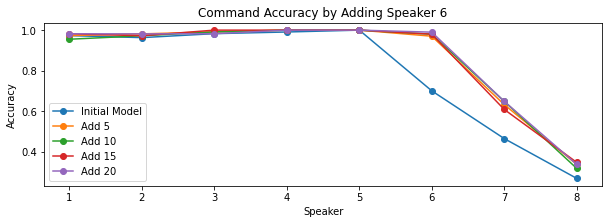

In [199]:
data = Perfomance.loc[(Perfomance['Model']=="original")|(Perfomance['Model']=="add_p6")][['Command_Acc_p1', 'Command_Acc_p2', 'Command_Acc_p3','Command_Acc_p4', 'Command_Acc_p5', 
                   'Command_Acc_p6', 'Command_Acc_p7', 'Command_Acc_p8']]
data.transpose().plot(marker = 'o',figsize = ( 10 , 3 ))

plt.xticks(range(8),["1","2","3","4","5","6","7","8"],rotation = 'horizontal')
plt.ylabel("Accuracy")
plt.xlabel("Speaker")
plt.title("Command Accuracy by Adding Speaker 6")
plt.legend(['Initial Model','Add 5','Add 10','Add 15','Add 20'])
plt.show()

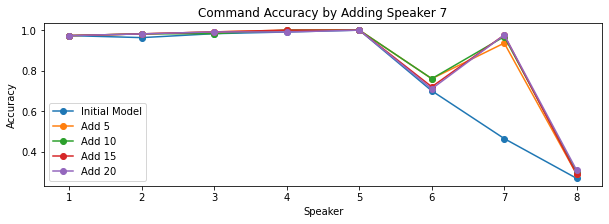

In [200]:
data = Perfomance.loc[(Perfomance['Model']=="original")|(Perfomance['Model']=="add_p7")][['Command_Acc_p1', 'Command_Acc_p2', 'Command_Acc_p3','Command_Acc_p4', 'Command_Acc_p5', 
                   'Command_Acc_p6', 'Command_Acc_p7', 'Command_Acc_p8']]
data.transpose().plot(marker = 'o',figsize = ( 10 , 3 ))

plt.xticks(range(8),["1","2","3","4","5","6","7","8"],rotation = 'horizontal')
plt.ylabel("Accuracy")
plt.xlabel("Speaker")
plt.title("Command Accuracy by Adding Speaker 7")
plt.legend(['Initial Model','Add 5','Add 10','Add 15','Add 20'])
plt.show()

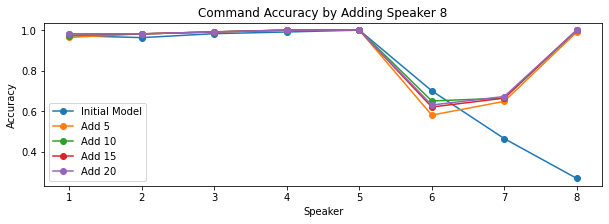

In [201]:
data = Perfomance.loc[(Perfomance['Model']=="original")|(Perfomance['Model']=="add_p8")][['Command_Acc_p1', 'Command_Acc_p2', 'Command_Acc_p3','Command_Acc_p4', 'Command_Acc_p5', 
                   'Command_Acc_p6', 'Command_Acc_p7', 'Command_Acc_p8']]
data.transpose().plot(marker = 'o',figsize = ( 10 , 3 ))

plt.xticks(range(8),["1","2","3","4","5","6","7","8"],rotation = 'horizontal')
plt.ylabel("Accuracy")
plt.xlabel("Speaker")
plt.title("Command Accuracy by Adding Speaker 8")
plt.legend(['Initial Model','Add 5','Add 10','Add 15','Add 20'])
plt.show()

In [204]:
Perfomance.to_csv("performance_refine_model_0609.csv",index=False)


In [203]:
# data = Perfomance[['Partcp_Acc_p1', 'Partcp_Acc_p2',  'Partcp_Acc_p3', 'Partcp_Acc_p4', 'Partcp_Acc_p5',
#                    'Partcp_Acc_p6', 'Partcp_Acc_p7', 'Partcp_Acc_p8']]
# data.transpose().plot(marker = 'o',figsize = ( 5 , 5 ))

# plt.xticks(range(8),["P1","P2","P3","P4","P5","P6","P7","P8"],rotation = 'horizontal')
# plt.ylabel("Accuracy")
# plt.xlabel("Subject")
# plt.title("Add P6 Subject Accuracy")
# plt.show()